<div align="right">
  <font size="1">Albert Montenegro - Introducción a Redes Neuronales Artificiales - Universidad Central</font>

  <font size="1">Integrantes: Laurence Alfredo Santamaria Arce y Maria Jose Sierra Barreto</font>
</div>

# Tensorflow
Guia de [instalación](https://medium.com/@cran2367/install-and-setup-tensorflow-2-0-2c4914b9a265) de tensorflow2.

Guia de [instalación](https://blog.quantinsti.com/install-tensorflow-gpu/) de tensorflow2-gpu.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [ ]:

import sys #Manipulacion del sistema
import numpy as np #Matrices
import matplotlib.pyplot as plt #Visualizacion
from tensorflow.keras.datasets import mnist #Traer un conjunto de datos imagenes 28*28=784
from tensorflow.keras import models #Clase
from tensorflow.keras import layers #Clase
from tensorflow.keras.utils import to_categorical #Funcion
from collections import Counter
import pandas as pd
%matplotlib inline
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

# Primera RNA
## Cargamos y exploramos los datos de MNIST

In [ ]:
(train_images , train_labels_sin_codificar), (test_images, test_labels) = mnist.load_data() #(60.000 blocaso de queso,respuestas),(10000test,respuestas)

11490434/11490434 [==============================] - 1s 0us/step


### Aleatorizamos todo, ya que no sabemos en que orden podria venir las imagenes o por intentar quitar cualquier tipo de sesgo

In [ ]:
#Una semilla para que la aleatorizacion sea repicable
np.random.seed(42)

#Concatenamos cada imagen con su etiqueta
todo_entrenamiento = list(zip(train_images, train_labels_sin_codificar))


# Aleatorizar el conjunto de datos
np.random.shuffle(todo_entrenamiento)


# Separar las imágenes y etiquetas aleatorizadas
shuffled_images, shuffled_labels = zip(*todo_entrenamiento)
train_images = np.array(shuffled_images)
train_labels = np.array(shuffled_labels)

In [ ]:
val_images=train_images[:10000]
val_labels=train_labels[:10000]
train_images=train_images[10000:]
train_labels=train_labels[10000:]

#Distribucion de los digitos

In [ ]:
mi_array = train_labels
conteo = Counter(mi_array)
for numero, cantidad in conteo.items():
    print(f"Número: {numero}, Cantidad: {cantidad}, Conjunto de entrenamiento")

Número: 8, Cantidad: 4872, Conjunto de entrenamiento
Número: 5, Cantidad: 4502, Conjunto de entrenamiento
Número: 1, Cantidad: 5649, Conjunto de entrenamiento
Número: 9, Cantidad: 4939, Conjunto de entrenamiento
Número: 4, Cantidad: 4862, Conjunto de entrenamiento
Número: 3, Cantidad: 5131, Conjunto de entrenamiento
Número: 7, Cantidad: 5205, Conjunto de entrenamiento
Número: 2, Cantidad: 4964, Conjunto de entrenamiento
Número: 0, Cantidad: 4939, Conjunto de entrenamiento
Número: 6, Cantidad: 4937, Conjunto de entrenamiento


In [ ]:
mi_array = val_labels
conteo = Counter(mi_array)
for numero, cantidad in conteo.items():
    print(f"Número: {numero}, Cantidad: {cantidad}, Conjunto de validacion")

Número: 7, Cantidad: 1060, Conjunto de validacion
Número: 3, Cantidad: 1000, Conjunto de validacion
Número: 8, Cantidad: 979, Conjunto de validacion
Número: 9, Cantidad: 1010, Conjunto de validacion
Número: 5, Cantidad: 919, Conjunto de validacion
Número: 4, Cantidad: 980, Conjunto de validacion
Número: 2, Cantidad: 994, Conjunto de validacion
Número: 6, Cantidad: 981, Conjunto de validacion
Número: 1, Cantidad: 1093, Conjunto de validacion
Número: 0, Cantidad: 984, Conjunto de validacion


In [ ]:
mi_array = test_labels
conteo = Counter(mi_array)
for numero, cantidad in conteo.items():
    print(f"Número: {numero}, Cantidad: {cantidad}, Conjunto de Prueba")

Número: 7, Cantidad: 1028, Conjunto de Prueba
Número: 2, Cantidad: 1032, Conjunto de Prueba
Número: 1, Cantidad: 1135, Conjunto de Prueba
Número: 0, Cantidad: 980, Conjunto de Prueba
Número: 4, Cantidad: 982, Conjunto de Prueba
Número: 9, Cantidad: 1009, Conjunto de Prueba
Número: 5, Cantidad: 892, Conjunto de Prueba
Número: 6, Cantidad: 958, Conjunto de Prueba
Número: 3, Cantidad: 1010, Conjunto de Prueba
Número: 8, Cantidad: 974, Conjunto de Prueba


In [ ]:
# algo de información sobre los datos
print('Datos de entrenamiento: entradas')
print(type(train_images))
print(train_images.shape)
print('\nDatos de entrenamiento: etiquetas')
print(type(train_labels))
print(train_labels.shape)

Datos de entrenamiento: entradas
<class 'numpy.ndarray'>
(50000, 28, 28)

Datos de entrenamiento: etiquetas
<class 'numpy.ndarray'>
(50000,)


In [ ]:
print('Datos de validacion: entradas')
print(type(val_images))
print(val_images.shape)
print('\nDatos de validacion: etiquetas')
print(type(val_labels))
print(val_labels.shape)

Datos de validacion: entradas
<class 'numpy.ndarray'>
(10000, 28, 28)

Datos de validacion: etiquetas
<class 'numpy.ndarray'>
(10000,)


In [ ]:
print('Datos de prueba: entradas')
print(type(test_images))
print(test_images.shape)
print('\nDatos de prueba: etiquetas')
print(type(test_labels))
print(test_labels.shape)

Datos de prueba: entradas
<class 'numpy.ndarray'>
(10000, 28, 28)

Datos de prueba: etiquetas
<class 'numpy.ndarray'>
(10000,)


## Pre procesamiento

In [ ]:
print('\nTamano original de las entradas de entrenamiento:\t',train_images.shape)
train_images = train_images.reshape((50000, 28*28))
print('\nTamano vectorizado de las entradas de entrenamiento:\t',train_images.shape)

print('\nAlgunos valores de pixeles de una imagen:\t',train_images[0,405:410])
train_images = train_images.astype('float32') / 255
print('\nLos mismos valores de pixeles de una imagen escalados a [0,1]:\t',train_images[0,405:410])

val_images=val_images.reshape((10000, 28*28))
val_images=val_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255


Tamano original de las entradas de entrenamiento:	 (50000, 28, 28)

Tamano vectorizado de las entradas de entrenamiento:	 (50000, 784)

Algunos valores de pixeles de una imagen:	 [226 223 171 202  85]

Los mismos valores de pixeles de una imagen escalados a [0,1]:	 [0.8862745  0.8745098  0.67058825 0.7921569  0.33333334]


In [ ]:
# Codificacion One-hot
# M X 10 array con un unico 1
print('\nTamano de las etiquetas:\t',train_labels.shape)
print('\nUna etiqueta previa codificacion:\t',train_labels[0])
train_labels = to_categorical(train_labels) #Categortico
test_labels = to_categorical(test_labels)
val_labels=to_categorical(val_labels)
print('\nUna etiqueta despues de codificacion:\t',train_labels[0])
print('\nTamano de las etiquetas con codificacion one-hot:\t',train_labels.shape)


Tamano de las etiquetas:	 (50000,)

Una etiqueta previa codificacion:	 8

Una etiqueta despues de codificacion:	 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

Tamano de las etiquetas con codificacion one-hot:	 (50000, 10)


# Funciones

In [ ]:
#Estructura de la red predeterminada.

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### Funciones para crear modelos y analizar su desempeño

In [ ]:
#Para modificar número de lotes, épocas y funciones de activación
def modelos(lotes=128,epocas=5,activacion="relu"):
  model= models.Sequential()
  model.add(layers.Dense(512, activation=activacion, input_shape=(28*28,)))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=["accuracy",tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
  H=model.fit(train_images, train_labels, epochs=epocas, batch_size=lotes)
  return model,H

In [ ]:
#Para modificar el número de capas y de neuronas
def capas(total_capas, aumenta):
  network = models.Sequential()

  if aumenta:
    network.add(layers.Dense(8, activation='relu', input_shape=(28*28,)))
    for i in range(total_capas - 1):
      network.add(layers.Dense(2**(i+4), activation='relu'))

  else:
    network.add(layers.Dense(1024, activation='relu', input_shape=(28*28,)))
    exponente = 9
    for i in range(total_capas - 1, 0, -1):
      network.add(layers.Dense(2**(exponente), activation='relu'))
      exponente -= 1

  network.add(layers.Dense(10, activation='softmax'))

  network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=["accuracy",tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

  H=network.fit(train_images, train_labels, epochs=5, batch_size=128)
  return network, H

In [ ]:
#Para extraer el desempeño de cada modelo con los datos de entrenamiento y validación
nombres_metricas = ['loss', 'accuracy', 'precision', 'recall']

def info_modelos(model, H):
  scores_entrenamiento = model.evaluate(train_images, train_labels)
  metricas_entrenamiento = {}
  scores_validacion = model.evaluate(val_images, val_labels)
  metricas_validacion = {}

  for i in range(4):
    metricas_entrenamiento[nombres_metricas[i]] = scores_entrenamiento[i]*100
  for j in range(4):
    metricas_validacion[nombres_metricas[j]] = scores_validacion[j]*100

  #Cambiar los nombres de las métricas en H.history para que graficar sea más sencillo
  H.history = dict(zip(nombres_metricas, H.history.values()))

  return (model, metricas_entrenamiento, metricas_validacion, H)

#### Funciones para las metricas por cada clase (Matriz de confusion multiclase).


In [ ]:

def accuracy(matriz):
  num = matriz[0][0] + matriz[1][1]
  den = matriz[0][0] + matriz[0][1] + matriz[1][0] + matriz[1][1]
  return num / den

def precision(matriz):
  num = matriz[1][1]
  den = matriz[0][1] + matriz[1][1]
  return num / den

def sensibilidad(matriz):
  num = matriz[1][1]
  den = matriz[1][0] + matriz[1][1]
  return num / den

#### Funciones para graficar

In [ ]:
def metricas_por_clase(modelos, escenario):
  cantidad_modelos=len(modelos.keys())
  accuracy_por_clase = {i: [] for i in range(cantidad_modelos)}
  precision_por_clase ={i: [] for i in range(cantidad_modelos)}
  recall_por_clase ={i: [] for i in range(cantidad_modelos)}
  contador=0
  nombres_modelos=[]
  for nombre, (model, metricas_entrenamiento, metricas_validacion, H) in modelos.items():
      nombres_modelos+= [f"{escenario}={nombre}"]
      lista_acc=[]
      lista_precision=[]
      lista_recall=[]
      y_prediction_pruebas = model.predict(test_images)
      predicciones = np.round(y_prediction_pruebas)
      Matriz_multi = multilabel_confusion_matrix(test_labels, predicciones)
      for e in range(10):
        lista_acc+=[accuracy(Matriz_multi[e])]
        lista_precision+=[precision(Matriz_multi[e])]
        lista_recall+=[sensibilidad(Matriz_multi[e])]
      accuracy_por_clase[contador]=lista_acc
      precision_por_clase[contador]=lista_precision
      recall_por_clase[contador]= lista_recall
      contador+=1

  para_graficar=[accuracy_por_clase,precision_por_clase,recall_por_clase]
  metricas=["Accuracy", "Precision", "Recall"]
    # Nombres de las clases (dígitos)
  clases = [str(i) for i in range(10)]
  for i in range(len(metricas)):
      # Coordenadas en el eje x para cada grupo de barras (cinco modelos)
    x_pos_modelos = np.arange(len(clases))
    bar_width = 0.15

      # Colores diferentes para cada modelo
    colores_modelos = [plt.cm.viridis(i/cantidad_modelos) for i in range(cantidad_modelos)]

      # Crear la gráfica de barras
    fig, ax = plt.subplots()

      # Ajustar el rango del eje y para empezar desde 0.75
    plt.ylim(0.80, 1.0)

      # Etiquetas y título
    plt.xlabel('Dígitos')
    plt.ylabel(metricas[i])
    plt.title(f'Comparación de Modelos {metricas[i]}')

    # Crear barras para cada modelo
    segundo_contador=0
    for l,nombre_modelo in enumerate(nombres_modelos):
        bars_modelo = plt.bar(x_pos_modelos + l * bar_width, para_graficar[i][segundo_contador], color=colores_modelos[segundo_contador], width=bar_width, align='center', label=nombre_modelo)
        segundo_contador+=1

    # Colocar los nombres de los modelos en el eje x
    plt.xticks(x_pos_modelos + (bar_width * (len(nombres_modelos) - 1) / 2), clases)

    # Crear cuadro de leyendas para los modelos
    plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0.0))

    # Mostrar la gráfica
    plt.show()

In [ ]:
def plot_trends(modelos, metrica, ylabel, title, escenario):
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    for nombre, (model, metricas_entrenamiento, metricas_validacion, H) in modelos.items():
        plt.plot(range(1, len(H.history[metrica]) + 1), H.history[metrica], label=f'Training - {escenario}: {nombre}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.xticks(range(1,6))
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [ ]:
def graficar_epocas (modelos, escenario, epocas):
  plt.style.use('ggplot')
  metricas=["accuracy","loss","precision","recall"]
  for nombre, (model, metricas_entrenamiento, metricas_validacion, H) in modelos.items():


    epochs = range(1, len(H.history[metricas[0]]) + 1)

    # Graficar Accuracy
    plt.figure(figsize=(20, 12))
    plt.subplot(1, 4, 1)
    plt.plot(epochs, H.history[metricas[0]], 'b-', label='Training accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Graficar Recall
    plt.subplot(1, 4, 2)
    plt.plot(epochs, H.history[metricas[3]], 'r-', label='Training recall')
    plt.title('Training Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    # Graficar Loss
    plt.subplot(1, 4, 3)
    plt.plot(epochs, H.history[metricas[1]], 'g-', label='Training loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Graficar Precision
    plt.subplot(1, 4, 4)
    plt.plot(epochs, H.history[metricas[2]], 'c-', label='Training precision')
    plt.title('Training Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()
    plt.suptitle(f'Tendencia de Métricas de Entrenamiento {escenario}: {nombre}')
    plt.tight_layout()
    plt.show()

In [ ]:
def grafica_probabilidades(modelos, escenario):
  for modelo in modelos:
    predicts = modelos[modelo][0].predict(test_images)
    predicts.tolist()
    diccionario_digito = {}
    diccionario_no_digito = {}
    for i in range(10):
      diccionario_digito[i]=[]
      diccionario_no_digito[i]=[]
      for prediccion in predicts:
        if prediccion[i] >= 0.75:
          diccionario_digito[i].append(prediccion[i])
        else:
          diccionario_no_digito[i].append(prediccion[i])
    plt.boxplot([diccionario_digito[i] for i in range(10)])
    plt.title(f'Probabilidad con la que predice un dígito. \n {escenario}: {modelo}')
    plt.xlabel("Dígito")
    plt.ylabel("Probabilidad")
    plt.show()
    plt.boxplot([diccionario_no_digito[i] for i in range(10)])
    plt.title(f'Probabilidad con la que predice los demás dígitos. \n {escenario}: {modelo}')
    plt.xlabel("Dígito")
    plt.ylabel("Probabilidad")
    plt.show()

In [ ]:
#Comparación de métricas
def grafica_ajuste(modelos, hiperparametro):
  metricas = ['accuracy', 'precision', 'recall']
  for escenario in modelos.keys():
    datos_entrenamiento = list(modelos[escenario][1].values())
    datos_validacion = list(modelos[escenario][2].values())

    #Quitar la pérdida para graficar solo las métricas
    datos_entrenamiento.pop(0)
    datos_validacion.pop(0)

    x = np.arange(len(metricas)) * 2

    bar_width = 0.8

    plt.bar(x, datos_entrenamiento, width=bar_width, label='Métricas de entrenamiento', color = (94/255, 222/255, 243/255))
    plt.bar(x + bar_width, datos_validacion, width=bar_width, label='Métricas de validación', color = (155/255, 143/255, 209/255))

    plt.xlabel('Métricas')
    plt.ylabel('Porcentaje')
    plt.title(f'Comparación de métricas: Escenario {hiperparametro}: {escenario}')
    plt.xticks(x + bar_width / 2, metricas)
    plt.yticks(range(0, 121, 20))
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
def grafica_ajuste_ganadores(modelos):
  metricas = ['accuracy', 'precision', 'recall']
  perdida=["loss"]
  for metrica in metricas:
    lista=[]
    nombre_modelos=[]
    for clave in modelos.keys():
      nombre_modelos.append(clave)
      lista.append(modelos[clave][2][metrica])
    colores_modelos = [plt.cm.viridis(i/len(nombre_modelos)) for i in range(len(nombre_modelos))]
    plt.style.use('ggplot')
    plt.bar(nombre_modelos, lista,color=colores_modelos)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(90,100)
    plt.ylabel(f'{metrica}')
    plt.title(f'Comparación de {metrica} entre Modelos')


    plt.show()
  for x in perdida:
    listax=[]
    nombre_modelos=[]
    for clave in modelos.keys():
      nombre_modelos.append(clave)
      listax.append(modelos[clave][2][x])
    colores_modelos = [plt.cm.viridis(i/len(nombre_modelos)) for i in range(len(nombre_modelos))]
    plt.style.use('ggplot')
    plt.bar(nombre_modelos, listax,color=colores_modelos)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(f'{x}')
    plt.title(f'Comparación de {x} entre Modelos')


    plt.show()

#### Funcion para hacer predicciones de numeros.


Tamano de nuestro conjunto de prueba:	 (10000, 784)

Tamano de la "imagen":	 (784,)

Tamano de la imagen:	 (28, 28)

Etiqueta one-hot:	 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

Etiqueta normalita:	 4


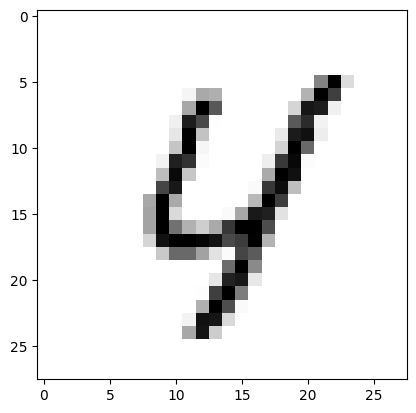

In [ ]:
# alguna imagen
img_no=555  #1044 #247 $1114 $2074
print('\nTamano de nuestro conjunto de prueba:\t',test_images.shape)
img = test_images[img_no,:]

#que tamano tiene
print('\nTamano de la "imagen":\t',img.shape)

# reformamos la imagen
img = img.reshape((28,28))
img = img.astype('float32') * 255
print('\nTamano de la imagen:\t',img.shape)
plt.imshow(img, cmap=plt.cm.gray_r)

# reformamos la etiqueta
label = test_labels[img_no]
print('\nEtiqueta one-hot:\t',label)
print('\nEtiqueta normalita:\t',np.argmax(label))
def Preddiciones_modelos(modelos,escenario):
  plt.style.use('ggplot')
  for i in modelos.keys():
    md=modelos[i][0]
    prediction = md.predict(test_images[img_no:img_no+1])

    print('\nPredicción de probabilidad:', prediction)

    #prediction_clase = network.predict_classes(test_images[img_no:img_no+1])
    prediction_clase = np.argmax(md.predict(test_images[img_no:img_no+1]), axis=-1)
    print('\nPredicción de clase:', prediction_clase)

    prediction_model = md(test_images[img_no:img_no+1])
    print('\nPredicción desde el modelo:', prediction_model)

    fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,4))
    fig.suptitle(f'Comparando las distribuciones con la red de {escenario}: {i} ')


    print("Predicción:\n",np.around(prediction[0,:], decimals=3))

    ax1.bar(range(10), prediction[0,:], edgecolor='black',color=['maroon'],align='center')
    ax1.title.set_text('Prediccion')
    ax1.axis(ymin=0,ymax=1)

    plt.sca(ax1)
    plt.xticks([0, 1, 2,3,4,5,6,7,8,9], ["0", "1", "2", "3", "4", "5","6","7", "8","9"])



    print("Etiqueta original:\n",label)
    ax2.bar(range(10), label, edgecolor='black',color=['slategray'])
    ax2.set_xticklabels(range(10))
    ax2.title.set_text('Etiqueta')

    plt.sca(ax2)
    plt.xticks([0, 1, 2,3,4,5,6,7,8,9], ["0", "1", "2", "3", "4", "5","6","7", "8","9"])
    plt.show()

# Análisis de desempeño

# Escenario Tamaño de lote: 16, 32, 64 y 128

In [ ]:
#Se crean las 4 estructuras con su desempeño en el conjunto de validacion y se guardan en un diccionario
batch_sizes = [16, 32, 64, 128]
modelos_lotes = {}

for batch_size in batch_sizes:
  model,H = modelos(lotes=batch_size)

  modelos_lotes[batch_size] = info_modelos(model, H)

Epoch 1/5
3125/3125 [==============================] - 38s 12ms/step - loss: 0.2085 - accuracy: 0.9381 - precision: 0.9518 - recall: 0.9266
Epoch 2/5
3125/3125 [==============================] - 21s 7ms/step - loss: 0.0950 - accuracy: 0.9737 - precision: 0.9763 - recall: 0.9720
Epoch 3/5
3125/3125 [==============================] - 20s 6ms/step - loss: 0.0701 - accuracy: 0.9804 - precision: 0.9820 - recall: 0.9796
Epoch 4/5
3125/3125 [==============================] - 22s 7ms/step - loss: 0.0533 - accuracy: 0.9853 - precision: 0.9861 - recall: 0.9848
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0990 - accuracy: 0.9787 - precision: 0.9793 - recall: 0.9779
Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2186 - accuracy: 0.9357 - precision_1: 0.9532 - recall_1: 0.9202
Epoch 2/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0939 - accuracy: 0.9726 - precision_1: 0.9759 - recall_1: 0.9696
Epoch 3/5
1563/1563 [

###Visualizacion de las metricas Escenario Tamaño de lote.


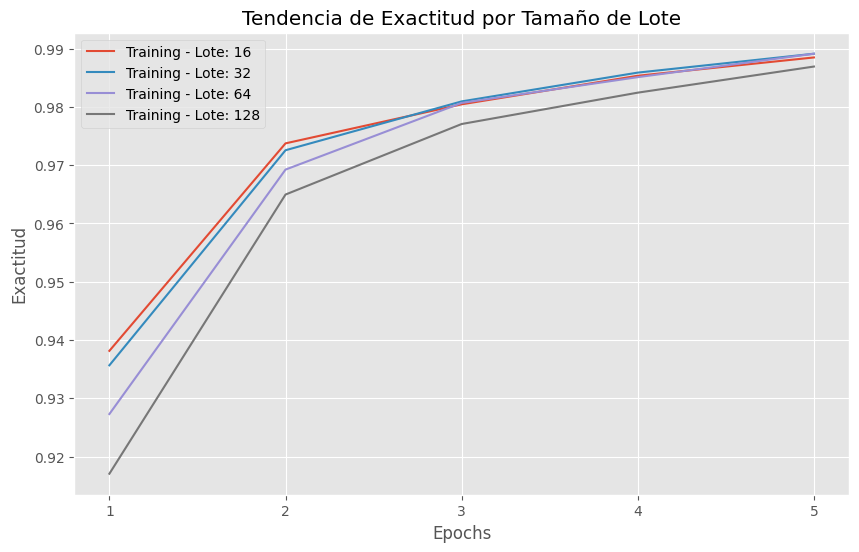

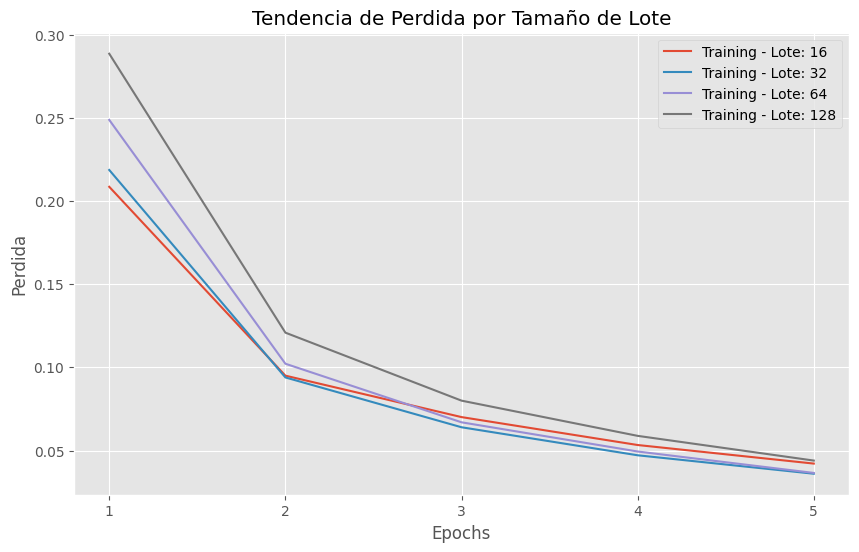

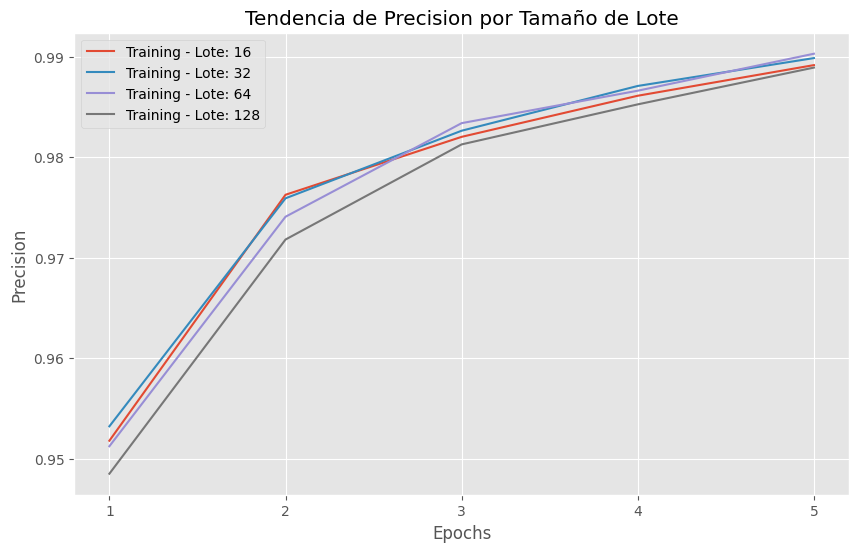

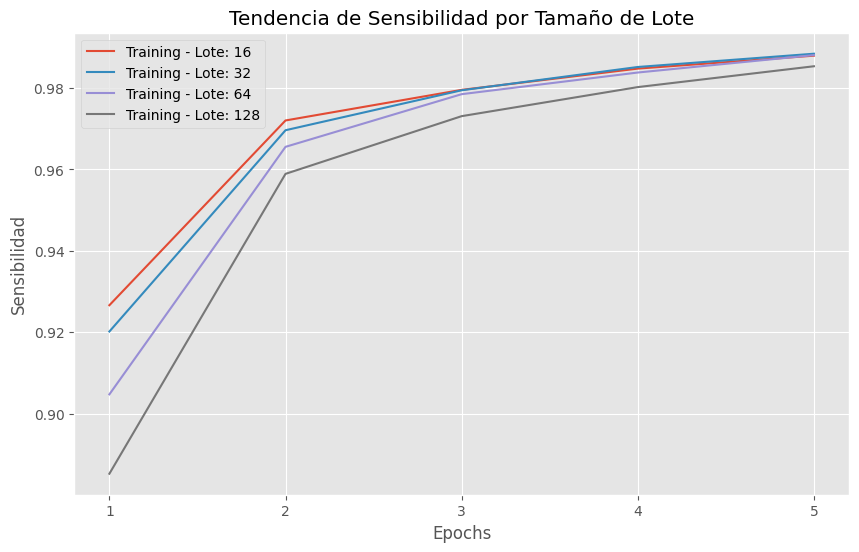

In [ ]:
plot_trends(modelos_lotes, 'accuracy', 'Exactitud', 'Tendencia de Exactitud por Tamaño de Lote',"Lote")
plot_trends(modelos_lotes, 'loss', 'Perdida', 'Tendencia de Perdida por Tamaño de Lote',"Lote")
plot_trends(modelos_lotes, 'precision', 'Precision', 'Tendencia de Precision por Tamaño de Lote',"Lote")
plot_trends(modelos_lotes, 'recall', 'Sensibilidad', 'Tendencia de Sensibilidad por Tamaño de Lote',"Lote")

###Miramos la diferencia en el desempeño entre el conjunto de entrenamiento y validación.

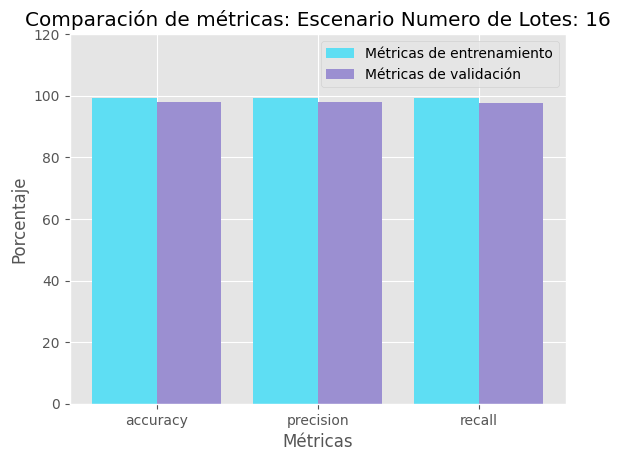

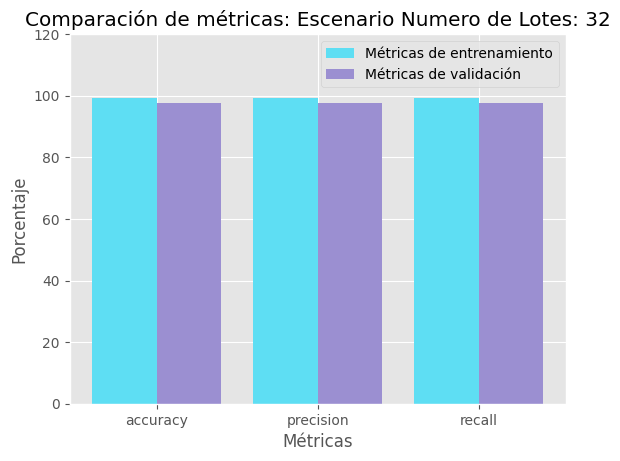

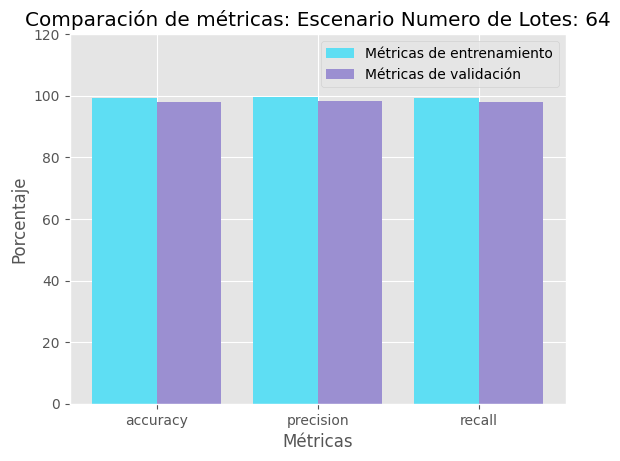

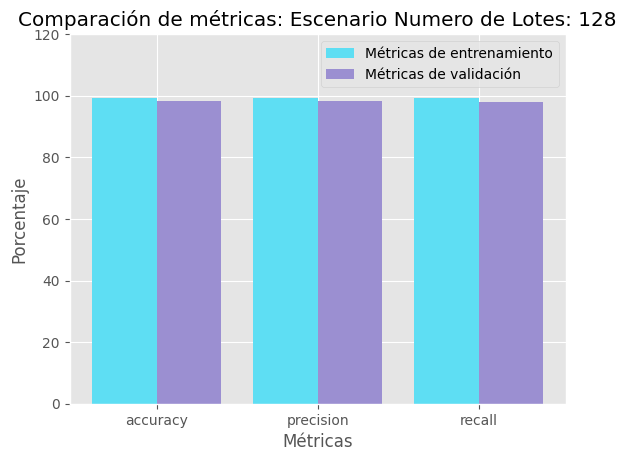

In [ ]:
grafica_ajuste(modelos_lotes, "Numero de Lotes")

###Jugamos a predecir con las diferentes redes (Escenario Lotes)

1/1 [==============================] - 0s 91ms/step

Predicción de probabilidad: [[2.5096462e-15 2.7234616e-12 3.3573117e-11 3.0261983e-13 9.9998724e-01
  1.6755479e-12 7.5055123e-10 3.9039559e-08 1.1600069e-05 1.1144741e-06]]
1/1 [==============================] - 0s 24ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[2.5096462e-15 2.7234616e-12 3.3573117e-11 3.0261983e-13 9.9998724e-01
  1.6755479e-12 7.5055123e-10 3.9039559e-08 1.1600069e-05 1.1144741e-06]], shape=(1, 10), dtype=float32)
Predicción:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


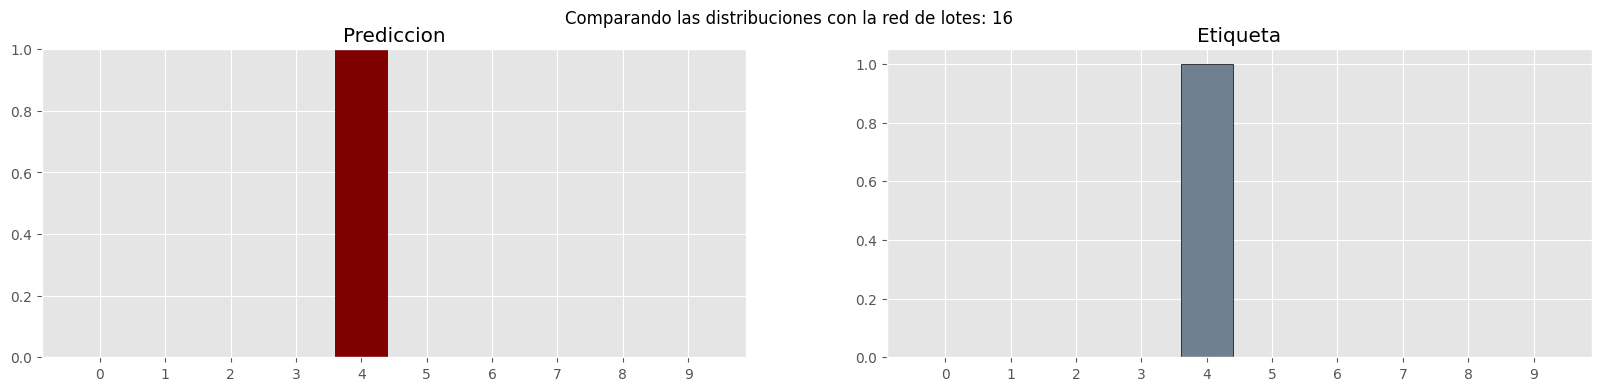

1/1 [==============================] - 0s 57ms/step

Predicción de probabilidad: [[8.05467401e-13 3.34513701e-11 9.59350288e-09 2.12019433e-08
  9.98526037e-01 1.03145215e-10 1.52766066e-08 6.59872429e-04
  4.42547571e-05 7.69810984e-04]]
1/1 [==============================] - 0s 21ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[8.05467401e-13 3.34513701e-11 9.59350288e-09 2.12019433e-08
  9.98526037e-01 1.03145215e-10 1.52766066e-08 6.59872429e-04
  4.42547571e-05 7.69810984e-04]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.999 0.    0.    0.001 0.    0.001]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


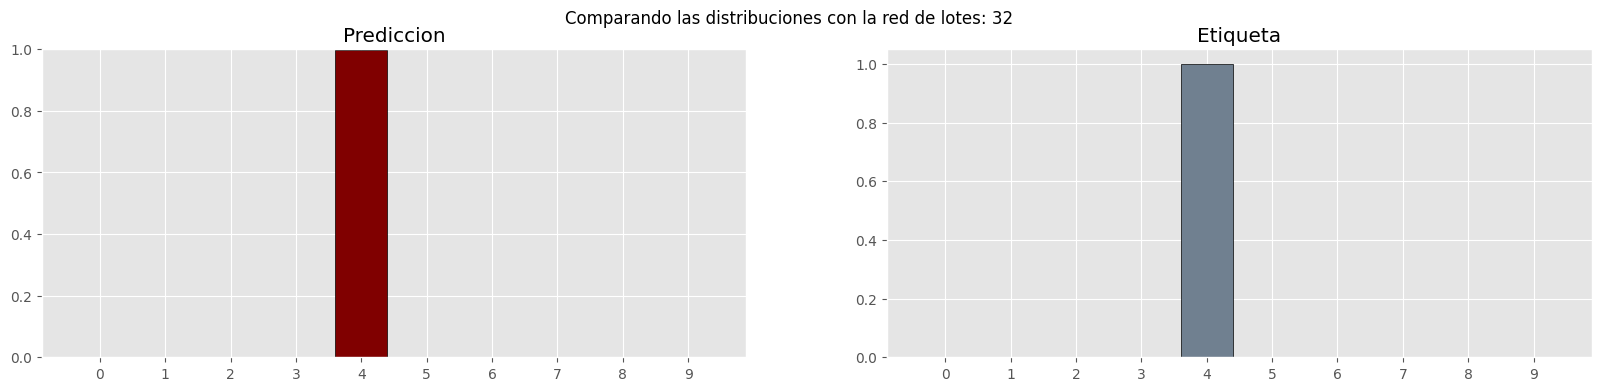

1/1 [==============================] - 0s 59ms/step

Predicción de probabilidad: [[2.0795541e-09 2.6695024e-09 3.8962088e-07 3.4737564e-08 9.9940825e-01
  6.4464786e-08 3.1349524e-07 2.1507464e-04 8.4974279e-05 2.9094770e-04]]
1/1 [==============================] - 0s 22ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[2.0795541e-09 2.6695024e-09 3.8962088e-07 3.4737564e-08 9.9940825e-01
  6.4464786e-08 3.1349524e-07 2.1507464e-04 8.4974279e-05 2.9094770e-04]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.999 0.    0.    0.    0.    0.   ]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


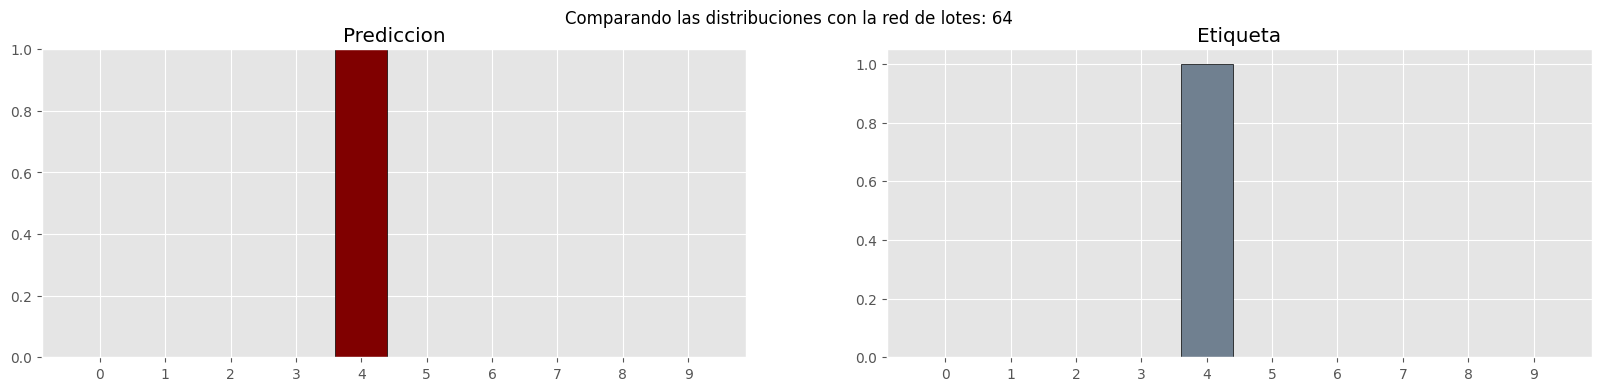

1/1 [==============================] - 0s 50ms/step

Predicción de probabilidad: [[6.8974866e-09 6.5416912e-09 7.3384972e-06 3.6018013e-05 9.9880457e-01
  7.5532213e-08 8.9921723e-06 2.3567627e-04 4.8311215e-04 4.2411819e-04]]
1/1 [==============================] - 0s 21ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[6.8974866e-09 6.5416912e-09 7.3384972e-06 3.6018013e-05 9.9880457e-01
  7.5532213e-08 8.9921723e-06 2.3567627e-04 4.8311215e-04 4.2411819e-04]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.999 0.    0.    0.    0.    0.   ]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


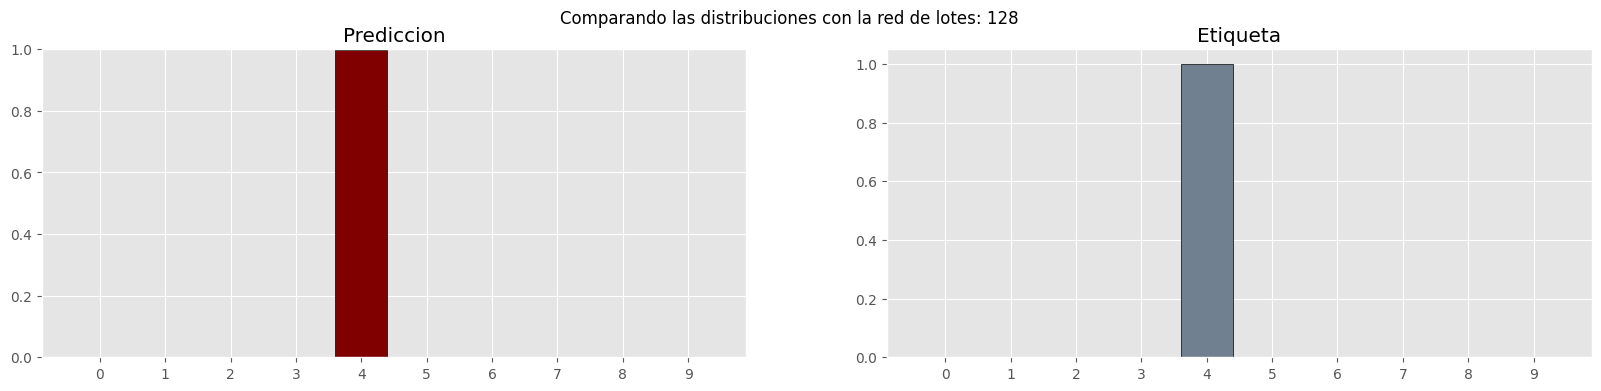

In [ ]:
Preddiciones_modelos(modelos_lotes,"lotes")

#Escenario Función de activación: “sigmoid”, “tanh” y “relu”

In [ ]:
#Se crean las 4 estructuras con su desempeño en el conjunto de validacion y se guardan en un diccionario
Funciones = ["sigmoid", "tanh","relu"]
modelos_funciones = {}

for funcion in Funciones:
  model,H = modelos(activacion=funcion)

  modelos_funciones[funcion] = info_modelos(model, H)

Epoch 1/5
391/391 [==============================] - 6s 14ms/step - loss: 0.4895 - accuracy: 0.8688 - precision_4: 0.9374 - recall_4: 0.7760
Epoch 2/5
391/391 [==============================] - 4s 10ms/step - loss: 0.2841 - accuracy: 0.9171 - precision_4: 0.9390 - recall_4: 0.8997
Epoch 3/5
391/391 [==============================] - 4s 10ms/step - loss: 0.2356 - accuracy: 0.9332 - precision_4: 0.9488 - recall_4: 0.9200
Epoch 4/5
391/391 [==============================] - 5s 14ms/step - loss: 0.1953 - accuracy: 0.9437 - precision_4: 0.9563 - recall_4: 0.9334
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.1572 - accuracy: 0.9545 - precision_4: 0.9655 - recall_4: 0.9474
Epoch 1/5
391/391 [==============================] - 5s 10ms/step - loss: 0.3586 - accuracy: 0.8958 - precision_5: 0.9295 - recall_5: 0.8656
Epoch 2/5
391/391 [==============================] - 4s 10ms/step - loss: 0.2025 - accuracy: 0.9415 - precision_5: 0.9535 - recall_5: 0.9311
Epoch 3/5
391/

###Visualizacion de las metricas Escenario Funciones.

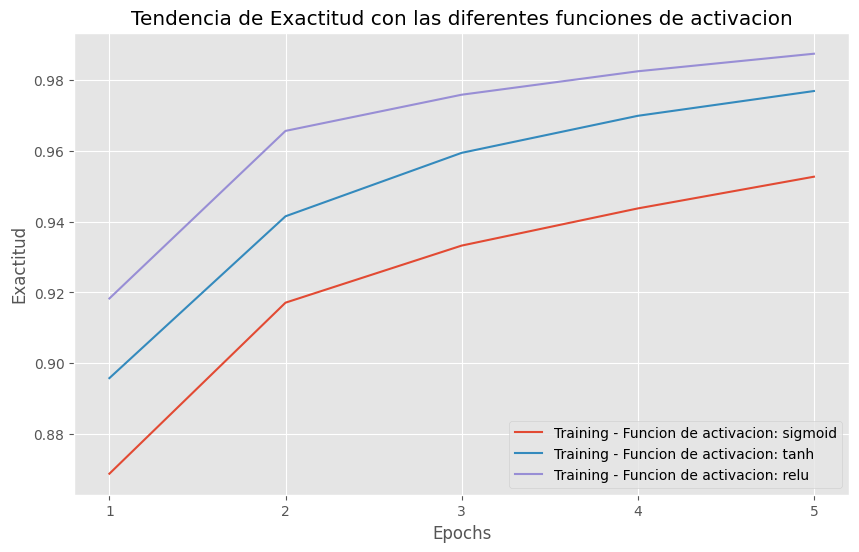

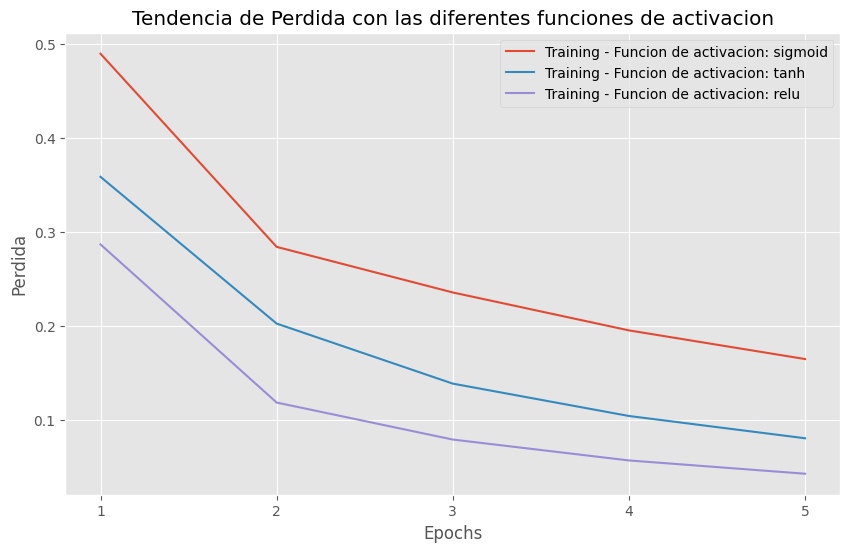

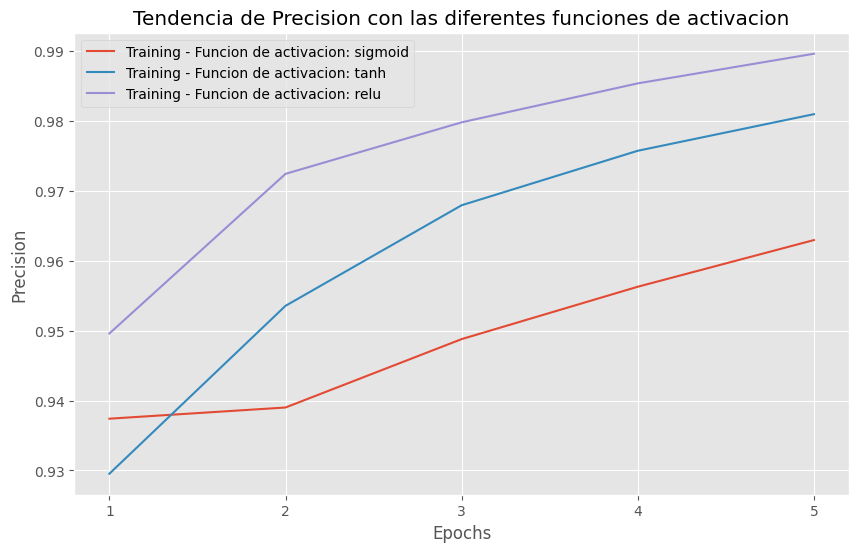

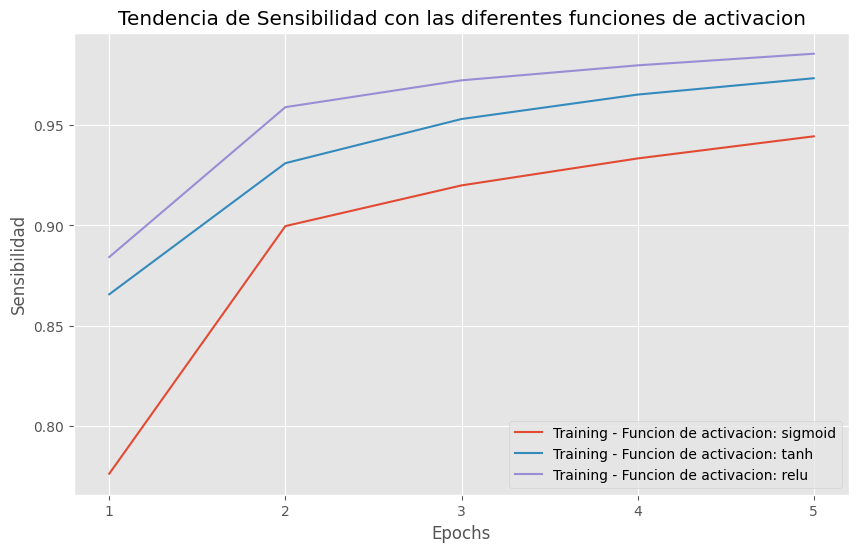

In [ ]:
plot_trends(modelos_funciones, 'accuracy', 'Exactitud', 'Tendencia de Exactitud con las diferentes funciones de activacion',"Funcion de activacion")
plot_trends(modelos_funciones, 'loss', 'Perdida', 'Tendencia de Perdida con las diferentes funciones de activacion',"Funcion de activacion")
plot_trends(modelos_funciones, 'precision', 'Precision', 'Tendencia de Precision con las diferentes funciones de activacion',"Funcion de activacion")
plot_trends(modelos_funciones, 'recall', 'Sensibilidad', 'Tendencia de Sensibilidad con las diferentes funciones de activacion',"Funcion de activacion")

###Miramos la diferencia en el desempeño entre el conjunto de entrenamiento y validación.

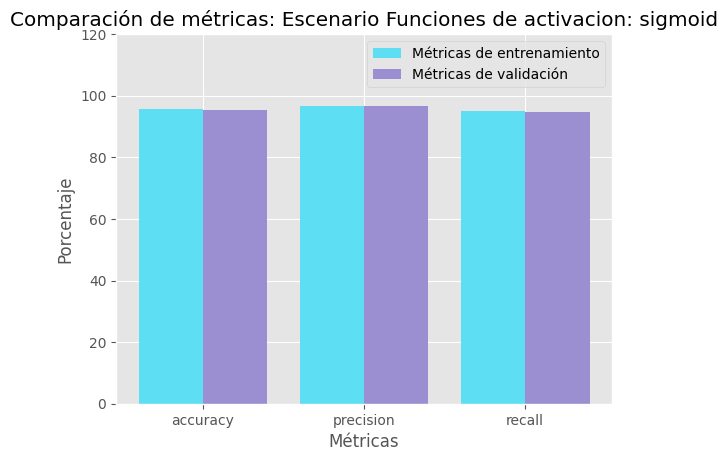

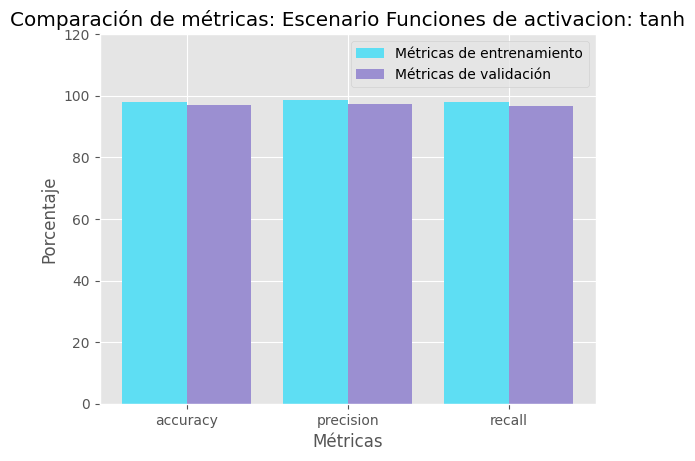

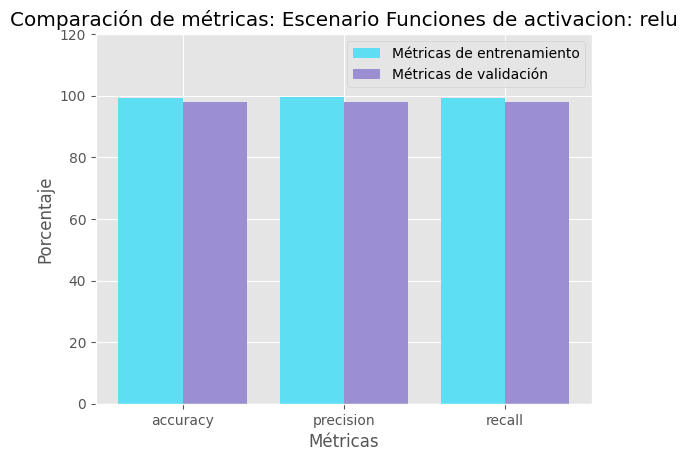

In [ ]:
grafica_ajuste(modelos_funciones, "Funciones de activacion")

###Jugamos a predecir con las diferentes redes (Escenario Funciones de activacion)

1/1 [==============================] - 0s 54ms/step

Predicción de probabilidad: [[9.4849958e-07 6.0006813e-09 8.0288126e-05 2.3865912e-06 9.9042344e-01
  3.8383496e-05 1.7169297e-04 5.1706628e-04 3.9153420e-03 4.8504723e-03]]
1/1 [==============================] - 0s 20ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[9.4849958e-07 6.0006813e-09 8.0288126e-05 2.3865912e-06 9.9042344e-01
  3.8383496e-05 1.7169297e-04 5.1706628e-04 3.9153420e-03 4.8504723e-03]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.99  0.    0.    0.001 0.004 0.005]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


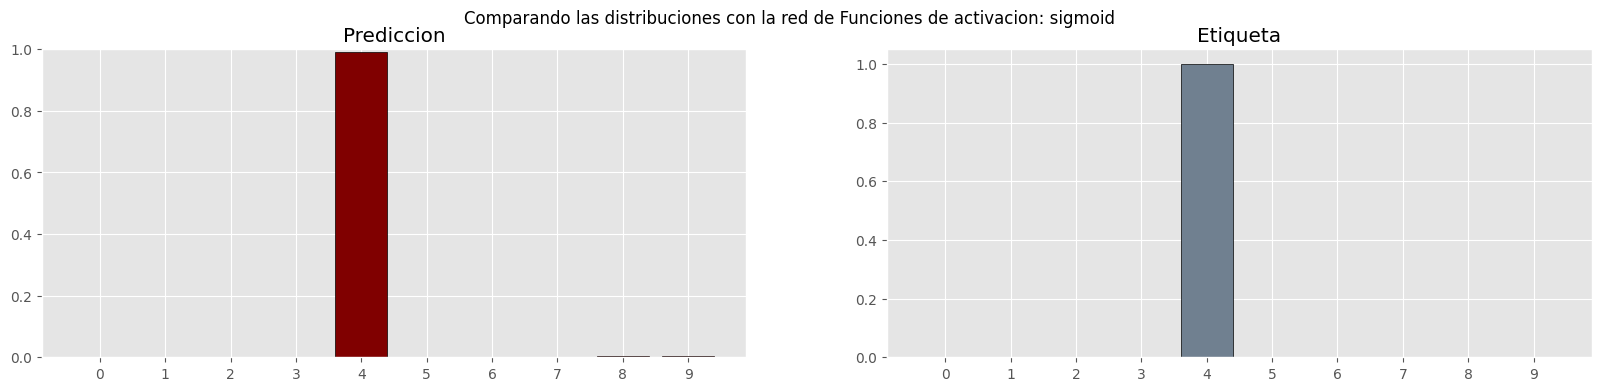

1/1 [==============================] - 0s 68ms/step

Predicción de probabilidad: [[4.74201727e-08 1.35068556e-09 2.43028644e-05 1.01130145e-05
  9.97856200e-01 3.79582866e-06 1.49441721e-05 4.82956413e-04
  6.97891519e-04 9.09801689e-04]]
1/1 [==============================] - 0s 27ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[4.74201727e-08 1.35068556e-09 2.43028644e-05 1.01130145e-05
  9.97856200e-01 3.79582866e-06 1.49441721e-05 4.82956413e-04
  6.97891519e-04 9.09801689e-04]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.998 0.    0.    0.    0.001 0.001]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


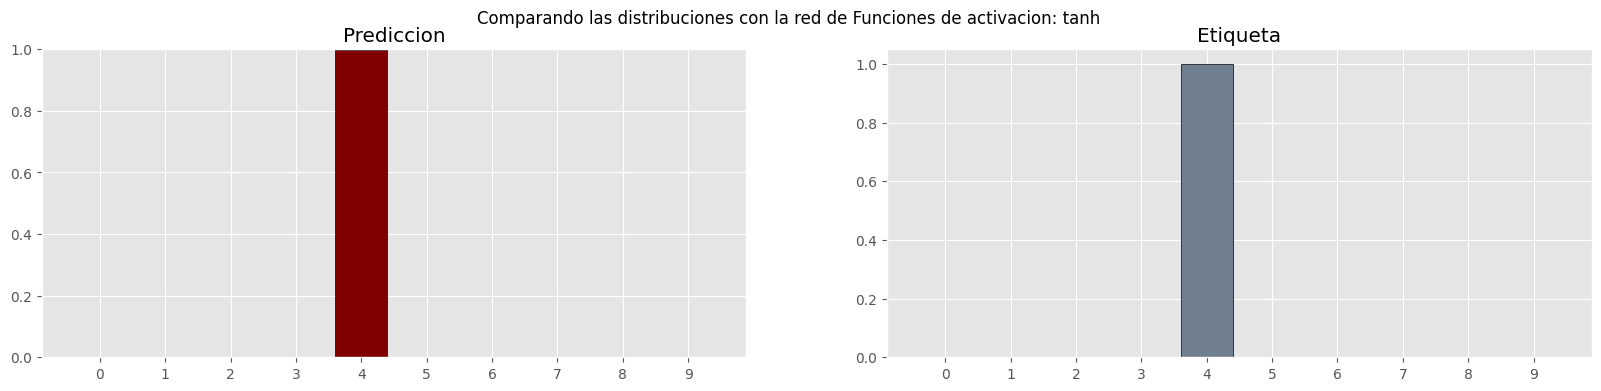

1/1 [==============================] - 0s 56ms/step

Predicción de probabilidad: [[5.7063878e-09 2.9724088e-08 1.2519783e-06 2.3340233e-06 9.9772745e-01
  1.0506220e-06 8.3685163e-06 3.1175371e-04 1.6351121e-03 3.1266062e-04]]
1/1 [==============================] - 0s 22ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[5.7063878e-09 2.9724088e-08 1.2519783e-06 2.3340233e-06 9.9772745e-01
  1.0506220e-06 8.3685163e-06 3.1175371e-04 1.6351121e-03 3.1266062e-04]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.998 0.    0.    0.    0.002 0.   ]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


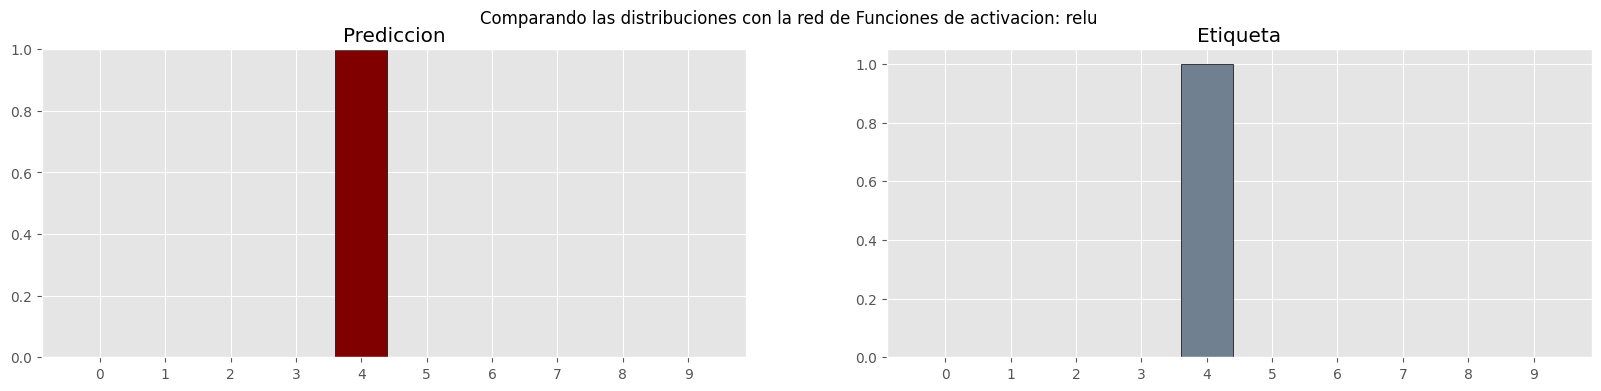

In [ ]:
Preddiciones_modelos(modelos_funciones,"Funciones de activacion")

#Escenario Número de épocas: 5, 25, 50 y 100

In [ ]:
#Se crean las 4 estructuras con su desempeño en el conjunto de validacion y se guardan en un diccionario
Epocas = [5, 25, 50 , 100]
modelos_epocas = {}

for epoca in Epocas:
  model,H = modelos(epocas=epoca)

  modelos_epocas[epoca] = info_modelos(model, H)

Epoch 1/5
391/391 [==============================] - 5s 12ms/step - loss: 0.2868 - accuracy: 0.9180 - precision_7: 0.9497 - recall_7: 0.8858
Epoch 2/5
391/391 [==============================] - 5s 12ms/step - loss: 0.1204 - accuracy: 0.9644 - precision_7: 0.9719 - recall_7: 0.9583
Epoch 3/5
391/391 [==============================] - 4s 10ms/step - loss: 0.0790 - accuracy: 0.9769 - precision_7: 0.9810 - recall_7: 0.9730
Epoch 4/5
391/391 [==============================] - 4s 10ms/step - loss: 0.0577 - accuracy: 0.9828 - precision_7: 0.9853 - recall_7: 0.9805
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0674 - accuracy: 0.9795 - precision_7: 0.9817 - recall_7: 0.9771
Epoch 1/25
391/391 [==============================] - 6s 13ms/step - loss: 0.2876 - accuracy: 0.9178 - precision_8: 0.9498 - recall_8: 0.8844
Epoch 2/25
391/391 [==============================] - 4s 10ms/step - loss: 0.1208 - accuracy: 0.9641 - precision_8: 0.9714 - recall_8: 0.9582
Epoch 3/25
3

### Visualizacion de las metricas Escenario Epocas.

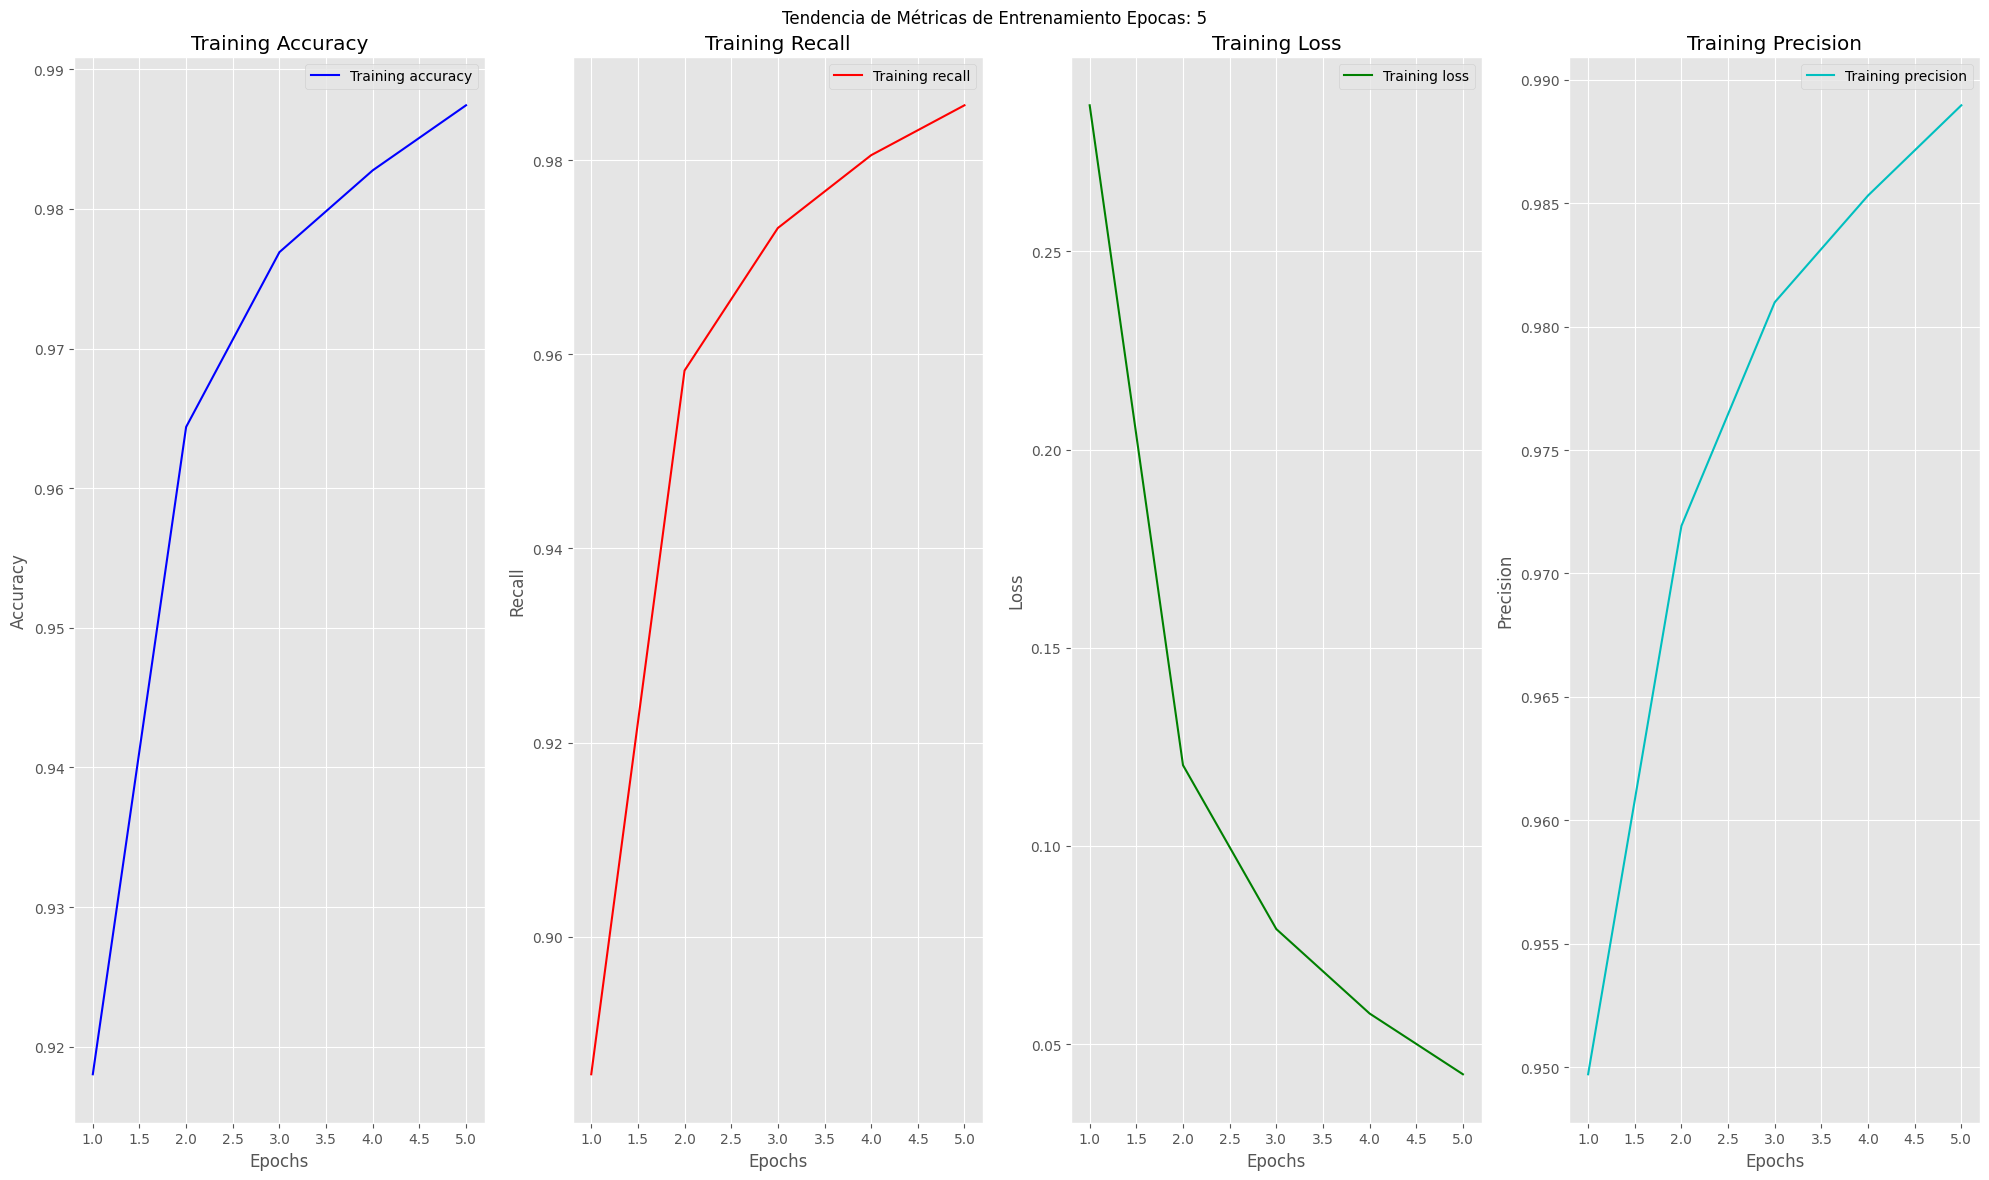

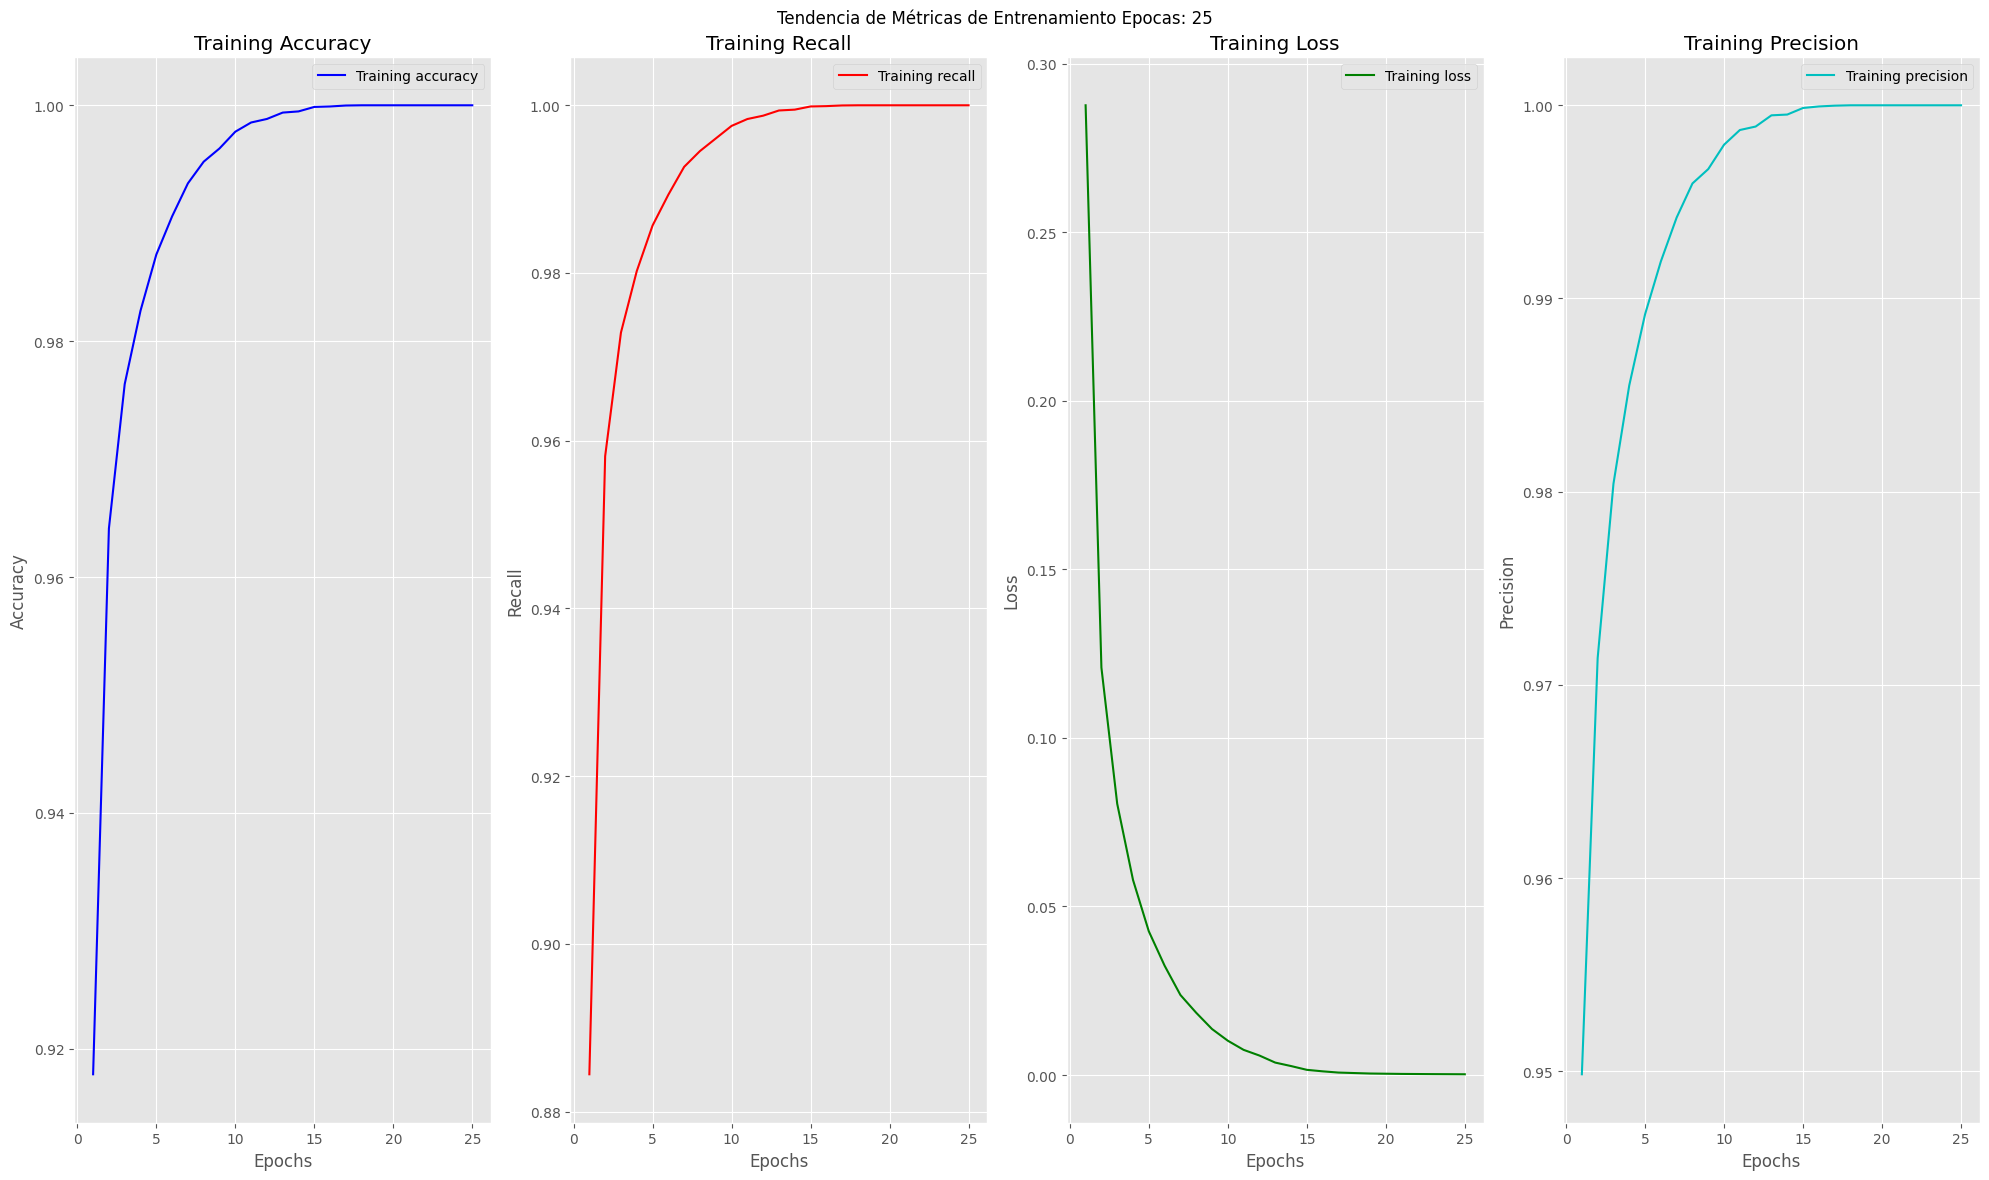

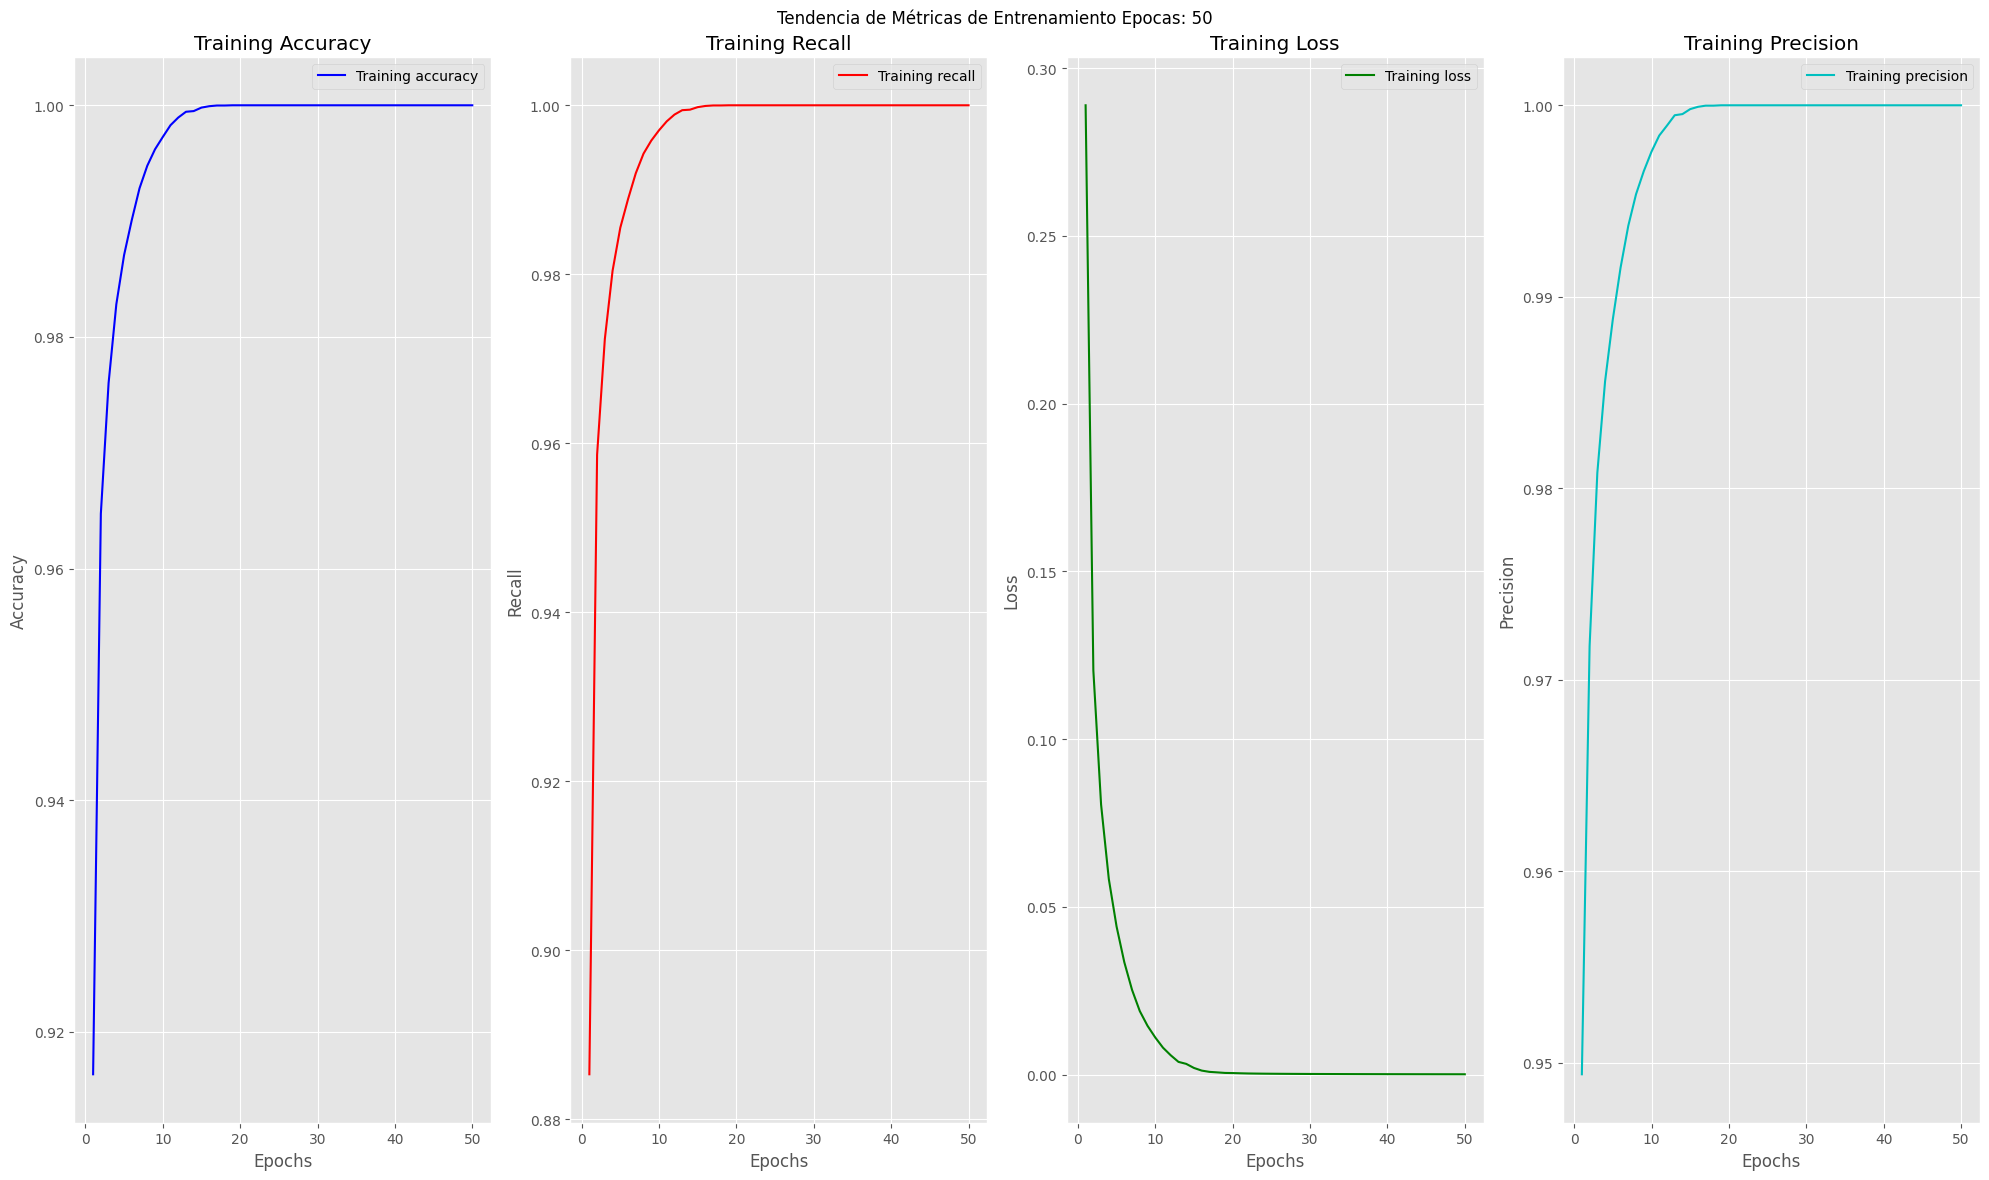

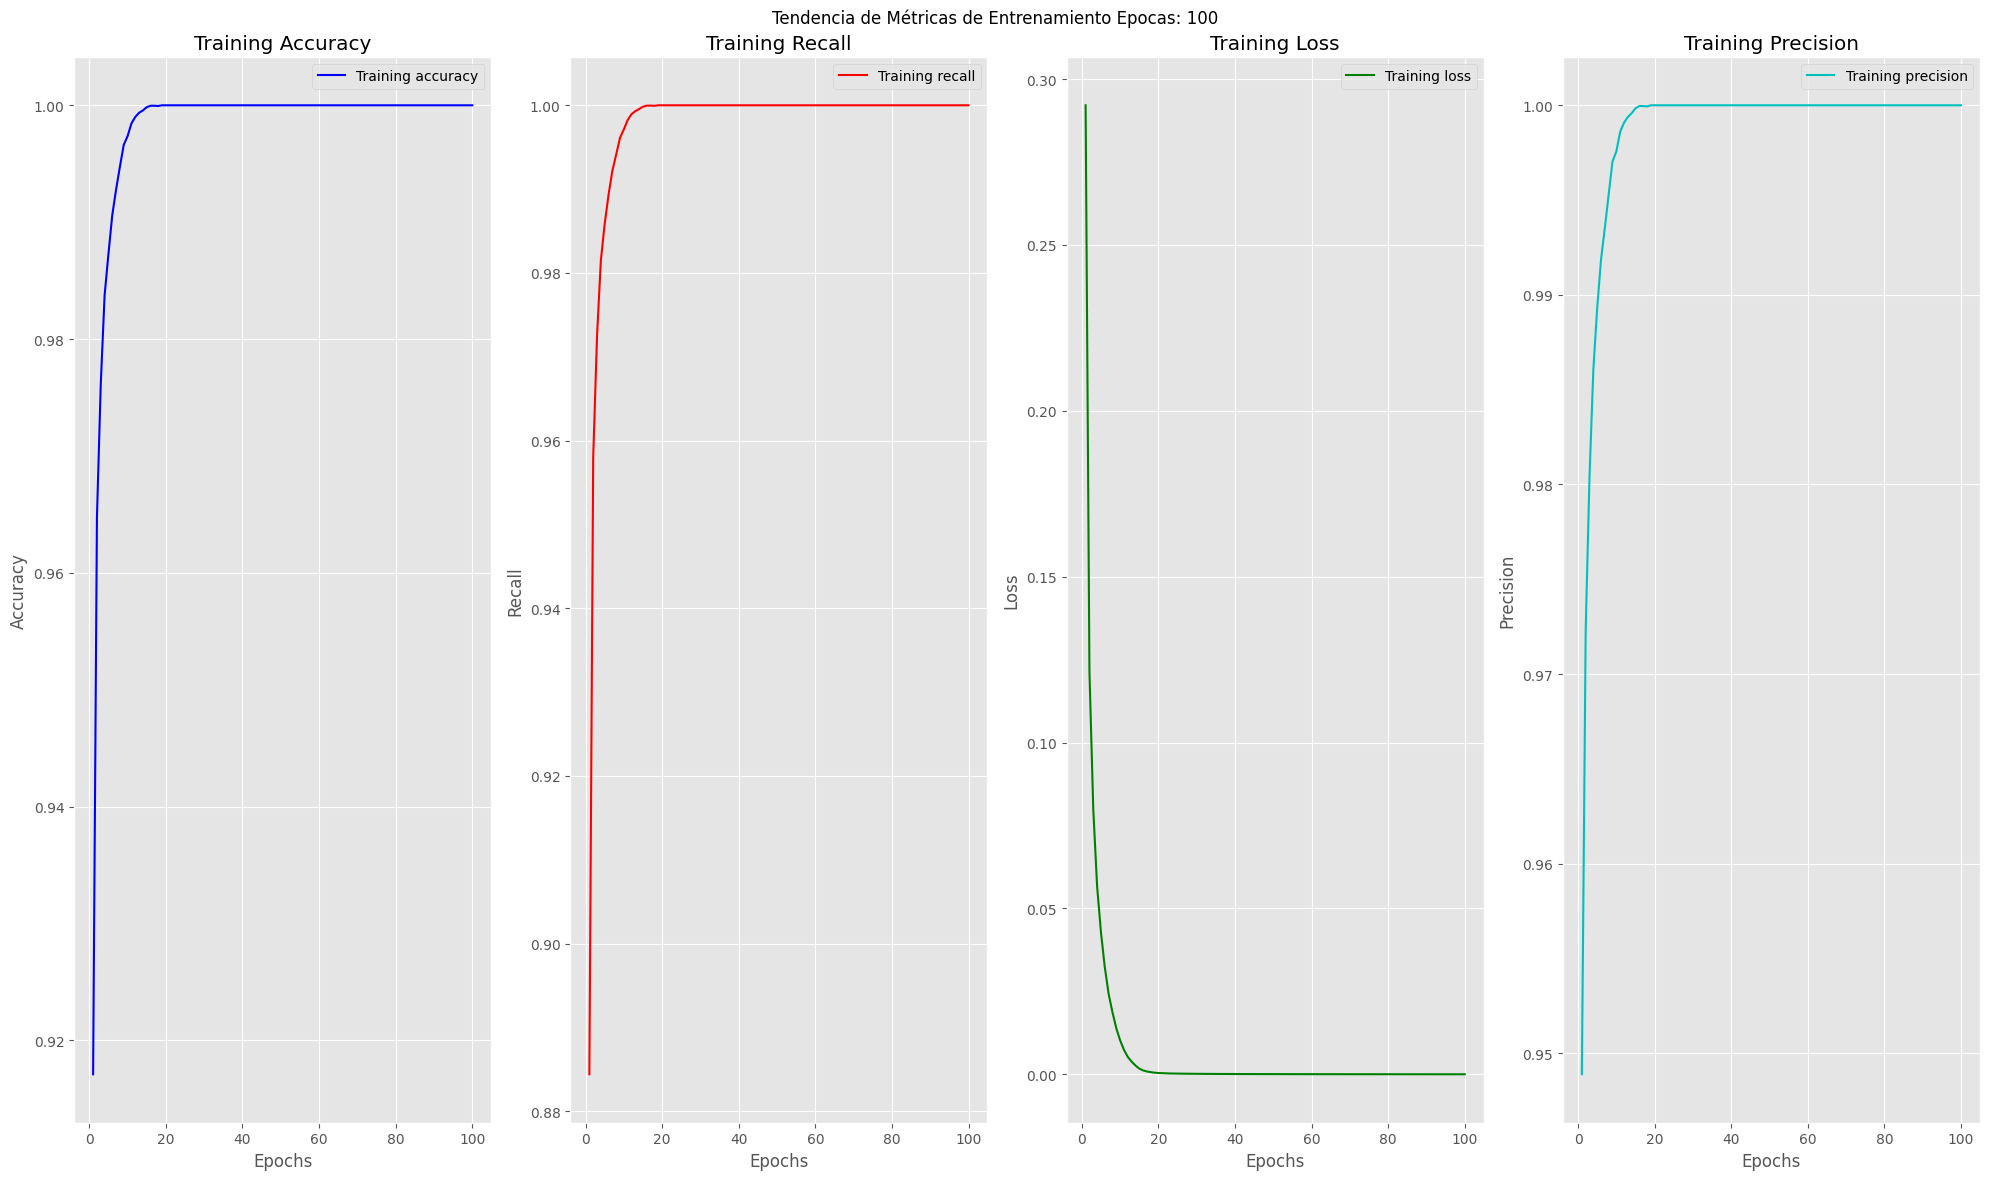

In [ ]:
graficar_epocas(modelos_epocas, "Epocas",5)

###Miramos la diferencia en el desempeño entre el conjunto de entrenamiento y validación.

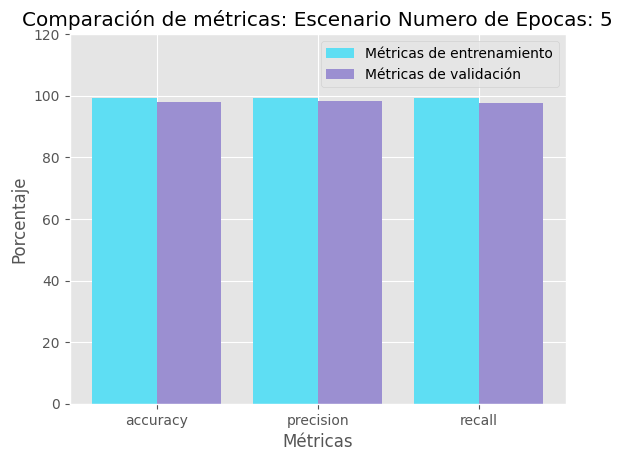

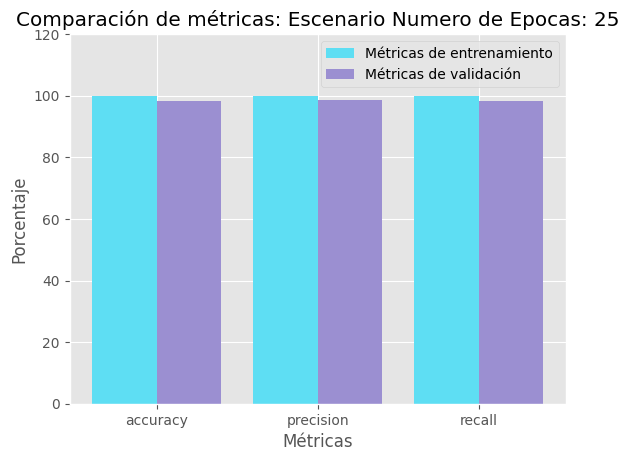

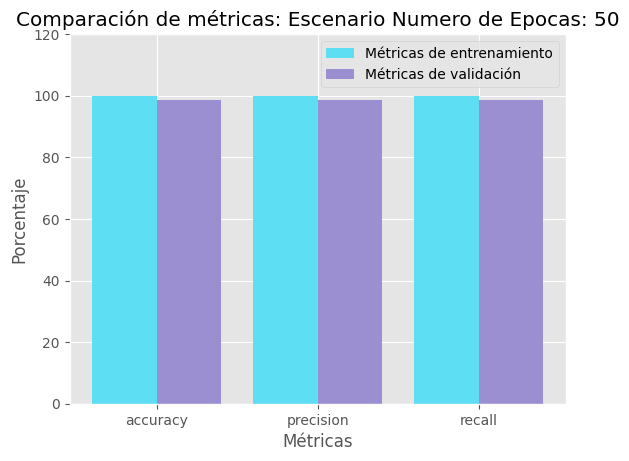

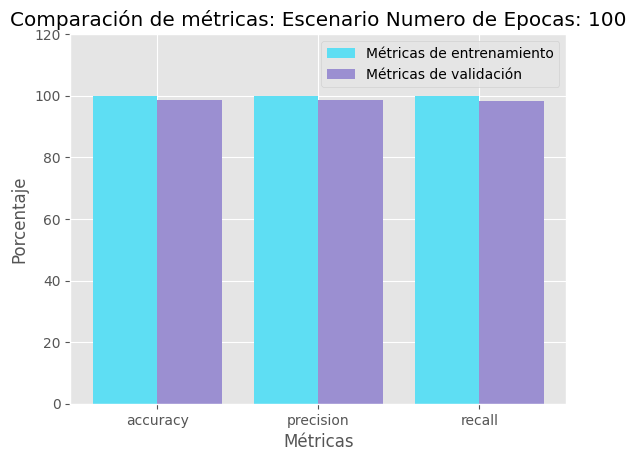

In [ ]:
grafica_ajuste(modelos_epocas, "Numero de Epocas")

### Jugamos a predecir con las diferentes redes (Escenario Numero de Epocas)

1/1 [==============================] - 0s 67ms/step

Predicción de probabilidad: [[1.5931018e-08 5.4678257e-08 7.0357214e-06 1.4753195e-05 9.7725451e-01
  3.2151110e-08 8.1505539e-07 9.4301748e-04 2.1368317e-02 4.1154207e-04]]
1/1 [==============================] - 0s 21ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[1.5931018e-08 5.4678257e-08 7.0357214e-06 1.4753195e-05 9.7725451e-01
  3.2151110e-08 8.1505539e-07 9.4301748e-04 2.1368317e-02 4.1154207e-04]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.977 0.    0.    0.001 0.021 0.   ]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


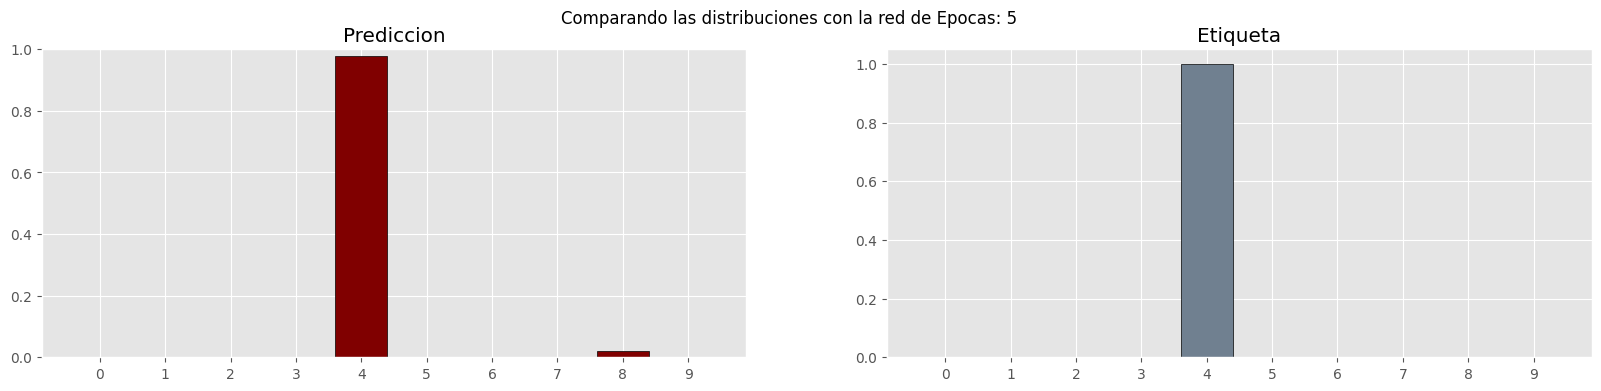

1/1 [==============================] - 0s 66ms/step

Predicción de probabilidad: [[8.5835673e-13 5.7448864e-14 4.6365392e-10 1.0951612e-12 9.9992335e-01
  1.1535575e-11 5.8209000e-08 6.2492639e-08 7.6040407e-05 4.7807481e-07]]
1/1 [==============================] - 0s 21ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[8.5835673e-13 5.7448864e-14 4.6365392e-10 1.0951612e-12 9.9992335e-01
  1.1535575e-11 5.8209000e-08 6.2492639e-08 7.6040407e-05 4.7807481e-07]], shape=(1, 10), dtype=float32)
Predicción:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


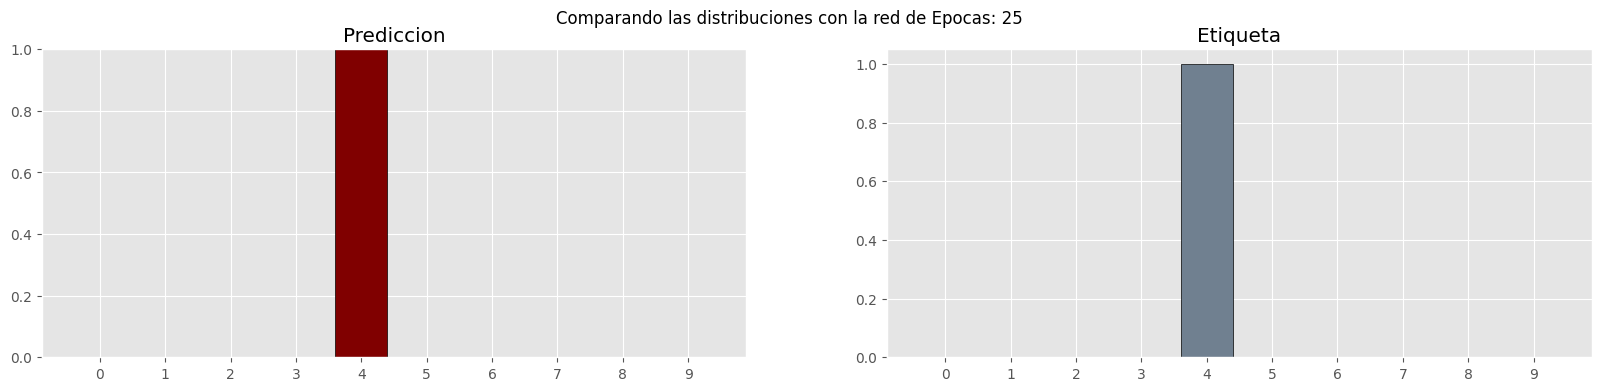

1/1 [==============================] - 0s 59ms/step

Predicción de probabilidad: [[6.2618198e-14 4.0145783e-15 3.2376933e-12 2.5389001e-13 9.9999774e-01
  1.2395767e-13 1.0259279e-09 1.2836287e-07 2.0867176e-06 1.1443787e-07]]
1/1 [==============================] - 0s 22ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[6.2618198e-14 4.0145783e-15 3.2376933e-12 2.5389001e-13 9.9999774e-01
  1.2395767e-13 1.0259279e-09 1.2836287e-07 2.0867176e-06 1.1443787e-07]], shape=(1, 10), dtype=float32)
Predicción:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


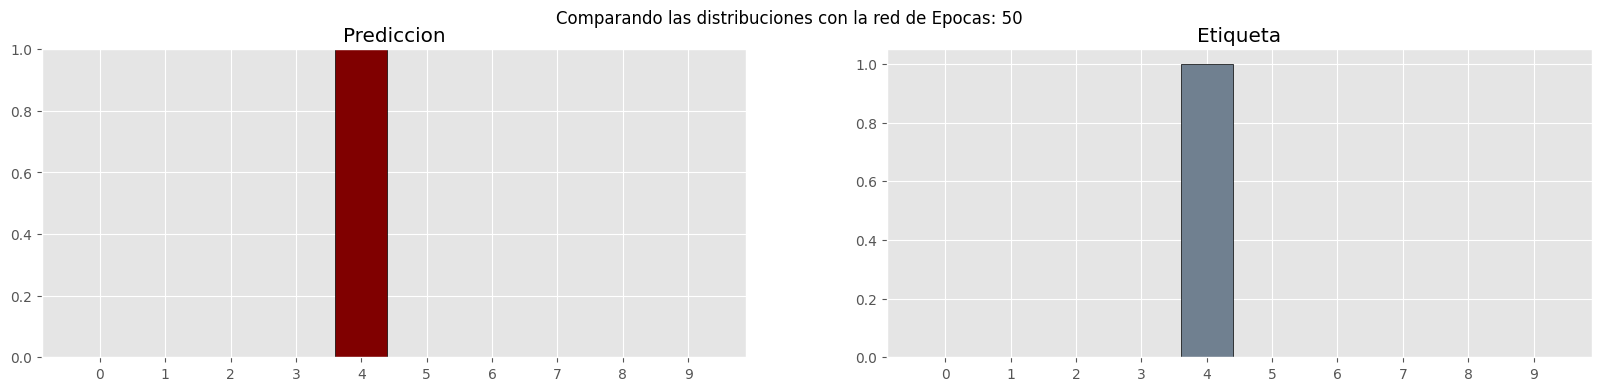

1/1 [==============================] - 0s 54ms/step

Predicción de probabilidad: [[1.8130382e-15 9.7882587e-16 1.9787232e-12 9.6869839e-12 9.9997234e-01
  1.8780055e-14 1.7690047e-10 1.0374174e-08 2.7464142e-05 2.3882137e-07]]
1/1 [==============================] - 0s 21ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[1.8130382e-15 9.7882587e-16 1.9787232e-12 9.6869839e-12 9.9997234e-01
  1.8780055e-14 1.7690047e-10 1.0374174e-08 2.7464142e-05 2.3882137e-07]], shape=(1, 10), dtype=float32)
Predicción:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


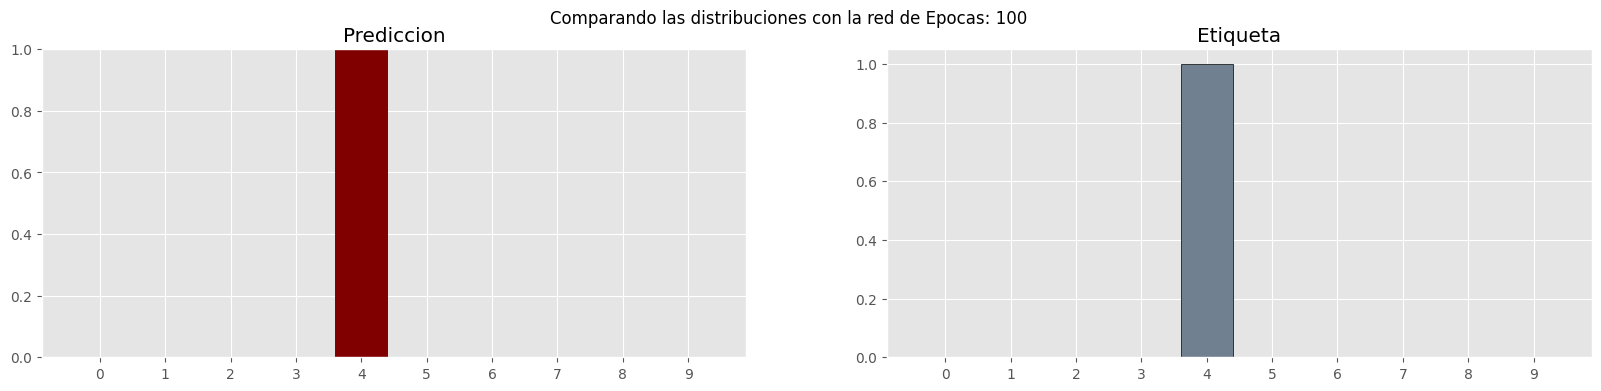

In [ ]:
Preddiciones_modelos(modelos_epocas,"Epocas")

# Escenario Número de capas ocultas: 1, 2, 4, 6, 8 disminuyendo progresivamente el número de neuronas por capa.

In [ ]:
num_capas = [1, 2, 4, 6, 8]

In [ ]:
modelos_disminuye_capas = {}

for capa in num_capas:
    model,H = capas(capa, False)
    modelos_disminuye_capas[capa] = info_modelos(model, H)

Epoch 1/5
391/391 [==============================] - 8s 20ms/step - loss: 0.2637 - accuracy: 0.9229 - precision_11: 0.9515 - recall_11: 0.8970
Epoch 2/5
391/391 [==============================] - 7s 18ms/step - loss: 0.1030 - accuracy: 0.9695 - precision_11: 0.9753 - recall_11: 0.9645
Epoch 3/5
391/391 [==============================] - 8s 21ms/step - loss: 0.0663 - accuracy: 0.9798 - precision_11: 0.9831 - recall_11: 0.9774
Epoch 4/5
391/391 [==============================] - 7s 17ms/step - loss: 0.0465 - accuracy: 0.9861 - precision_11: 0.9882 - recall_11: 0.9844
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0670 - accuracy: 0.9794 - precision_11: 0.9812 - recall_11: 0.9781
Epoch 1/5
391/391 [==============================] - 13s 32ms/step - loss: 0.2453 - accuracy: 0.9235 - precision_12: 0.9494 - recall_12: 0.9037
Epoch 2/5
391/391 [==============================] - 12s 30ms/step - loss: 0.0860 - accuracy: 0.9735 - precision_12: 0.9774 - recall_12: 0.970

### Número de neuronas por capa oculta en cada modelo:



In [ ]:
for capa in num_capas:
  print(f'Número de capas: {capa}')
  print(modelos_disminuye_capas[capa][0].summary())

Número de capas: 1
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              803840    
                                                                 
 dense_25 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814090 (3.11 MB)
Trainable params: 814090 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Número de capas: 2
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1024)              803840    
                                                                 
 dense_27 (Dense)            (None, 512)               524800    
                 

### Visualizacion de las metricas Escenario Numero de capas con disminucion de neuronas.

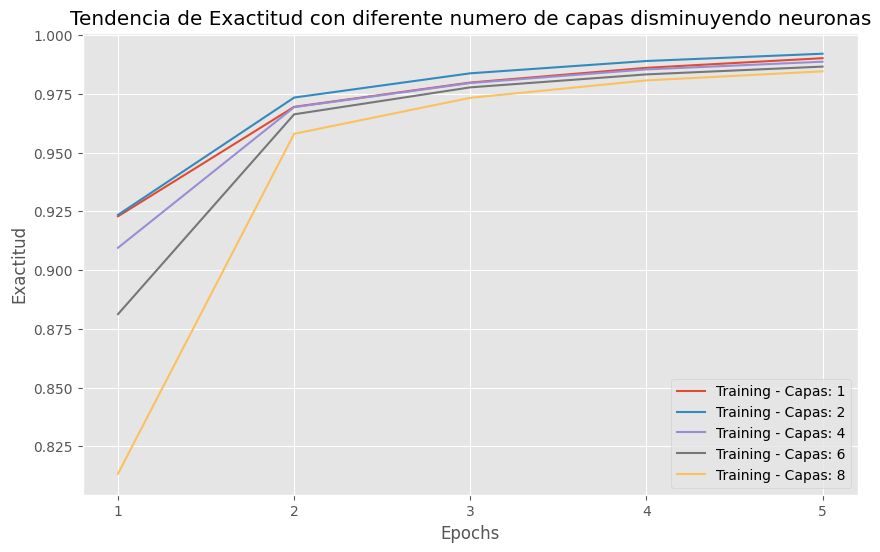

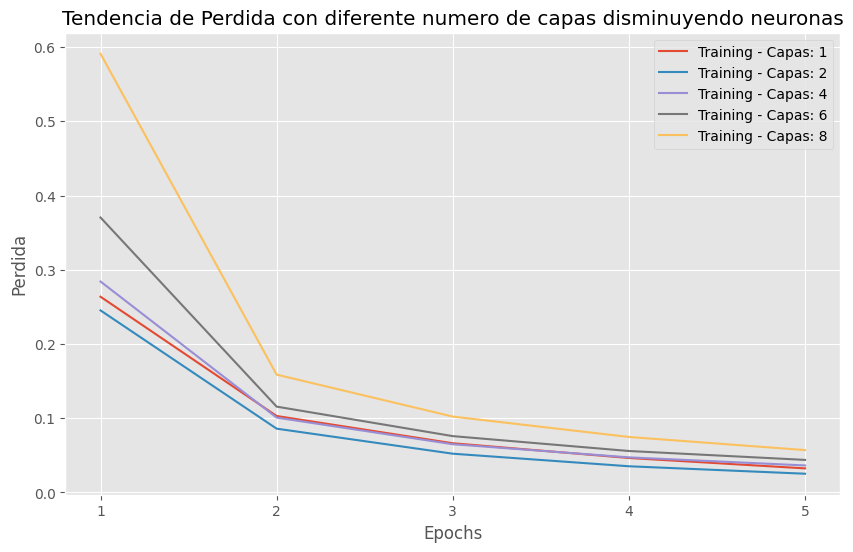

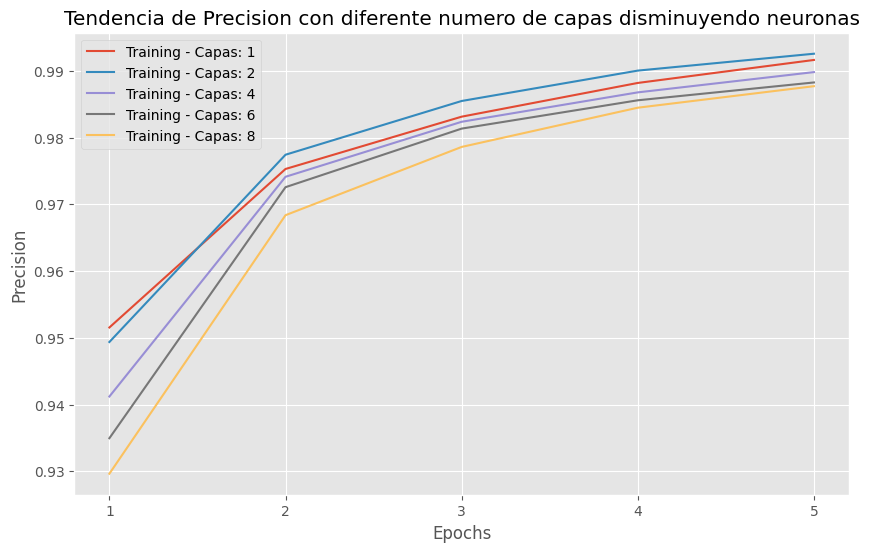

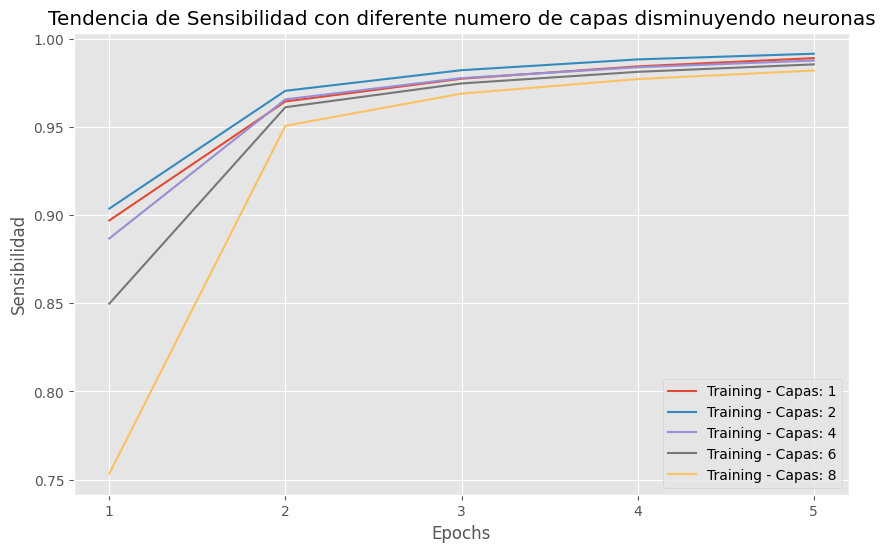

In [ ]:
plot_trends(modelos_disminuye_capas, 'accuracy', 'Exactitud', 'Tendencia de Exactitud con diferente numero de capas disminuyendo neuronas',"Capas")
plot_trends(modelos_disminuye_capas, 'loss', 'Perdida', 'Tendencia de Perdida con diferente numero de capas disminuyendo neuronas',"Capas")
plot_trends(modelos_disminuye_capas, 'precision', 'Precision', 'Tendencia de Precision con diferente numero de capas disminuyendo neuronas',"Capas")
plot_trends(modelos_disminuye_capas, 'recall', 'Sensibilidad', 'Tendencia de Sensibilidad con diferente numero de capas disminuyendo neuronas',"Capas")

###Miramos la diferencia en el desempeño entre el conjunto de entrenamiento y validación.

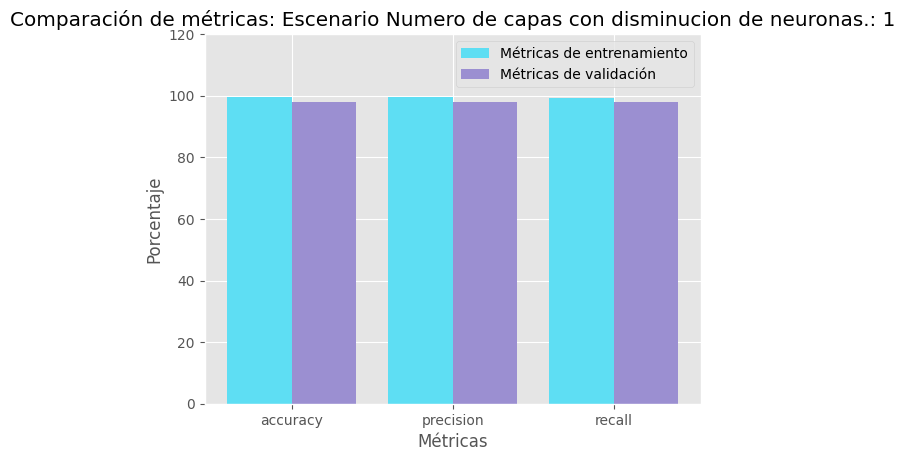

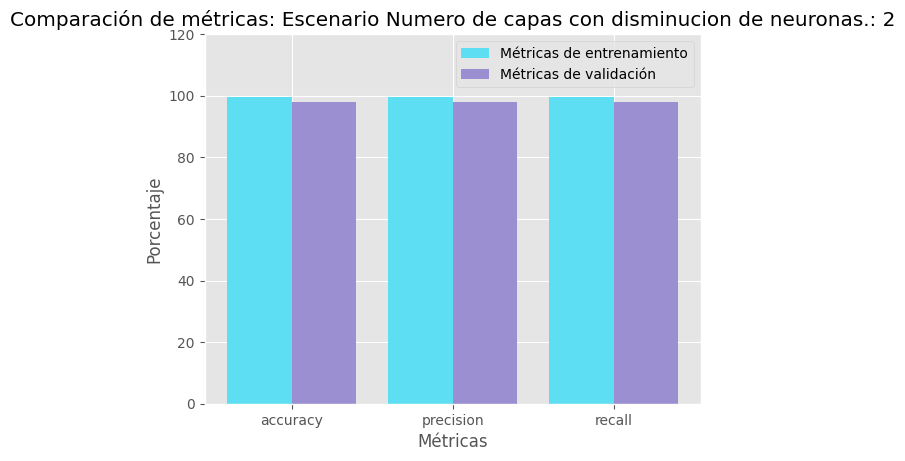

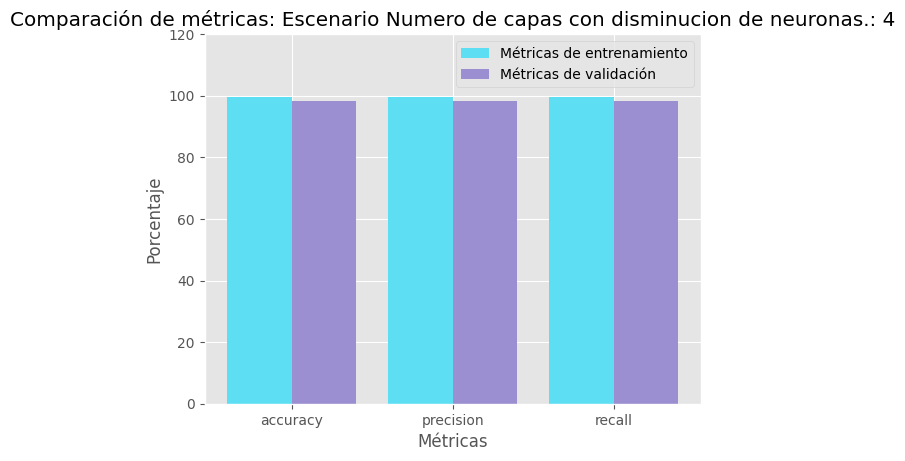

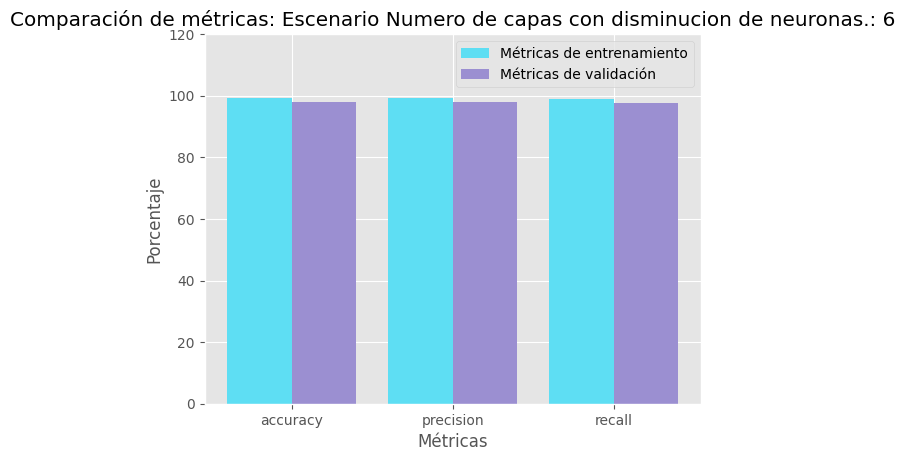

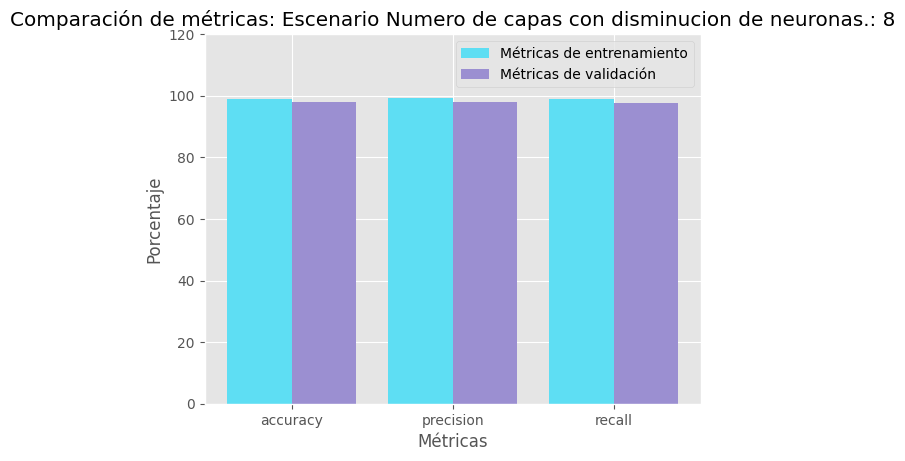

In [ ]:
grafica_ajuste(modelos_disminuye_capas, "Numero de capas con disminucion de neuronas.")

###Jugamos a predecir con las diferentes redes (Escenario Numero de capas disminuyendo progresivamente las neuronas)

1/1 [==============================] - 0s 57ms/step

Predicción de probabilidad: [[3.0069870e-08 6.8577961e-08 4.1598169e-06 2.1800529e-06 9.9894577e-01
  6.9243029e-08 4.7295225e-06 4.6228635e-04 4.9645419e-04 8.4370484e-05]]
1/1 [==============================] - 0s 21ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[3.0069870e-08 6.8577961e-08 4.1598169e-06 2.1800529e-06 9.9894577e-01
  6.9243029e-08 4.7295225e-06 4.6228635e-04 4.9645419e-04 8.4370484e-05]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.999 0.    0.    0.    0.    0.   ]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


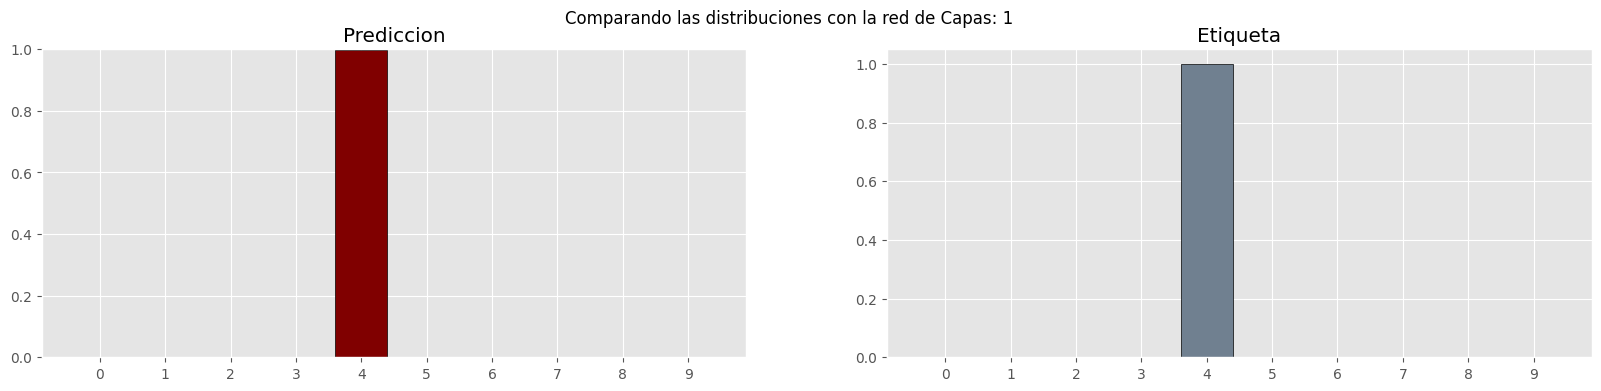

1/1 [==============================] - 0s 63ms/step

Predicción de probabilidad: [[1.35147588e-10 1.21251347e-07 6.71840823e-08 6.08988637e-10
  9.99978542e-01 2.81281185e-08 1.34019871e-07 9.82178062e-06
  1.01676715e-05 1.08813924e-06]]
1/1 [==============================] - 0s 24ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[1.35147588e-10 1.21251347e-07 6.71840823e-08 6.08988637e-10
  9.99978542e-01 2.81281185e-08 1.34019871e-07 9.82178062e-06
  1.01676715e-05 1.08813924e-06]], shape=(1, 10), dtype=float32)
Predicción:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


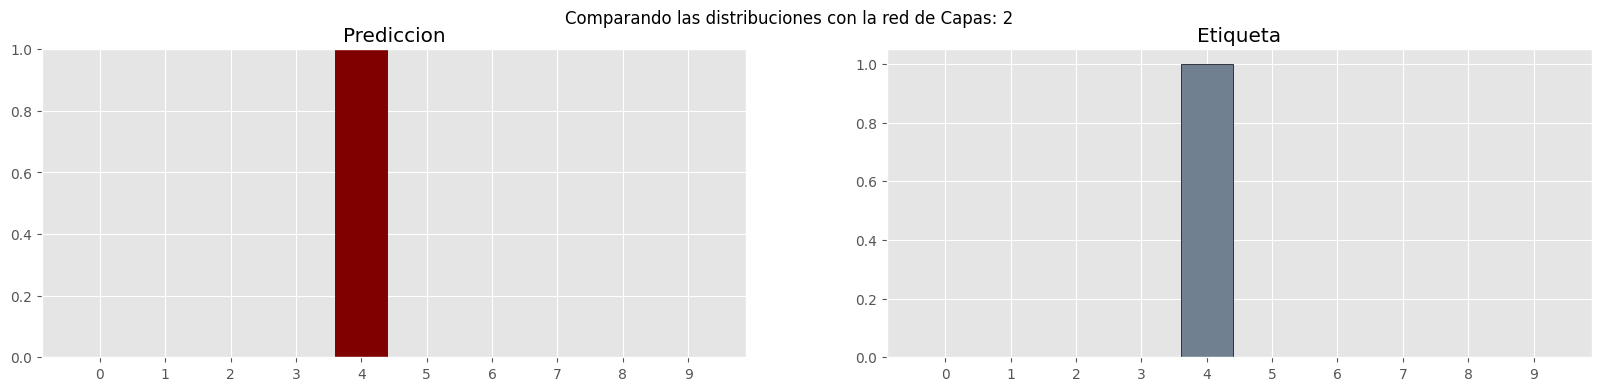

1/1 [==============================] - 0s 73ms/step

Predicción de probabilidad: [[2.2578333e-09 1.7676987e-07 3.1138956e-08 1.9304907e-09 9.9998379e-01
  4.5670621e-08 5.2300933e-08 7.7480244e-09 5.4298886e-07 1.5340220e-05]]
1/1 [==============================] - 0s 30ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[2.2578333e-09 1.7676987e-07 3.1138956e-08 1.9304907e-09 9.9998379e-01
  4.5670621e-08 5.2300933e-08 7.7480244e-09 5.4298886e-07 1.5340220e-05]], shape=(1, 10), dtype=float32)
Predicción:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


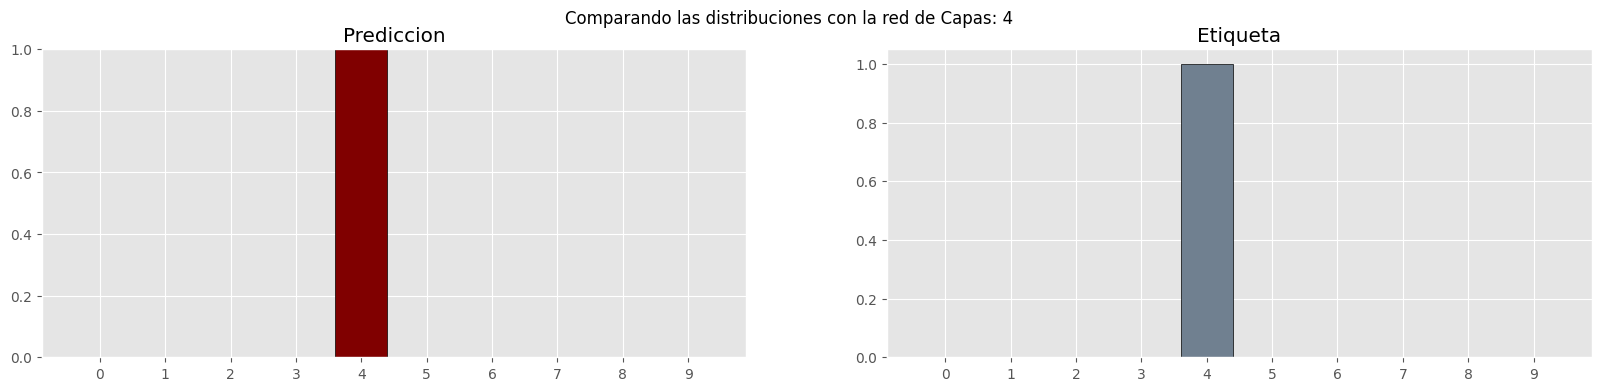

1/1 [==============================] - 0s 133ms/step

Predicción de probabilidad: [[1.0514472e-04 7.3619583e-04 2.2867219e-04 1.6779754e-06 9.9654752e-01
  3.1175700e-04 7.2216237e-04 5.7856162e-04 2.1711284e-04 5.5118033e-04]]
1/1 [==============================] - 0s 32ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[1.0514472e-04 7.3619583e-04 2.2867219e-04 1.6779754e-06 9.9654752e-01
  3.1175700e-04 7.2216237e-04 5.7856162e-04 2.1711284e-04 5.5118033e-04]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.001 0.    0.    0.997 0.    0.001 0.001 0.    0.001]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


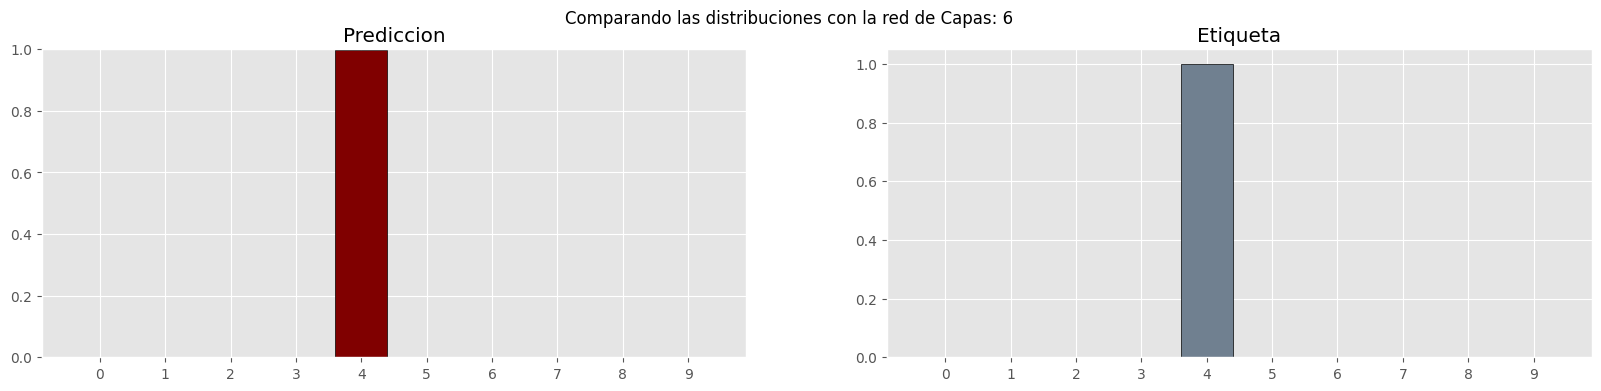

1/1 [==============================] - 0s 158ms/step

Predicción de probabilidad: [[3.1709746e-12 1.8897558e-06 8.6096306e-06 7.0916681e-09 9.9968719e-01
  3.1266225e-08 1.9590318e-16 3.5523735e-06 5.6673663e-14 2.9882023e-04]]
1/1 [==============================] - 0s 31ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[3.1709746e-12 1.8897558e-06 8.6096306e-06 7.0916681e-09 9.9968719e-01
  3.1266225e-08 1.9590318e-16 3.5523735e-06 5.6673663e-14 2.9882023e-04]], shape=(1, 10), dtype=float32)
Predicción:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


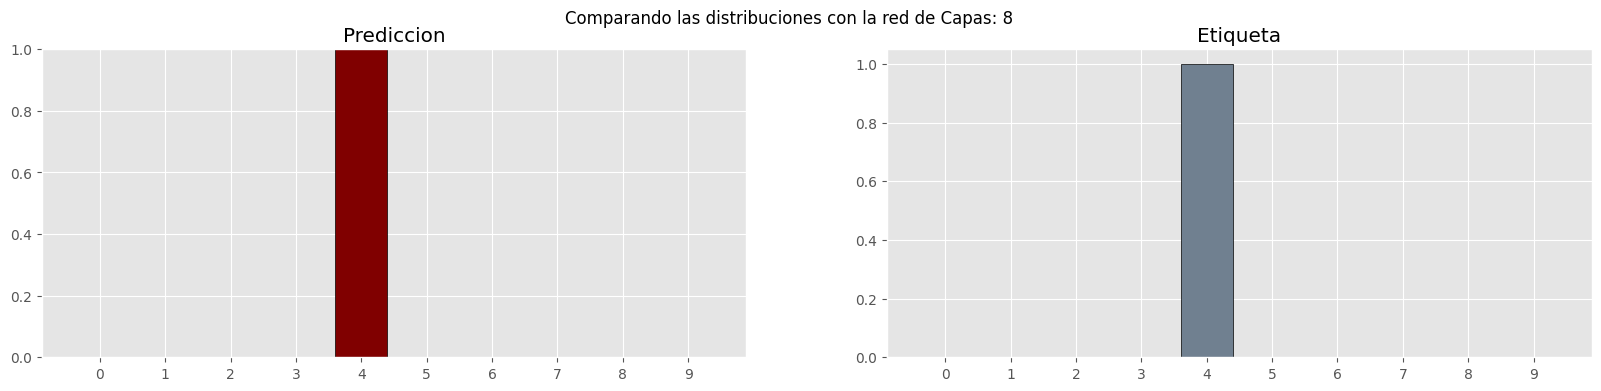

In [ ]:
Preddiciones_modelos(modelos_disminuye_capas,"Capas")

# Escenario Número de capas ocultas: 1, 2, 4, 6, 8 aumentando progresivamente el número de neuronas por capa.

In [ ]:
modelos_aumenta_capas = {}

for capa in num_capas:
    model,H = capas(capa, True)
    modelos_aumenta_capas[capa] = info_modelos(model, H)

Epoch 1/5
391/391 [==============================] - 2s 3ms/step - loss: 0.9665 - accuracy: 0.7052 - precision_16: 0.9272 - recall_16: 0.4822
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4362 - accuracy: 0.8726 - precision_16: 0.9187 - recall_16: 0.8273
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.3720 - accuracy: 0.8935 - precision_16: 0.9247 - recall_16: 0.8650
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.3404 - accuracy: 0.9035 - precision_16: 0.9290 - recall_16: 0.8804
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3173 - accuracy: 0.9078 - precision_16: 0.9330 - recall_16: 0.8889
Epoch 1/5
391/391 [==============================] - 2s 3ms/step - loss: 0.9014 - accuracy: 0.7418 - precision_17: 0.9218 - recall_17: 0.5422
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.3962 - accuracy: 0.8859 - precision_17: 0.9194 - recall_17: 0.8533
Epoch 

### Número de neuronas por capa en cada modelo

In [ ]:
for capa in num_capas:
  print(f'Número de capas: {capa}')
  print(modelos_aumenta_capas[capa][0].summary())

Número de capas: 1
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 8)                 6280      
                                                                 
 dense_51 (Dense)            (None, 10)                90        
                                                                 
Total params: 6370 (24.88 KB)
Trainable params: 6370 (24.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Número de capas: 2
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 8)                 6280      
                                                                 
 dense_53 (Dense)            (None, 16)                144       
                   

### Visualizacion de las metricas Escenario Numero de capas aumentando de neuronas.

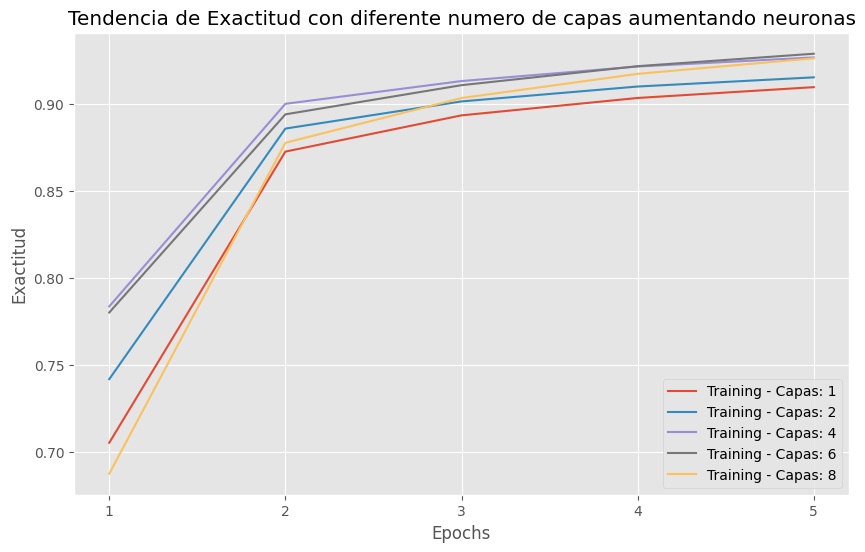

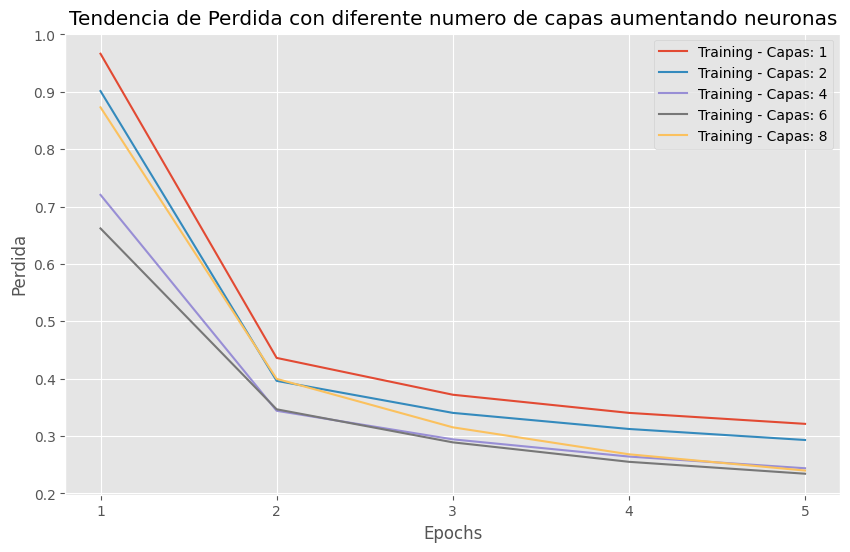

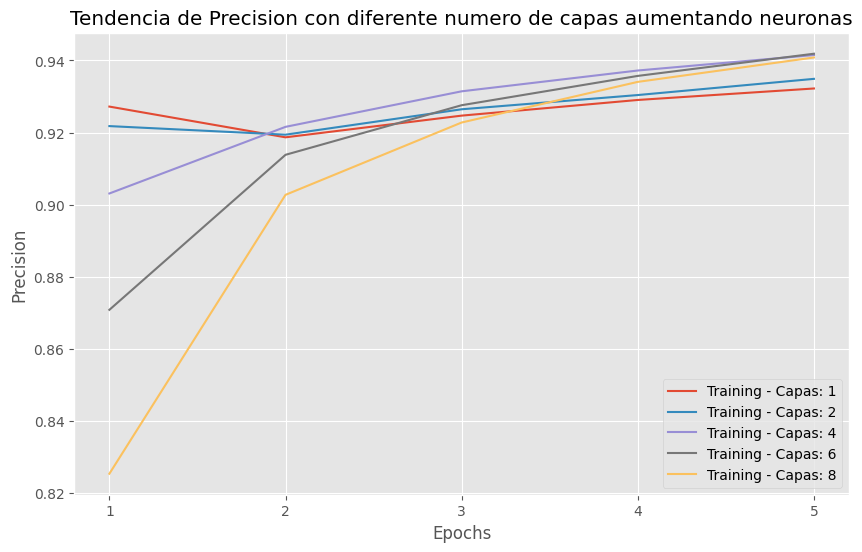

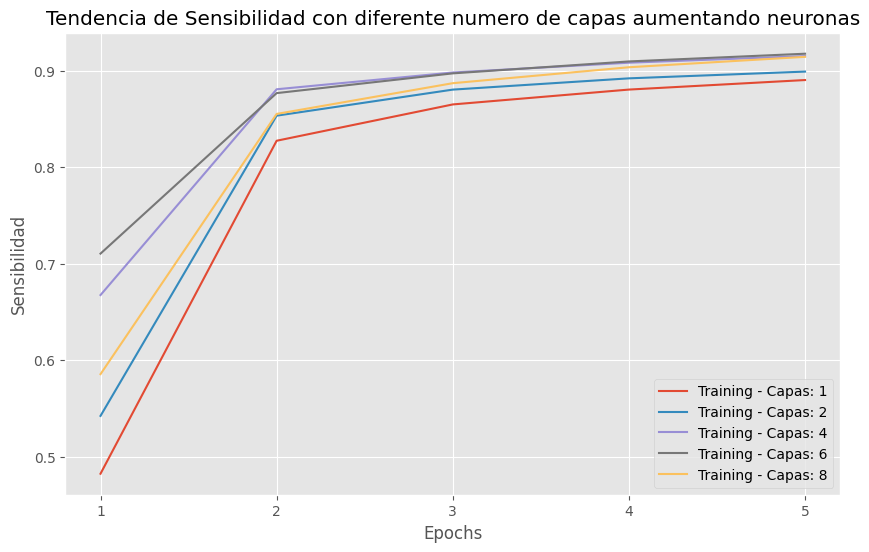

In [ ]:
plot_trends(modelos_aumenta_capas, 'accuracy', 'Exactitud', 'Tendencia de Exactitud con diferente numero de capas aumentando neuronas',"Capas")
plot_trends(modelos_aumenta_capas, 'loss', 'Perdida', 'Tendencia de Perdida con diferente numero de capas aumentando neuronas',"Capas")
plot_trends(modelos_aumenta_capas, 'precision', 'Precision', 'Tendencia de Precision con diferente numero de capas aumentando neuronas',"Capas")
plot_trends(modelos_aumenta_capas, 'recall', 'Sensibilidad', 'Tendencia de Sensibilidad con diferente numero de capas aumentando neuronas',"Capas")

###Miramos la diferencia en el desempeño entre el conjunto de entrenamiento y validación.

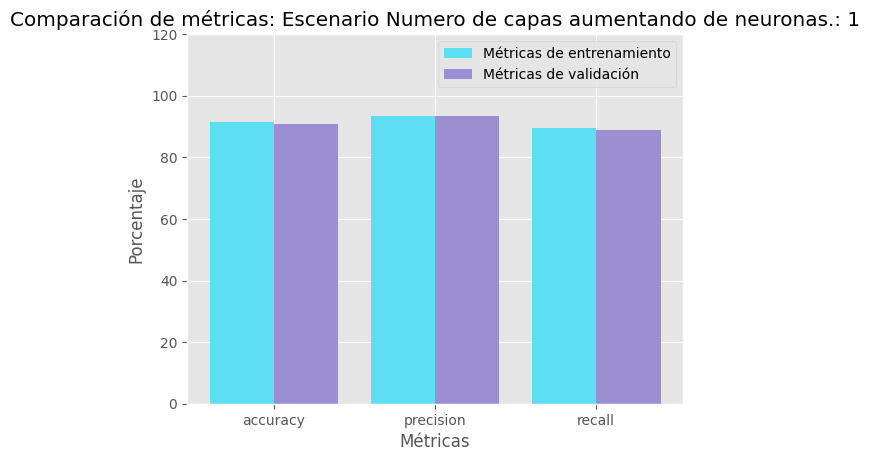

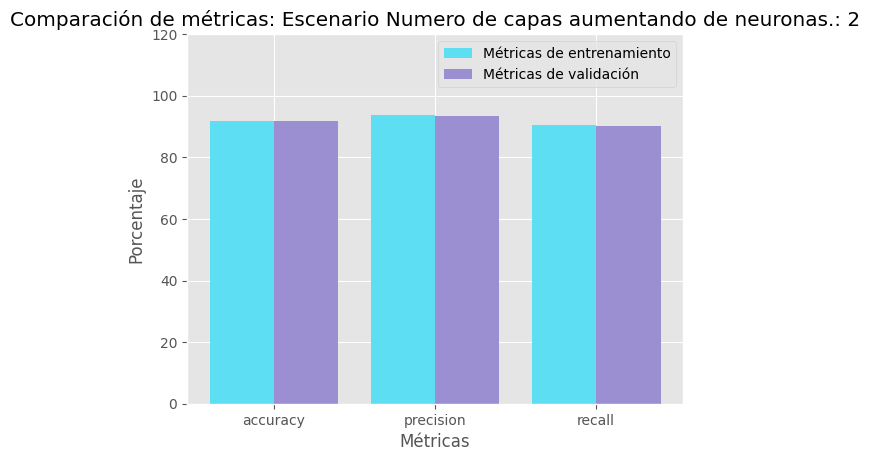

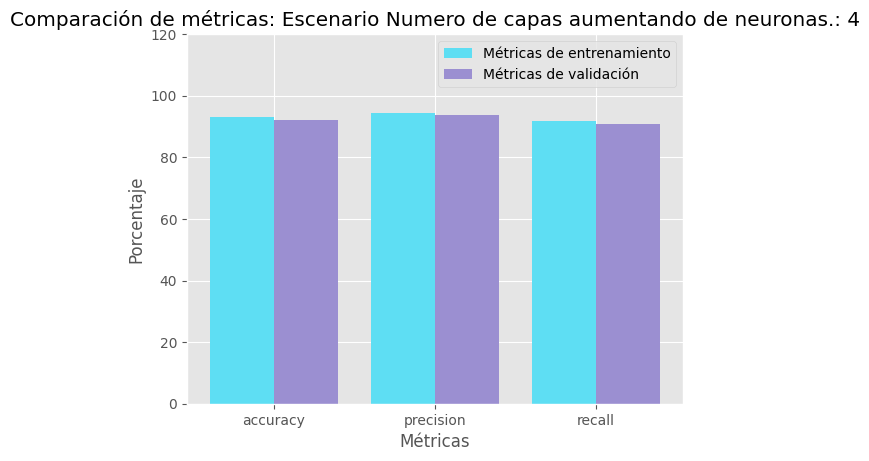

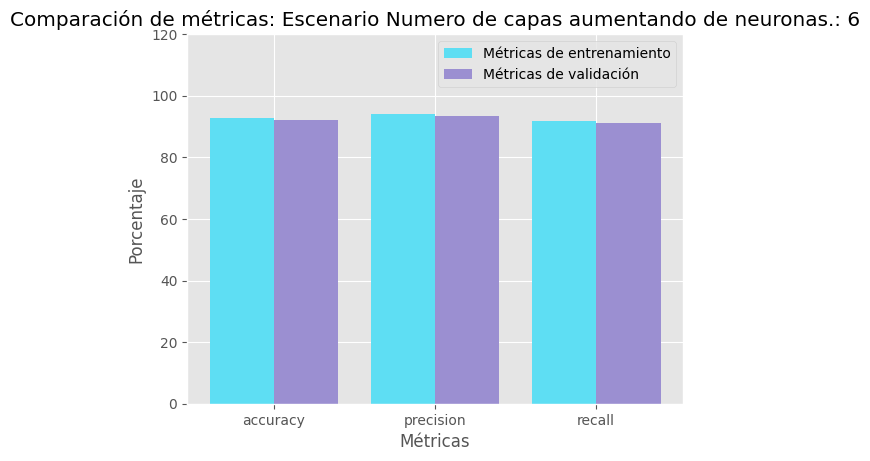

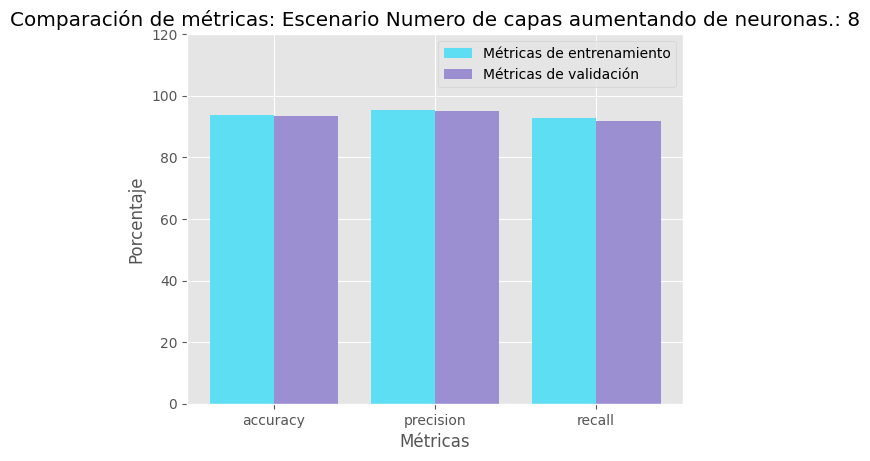

In [ ]:
grafica_ajuste(modelos_aumenta_capas, "Numero de capas aumentando de neuronas.")

### Jugamos a predecir con las diferentes redes (Escenario Numero de capas aumentando progresivamente las neuronas)

1/1 [==============================] - 0s 82ms/step

Predicción de probabilidad: [[6.9607694e-07 2.9722161e-08 3.0632891e-05 3.9786300e-06 9.7601765e-01
  1.6465357e-04 1.1690874e-04 2.0694219e-04 2.5557701e-03 2.0902742e-02]]
1/1 [==============================] - 0s 23ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[6.9607694e-07 2.9722161e-08 3.0632891e-05 3.9786300e-06 9.7601765e-01
  1.6465357e-04 1.1690874e-04 2.0694219e-04 2.5557701e-03 2.0902742e-02]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.976 0.    0.    0.    0.003 0.021]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


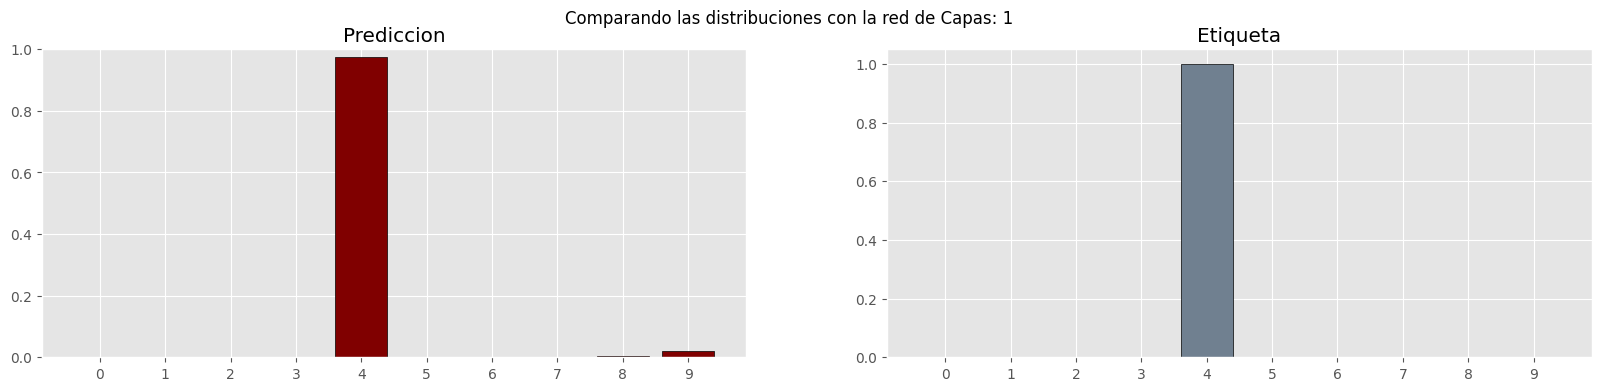

1/1 [==============================] - 0s 65ms/step

Predicción de probabilidad: [[4.23346291e-09 3.25390492e-09 3.98969235e-07 4.14828505e-10
  9.98324096e-01 1.11600207e-06 1.74606953e-06 1.01884359e-06
  1.06274274e-04 1.56536757e-03]]
1/1 [==============================] - 0s 20ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[4.23346291e-09 3.25390492e-09 3.98969235e-07 4.14828505e-10
  9.98324096e-01 1.11600207e-06 1.74606953e-06 1.01884359e-06
  1.06274274e-04 1.56536757e-03]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.998 0.    0.    0.    0.    0.002]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


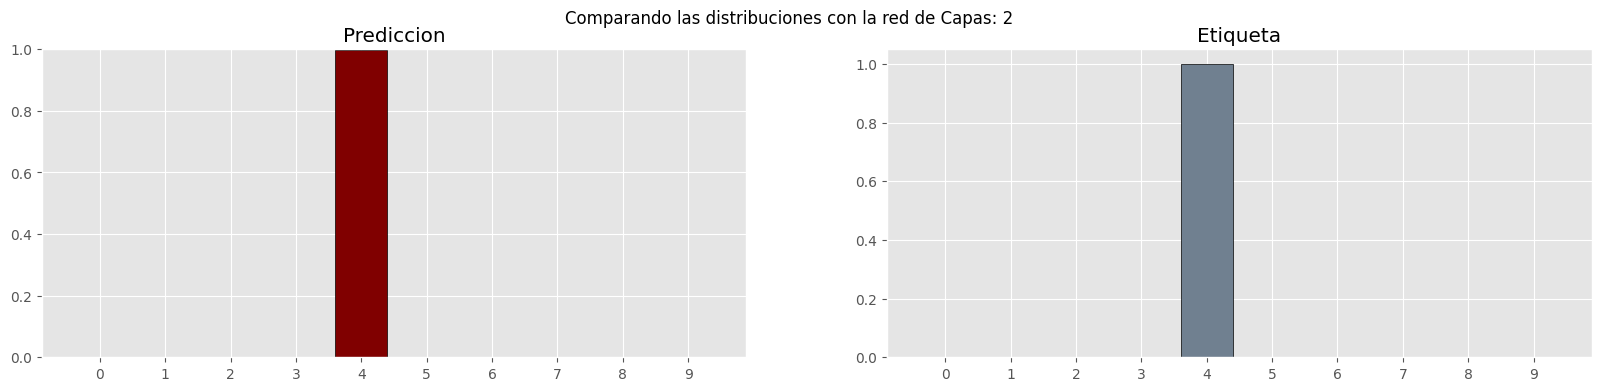

1/1 [==============================] - 0s 74ms/step

Predicción de probabilidad: [[7.4576241e-07 9.2853060e-07 4.4647302e-05 7.7631339e-06 9.9621850e-01
  8.7880420e-05 7.1191189e-06 1.0388618e-05 2.9430292e-03 6.7904196e-04]]
1/1 [==============================] - 0s 21ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[7.4576241e-07 9.2853060e-07 4.4647302e-05 7.7631339e-06 9.9621850e-01
  8.7880420e-05 7.1191189e-06 1.0388618e-05 2.9430292e-03 6.7904196e-04]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.996 0.    0.    0.    0.003 0.001]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


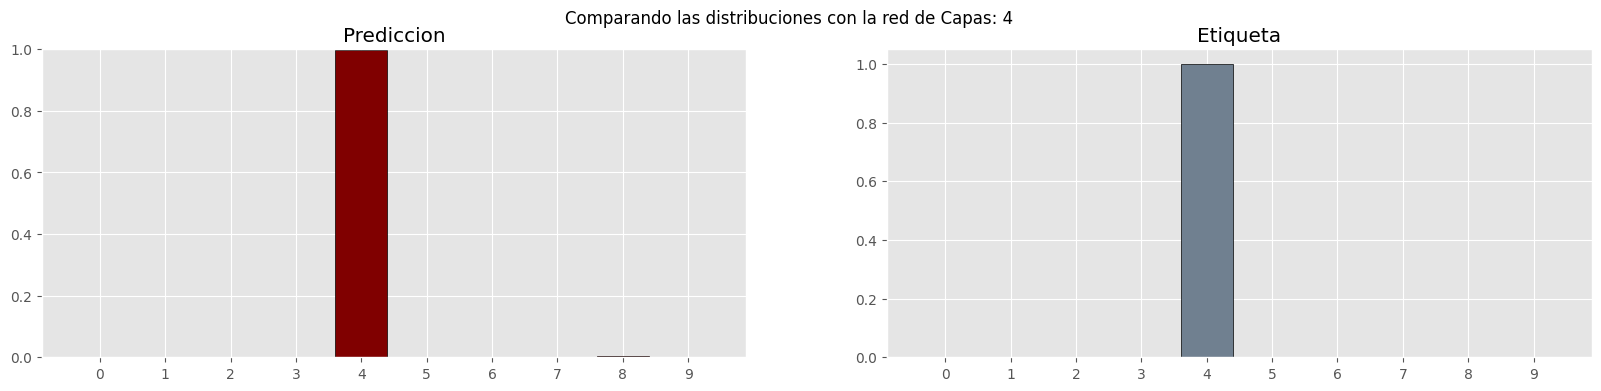

1/1 [==============================] - 0s 89ms/step

Predicción de probabilidad: [[1.29968475e-05 1.28481615e-05 7.34452478e-05 5.80328287e-06
  9.68086064e-01 4.94530104e-05 1.31365377e-05 4.18945856e-04
  1.29994194e-04 3.11973207e-02]]
1/1 [==============================] - 0s 20ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[1.29968475e-05 1.28481615e-05 7.34452478e-05 5.80328287e-06
  9.68086064e-01 4.94530104e-05 1.31365377e-05 4.18945856e-04
  1.29994194e-04 3.11973207e-02]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.    0.    0.968 0.    0.    0.    0.    0.031]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


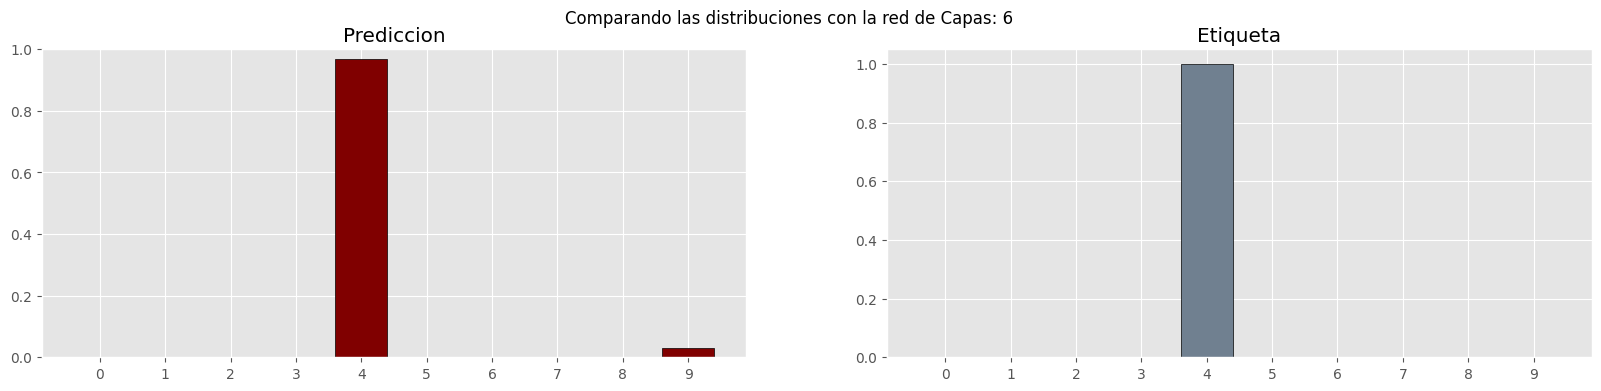

1/1 [==============================] - 0s 100ms/step

Predicción de probabilidad: [[3.1452953e-05 1.2920951e-05 1.0979996e-03 1.6046222e-05 9.7517914e-01
  1.4950969e-04 9.3090574e-05 6.6810600e-03 1.3945728e-04 1.6599251e-02]]
1/1 [==============================] - 0s 22ms/step

Predicción de clase: [4]

Predicción desde el modelo: tf.Tensor(
[[3.1452953e-05 1.2920951e-05 1.0979996e-03 1.6046222e-05 9.7517914e-01
  1.4950969e-04 9.3090574e-05 6.6810600e-03 1.3945728e-04 1.6599251e-02]], shape=(1, 10), dtype=float32)
Predicción:
 [0.    0.    0.001 0.    0.975 0.    0.    0.007 0.    0.017]
Etiqueta original:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


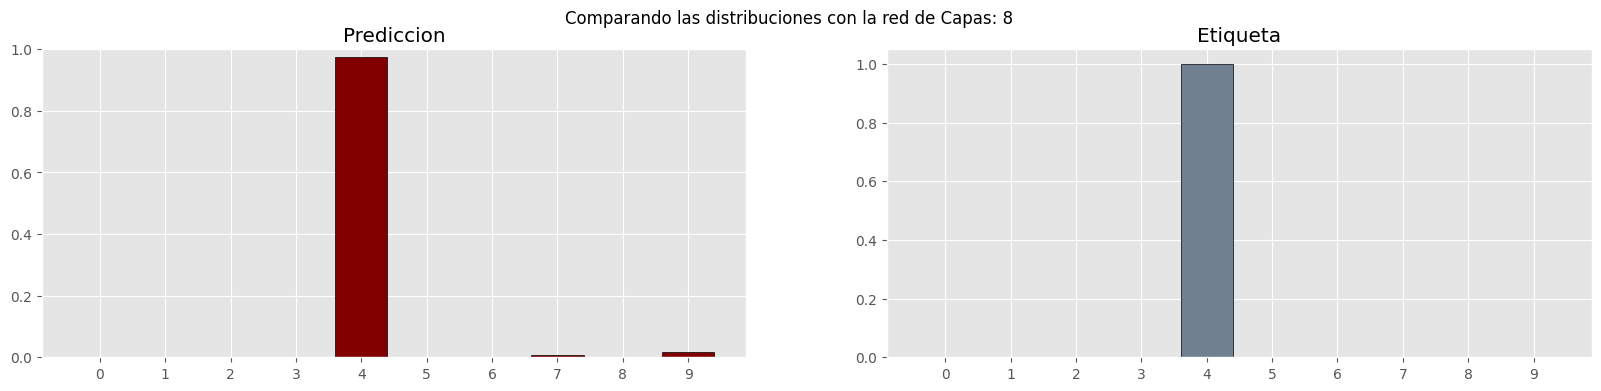

In [ ]:
Preddiciones_modelos(modelos_aumenta_capas,"Capas")

# Decisión Modelos finales

###### Descartamos el modelo con 6 capas y aumentando las neuronas progresivamente por que era muy malo y para la grafica.

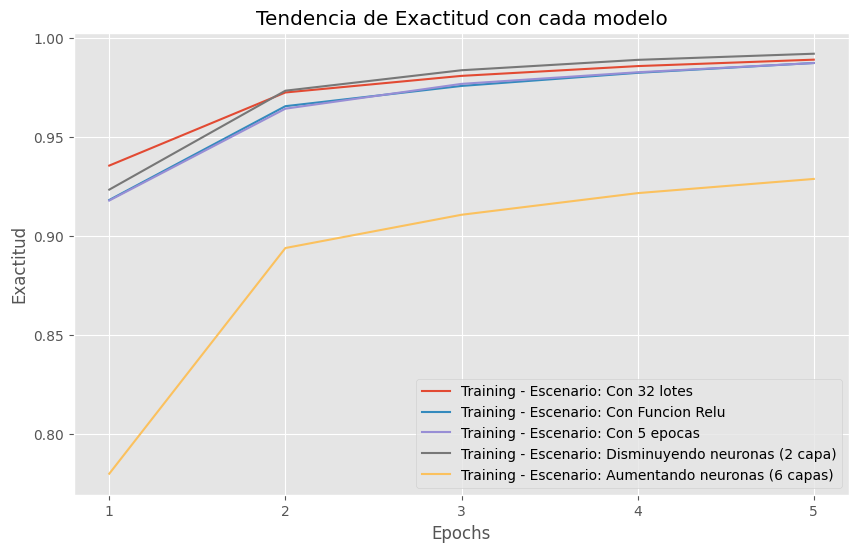

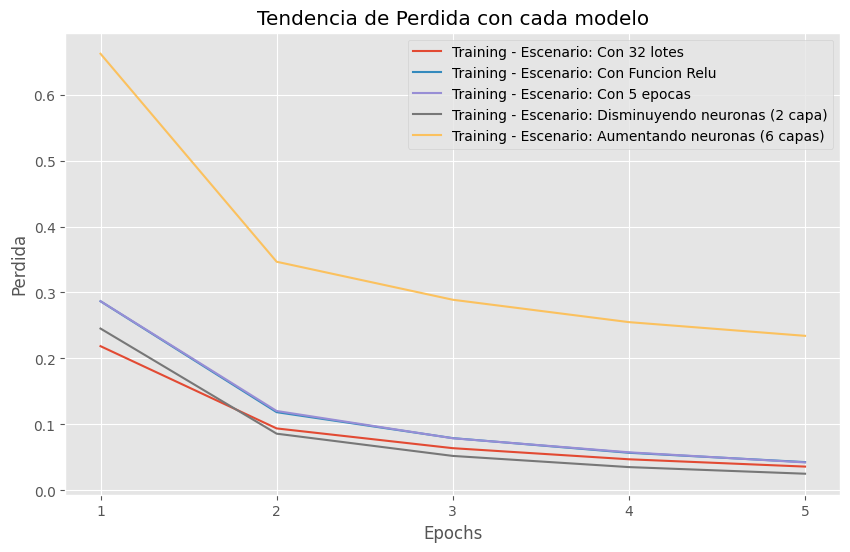

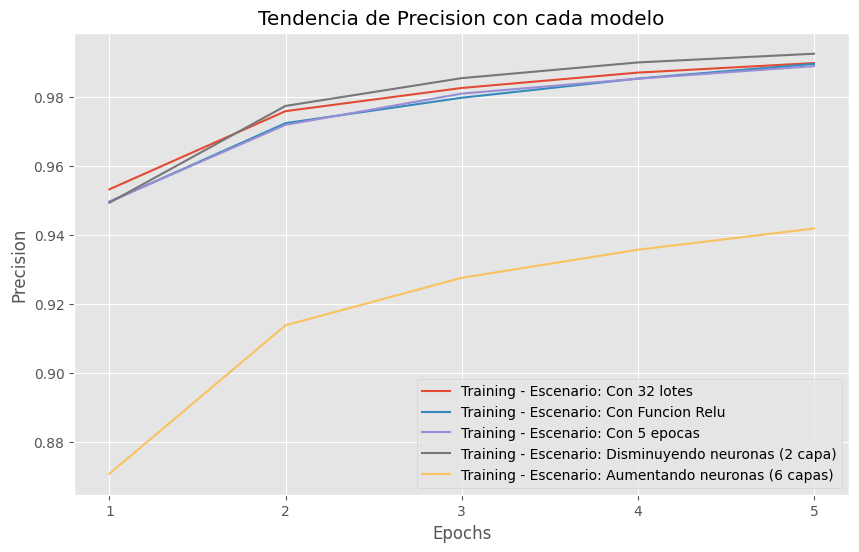

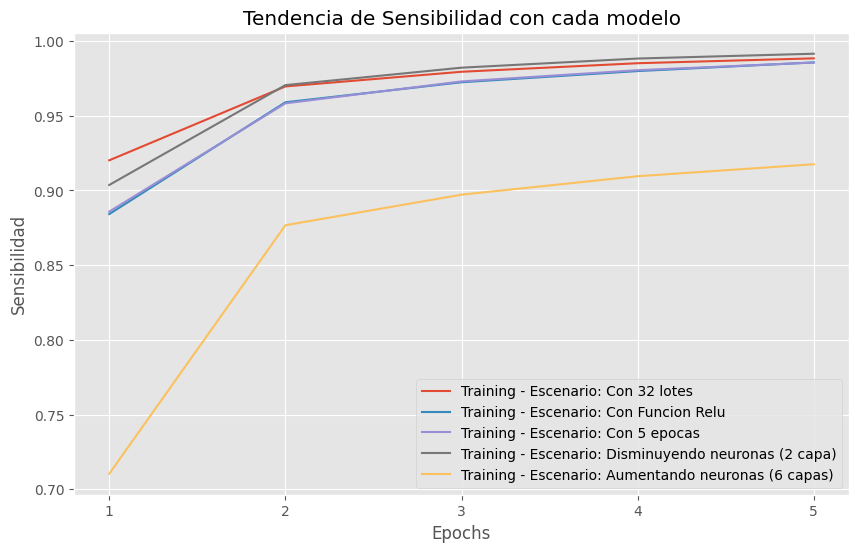

In [ ]:
modelos_finales={"Con 32 lotes":modelos_lotes[32],
                 "Con Funcion Relu": modelos_funciones['relu'],
                 "Con 5 epocas": modelos_epocas[5],
                 "Disminuyendo neuronas (2 capa)":modelos_disminuye_capas[2],
                 "Aumentando neuronas (6 capas)":modelos_aumenta_capas[6]}
plot_trends(modelos_finales, 'accuracy', 'Exactitud', 'Tendencia de Exactitud con cada modelo',"Escenario")
plot_trends(modelos_finales, 'loss', 'Perdida', 'Tendencia de Perdida con cada modelo',"Escenario")
plot_trends(modelos_finales, 'precision', 'Precision', 'Tendencia de Precision con cada modelo',"Escenario")
plot_trends(modelos_finales, 'recall', 'Sensibilidad', 'Tendencia de Sensibilidad con cada modelo',"Escenario")

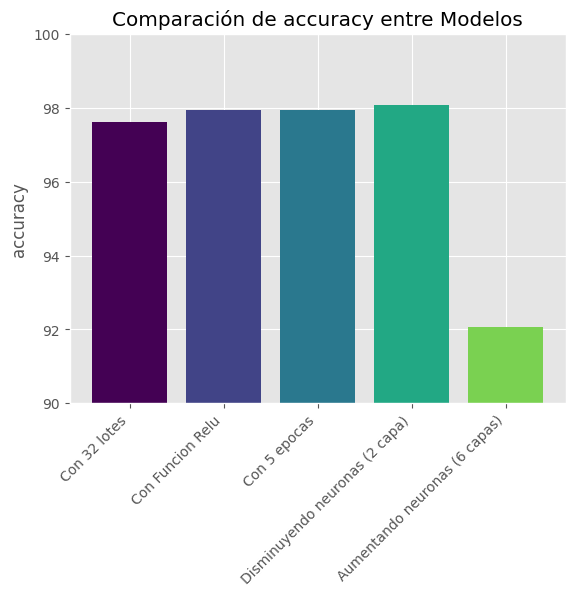

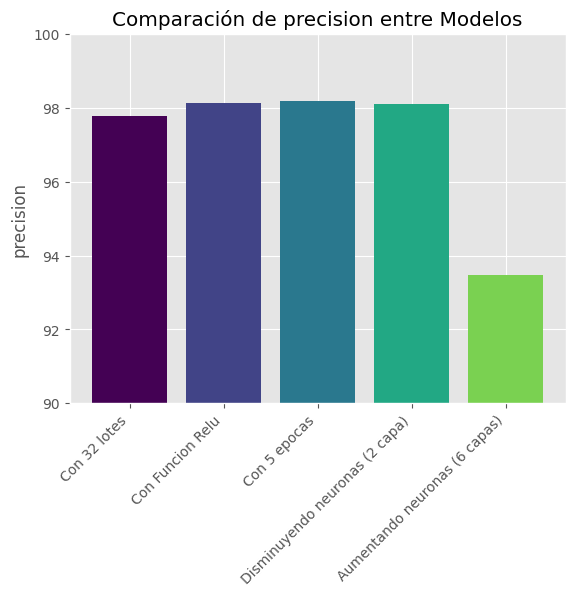

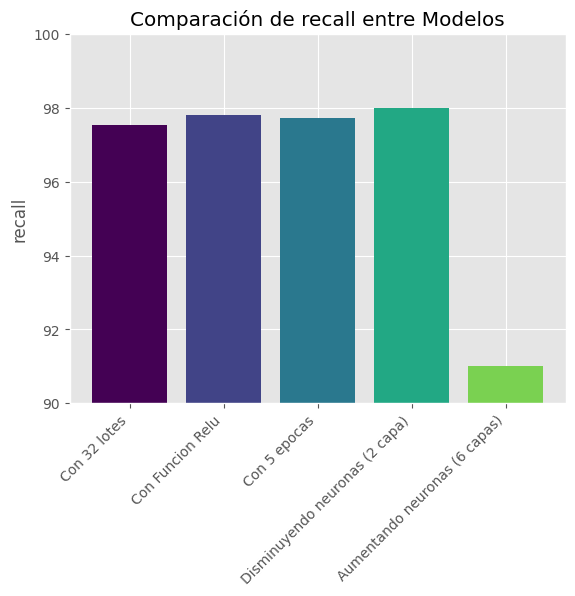

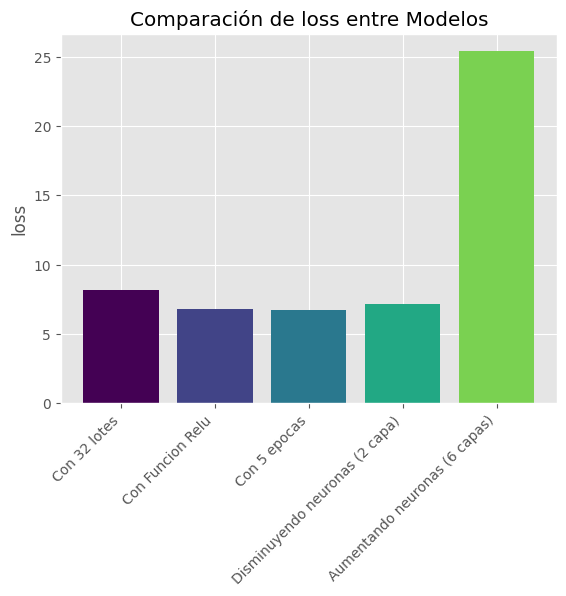

In [ ]:
grafica_ajuste_ganadores(modelos_finales)

# Asignación 2: Análisis de la certeza de predicción y metricas por clase.

Boxplots para revisar las probabilidades

313/313 [==============================] - 1s 3ms/step


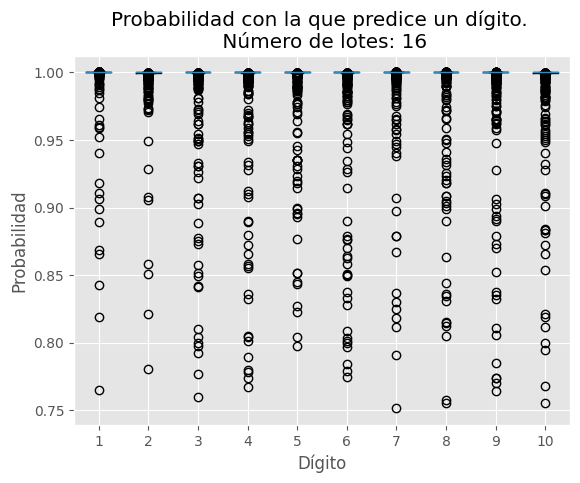

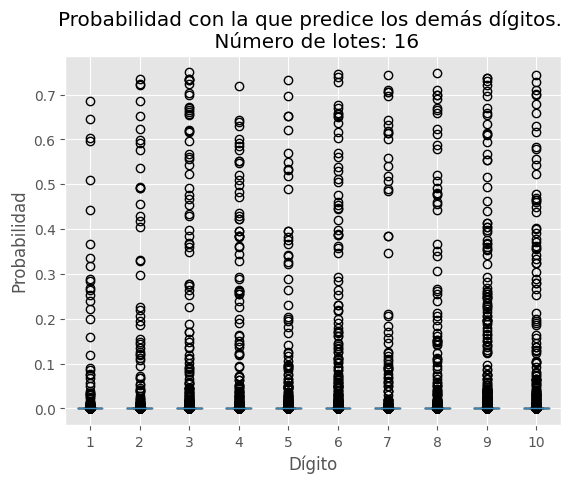

313/313 [==============================] - 1s 3ms/step


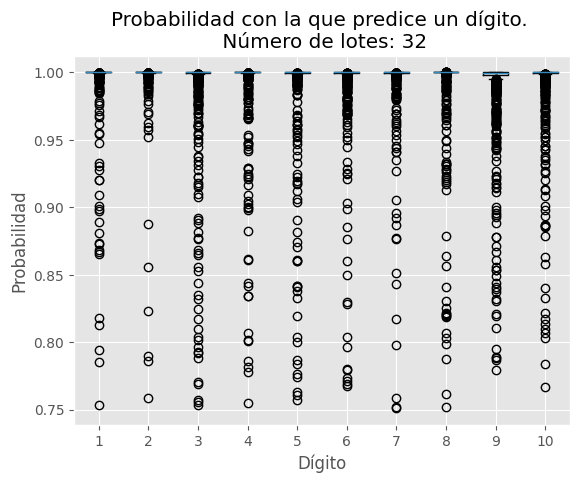

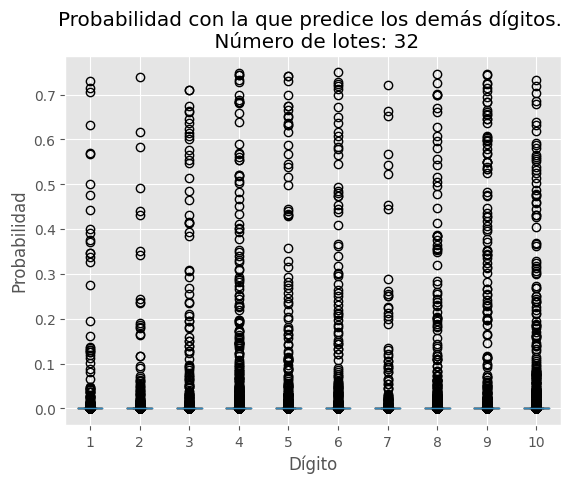

313/313 [==============================] - 2s 5ms/step


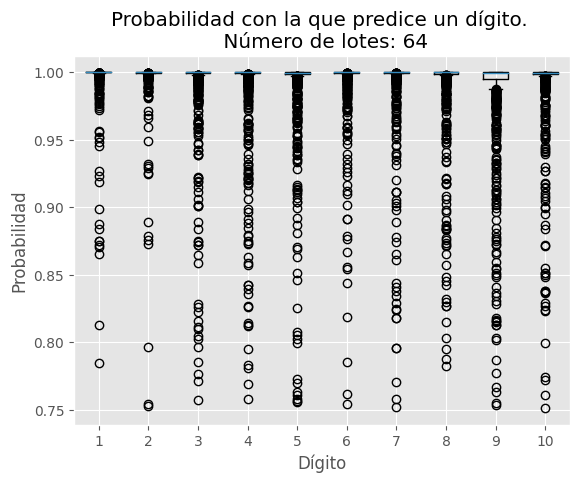

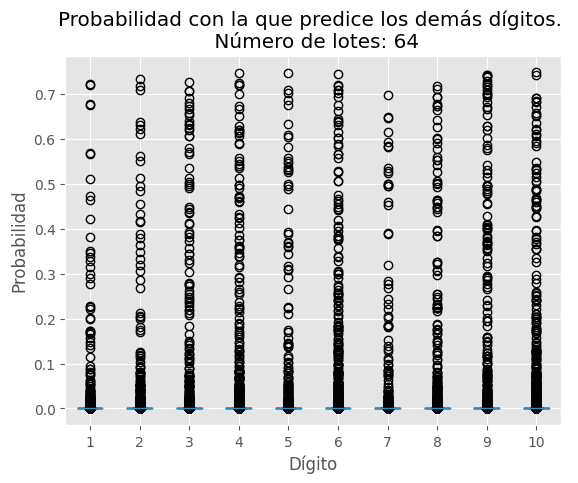

313/313 [==============================] - 1s 3ms/step


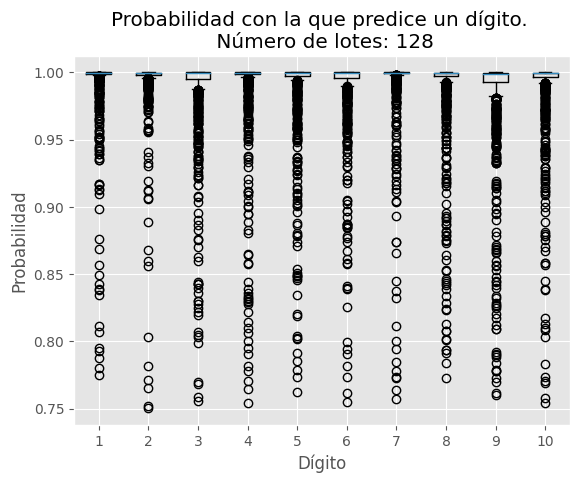

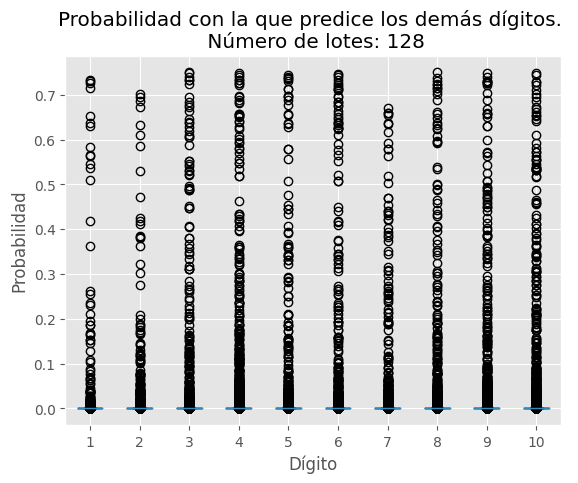

In [ ]:
grafica_probabilidades(modelos_lotes, 'Número de lotes')

313/313 [==============================] - 1s 3ms/step


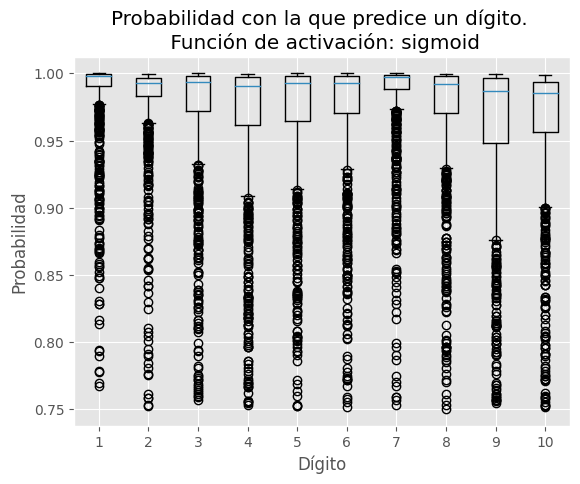

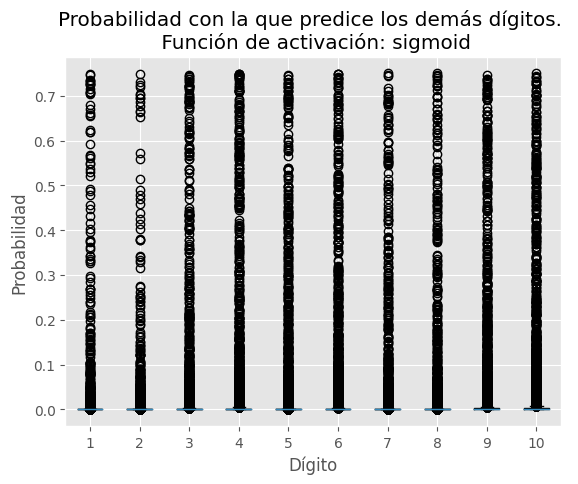

313/313 [==============================] - 1s 3ms/step


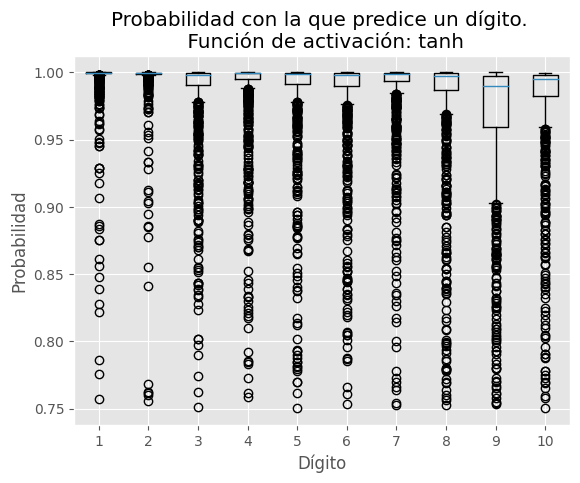

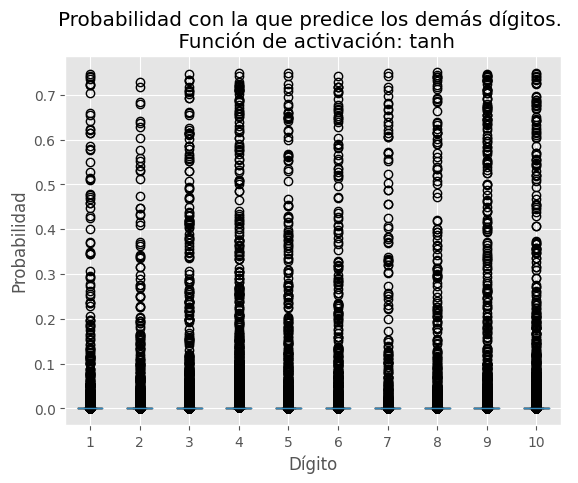

313/313 [==============================] - 1s 3ms/step


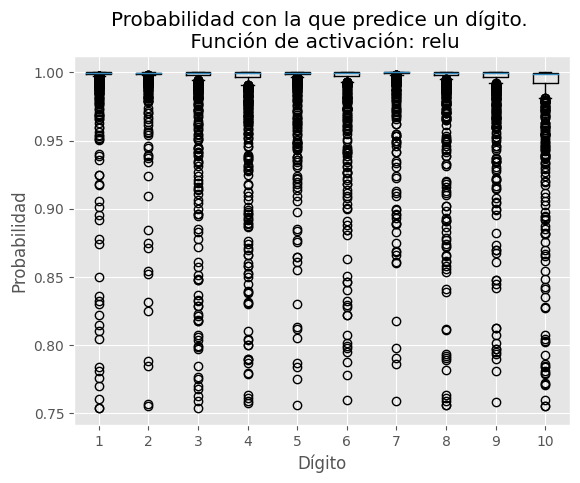

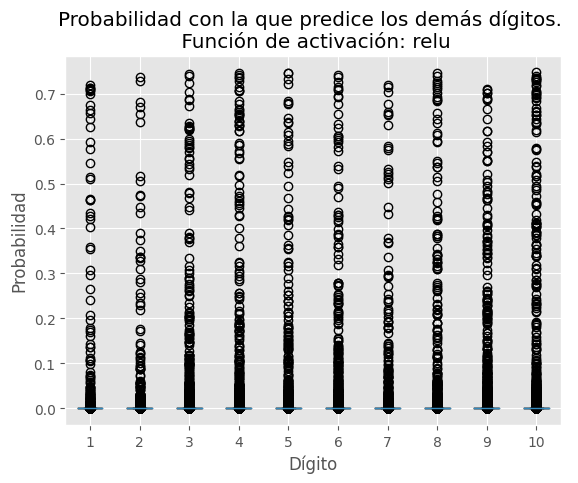

In [ ]:
grafica_probabilidades(modelos_funciones, 'Función de activación')

313/313 [==============================] - 1s 3ms/step


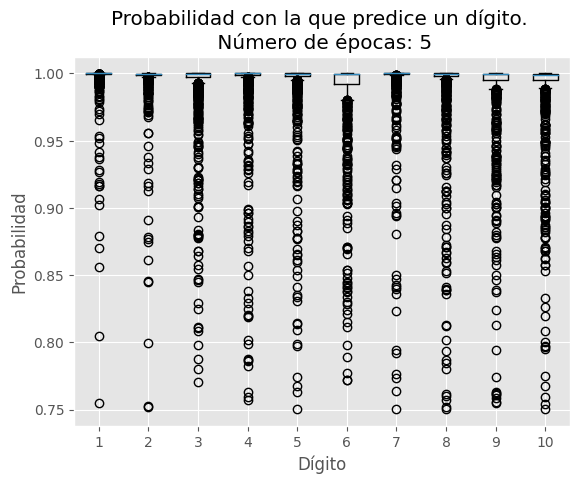

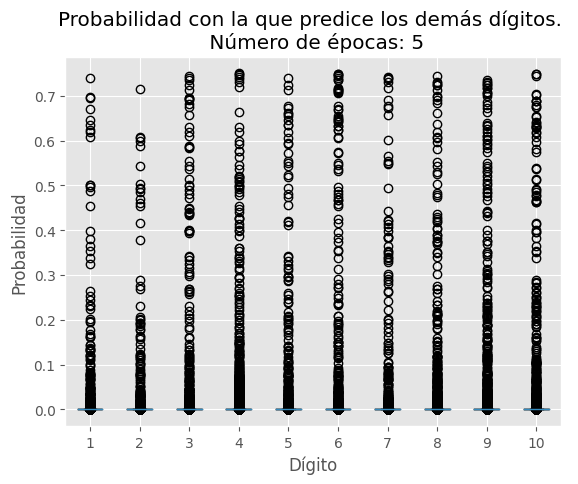

313/313 [==============================] - 1s 4ms/step


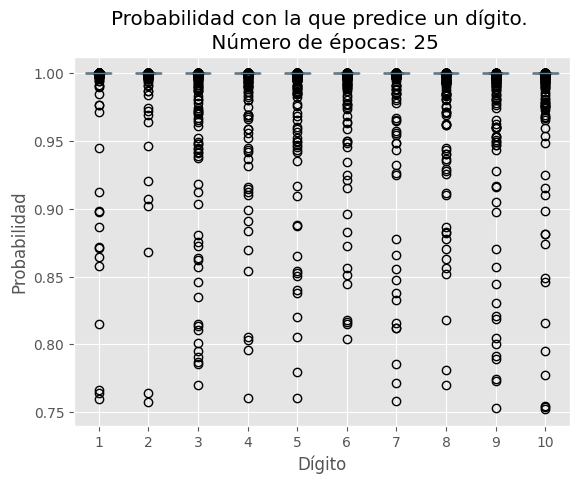

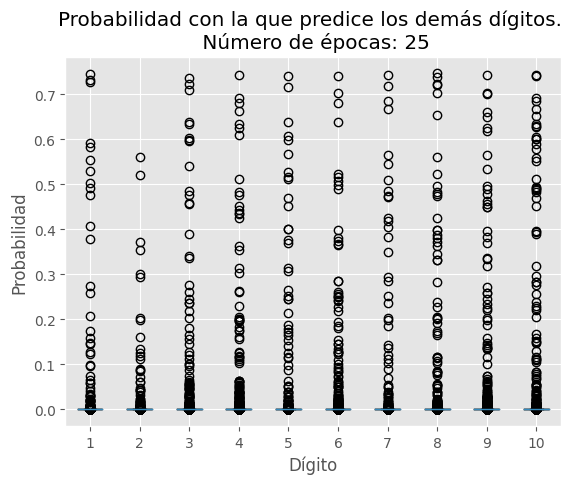

313/313 [==============================] - 1s 3ms/step


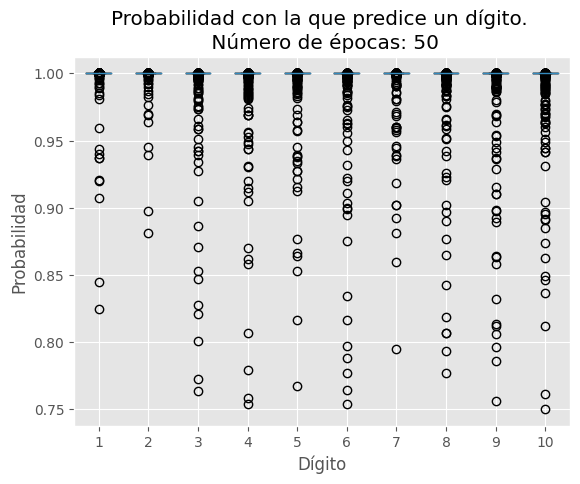

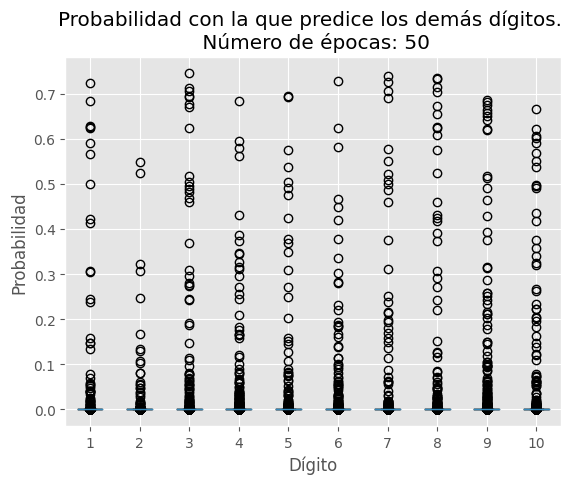

313/313 [==============================] - 1s 3ms/step


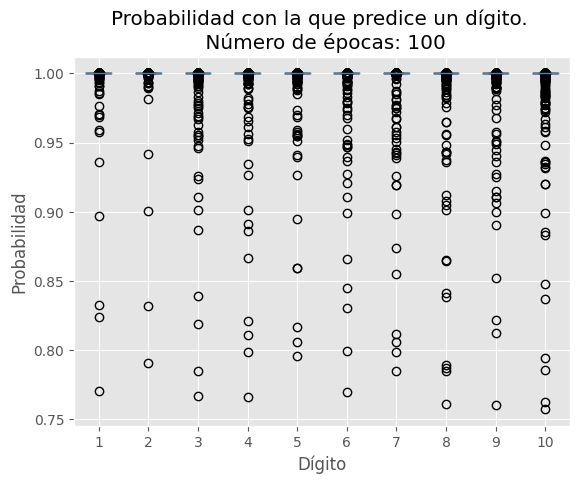

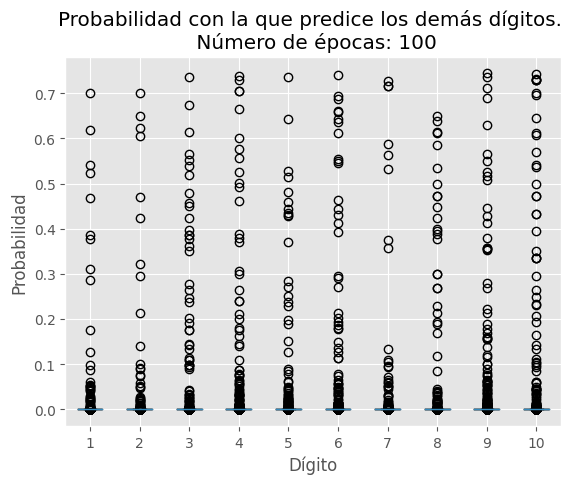

In [ ]:
grafica_probabilidades(modelos_epocas, 'Número de épocas')

313/313 [==============================] - 1s 4ms/step


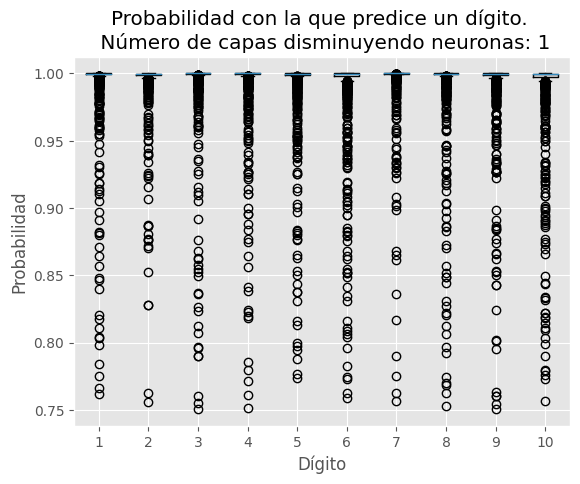

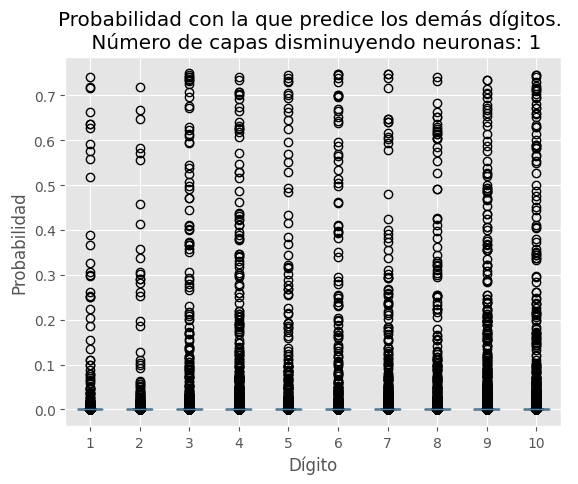

313/313 [==============================] - 2s 6ms/step


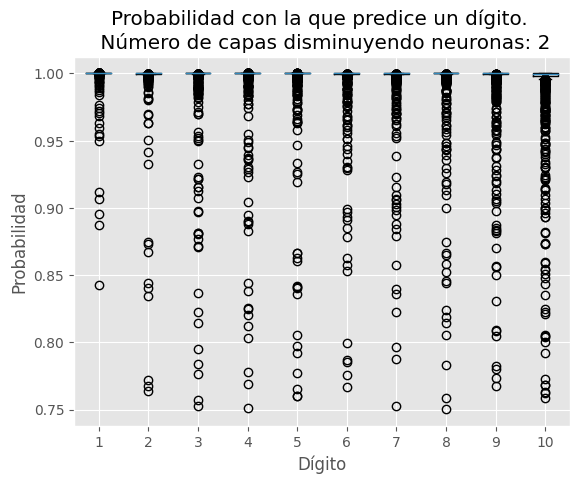

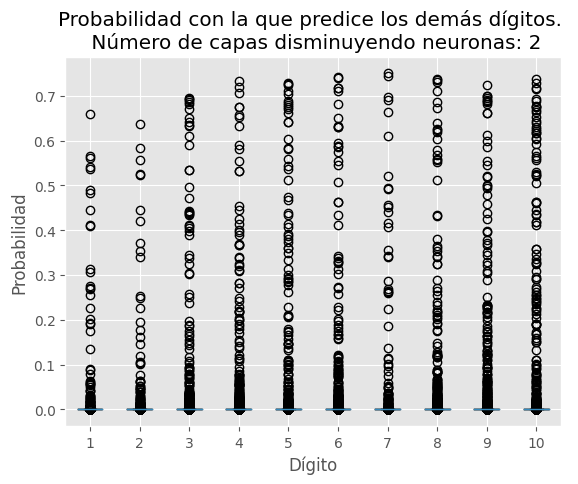

313/313 [==============================] - 3s 8ms/step


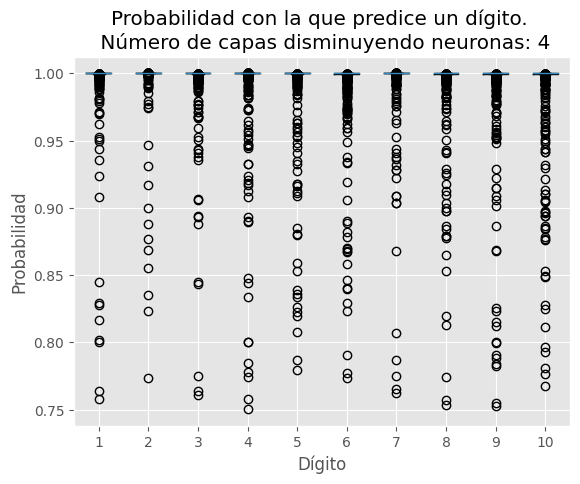

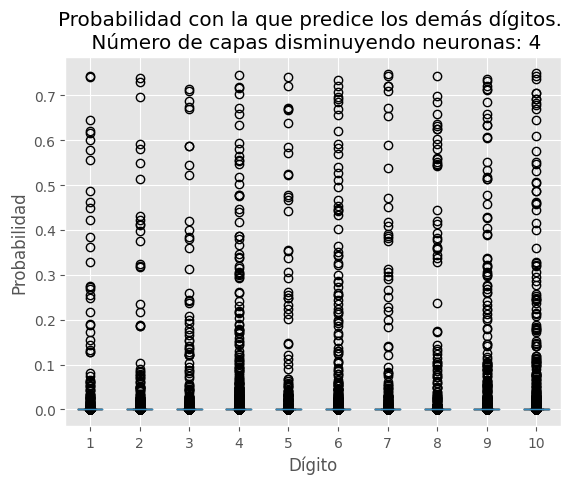

313/313 [==============================] - 2s 6ms/step


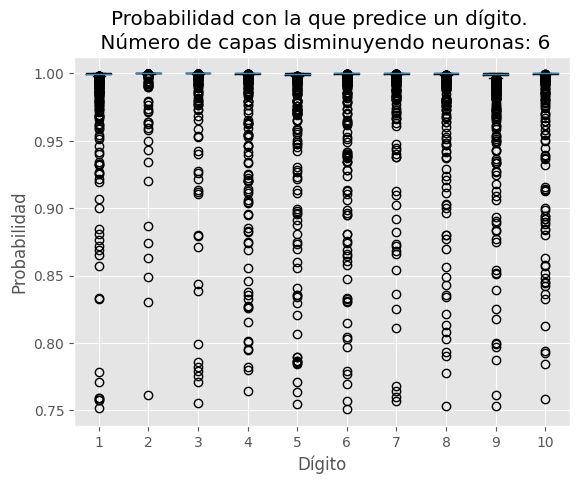

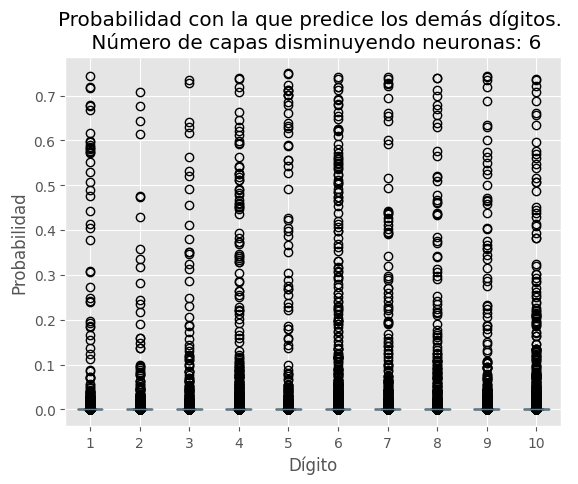

313/313 [==============================] - 2s 7ms/step


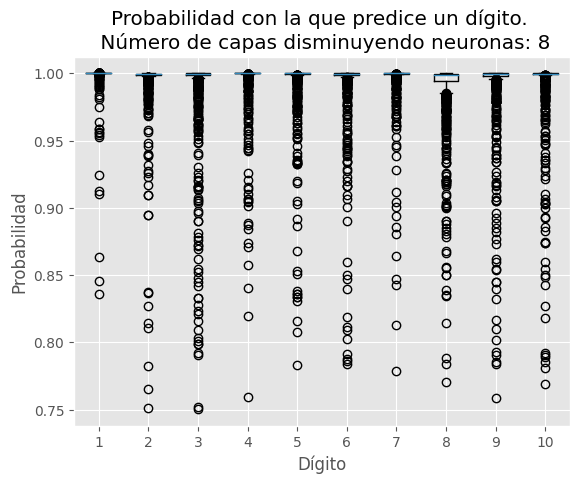

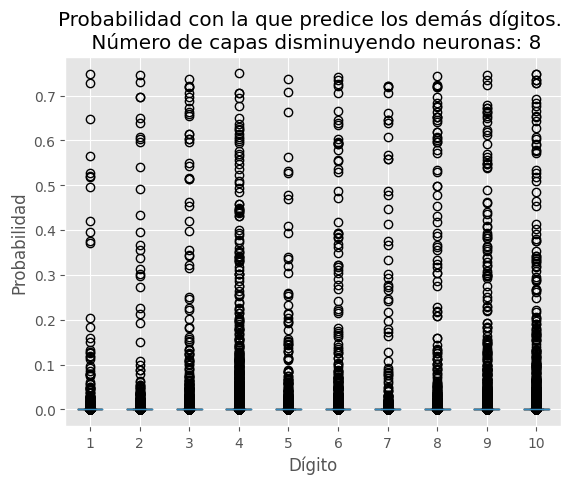

In [ ]:
grafica_probabilidades(modelos_disminuye_capas, 'Número de capas disminuyendo neuronas')

313/313 [==============================] - 1s 2ms/step


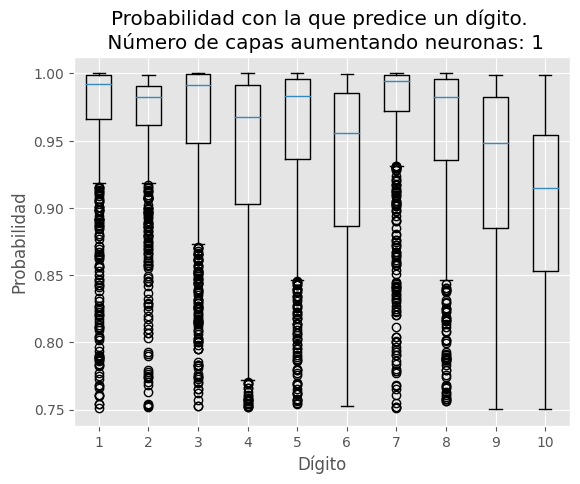

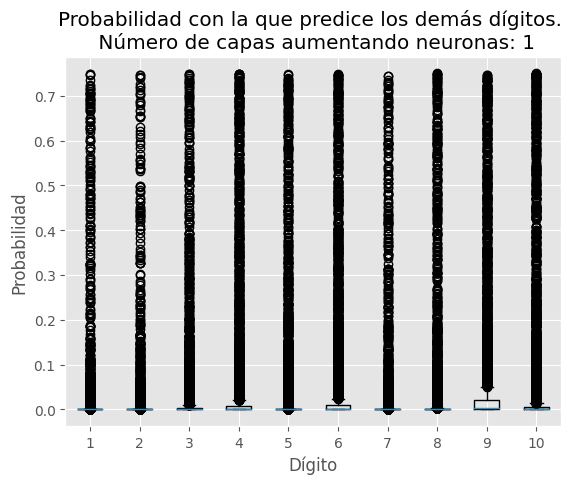

313/313 [==============================] - 1s 2ms/step


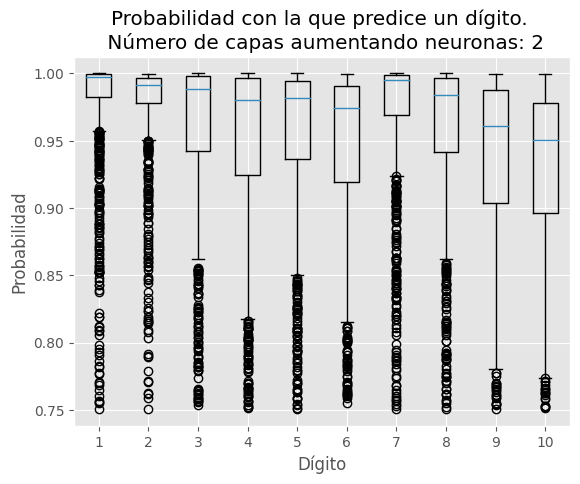

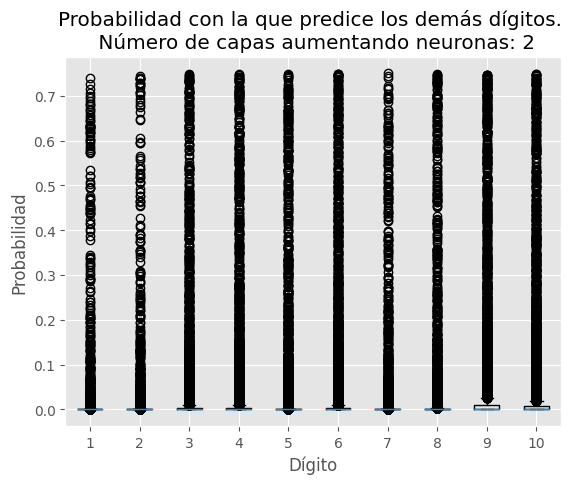

313/313 [==============================] - 1s 2ms/step


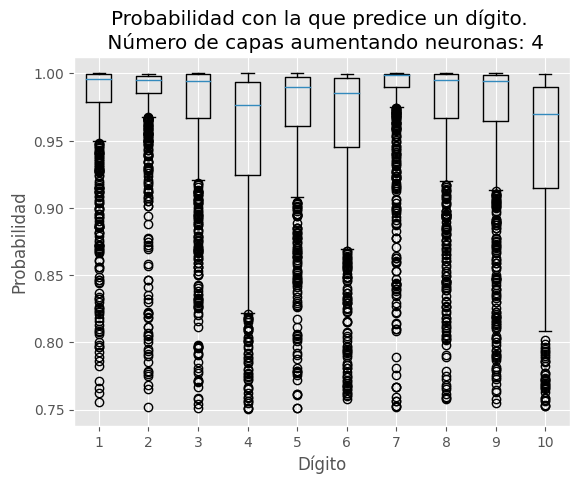

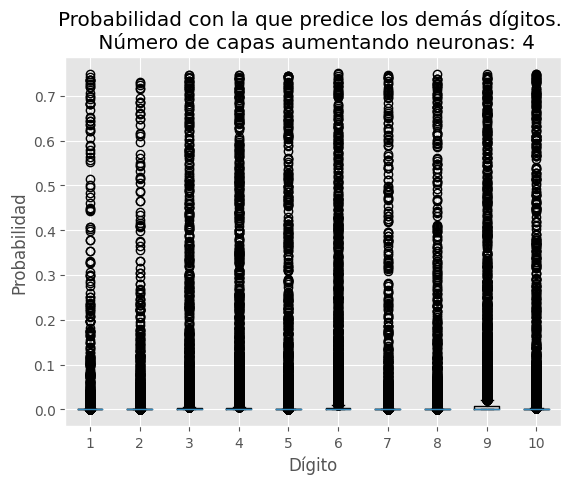

313/313 [==============================] - 1s 2ms/step


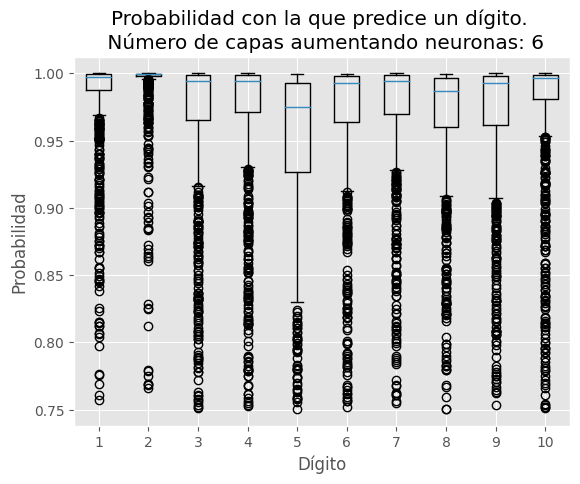

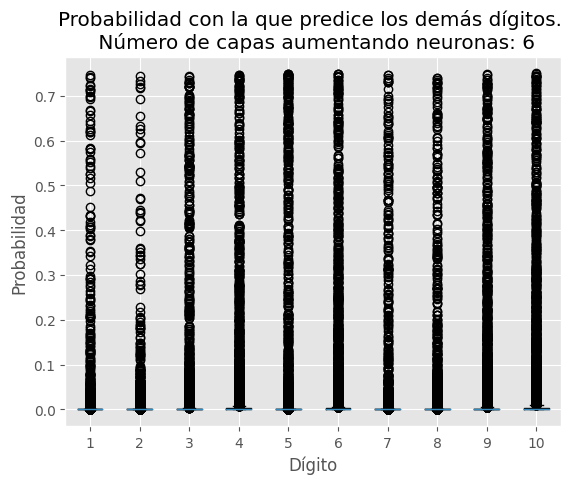

313/313 [==============================] - 2s 5ms/step


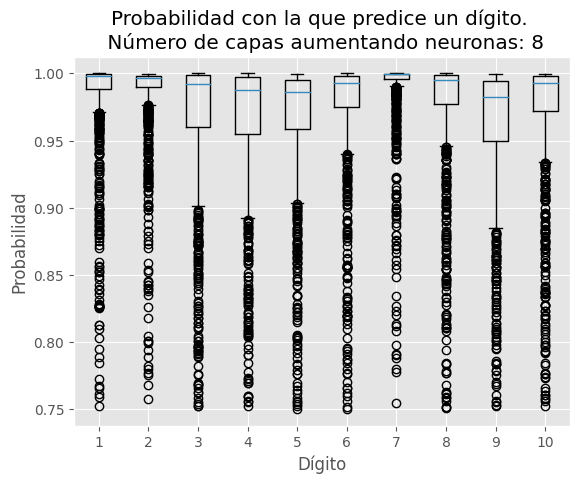

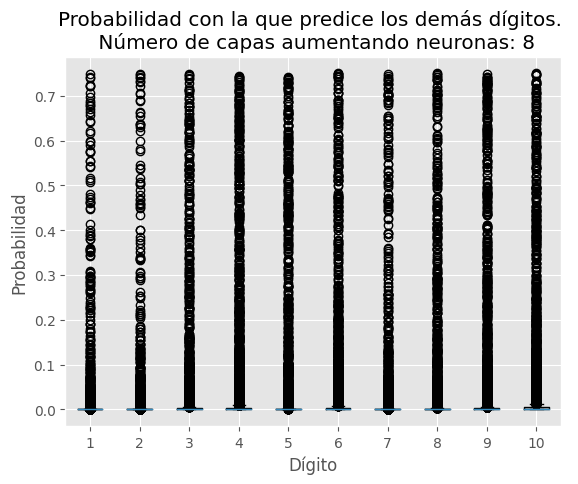

In [ ]:
grafica_probabilidades(modelos_aumenta_capas, 'Número de capas aumentando neuronas')

¿Cuál es el modelo más “seguro”?

313/313 [==============================] - 1s 3ms/step


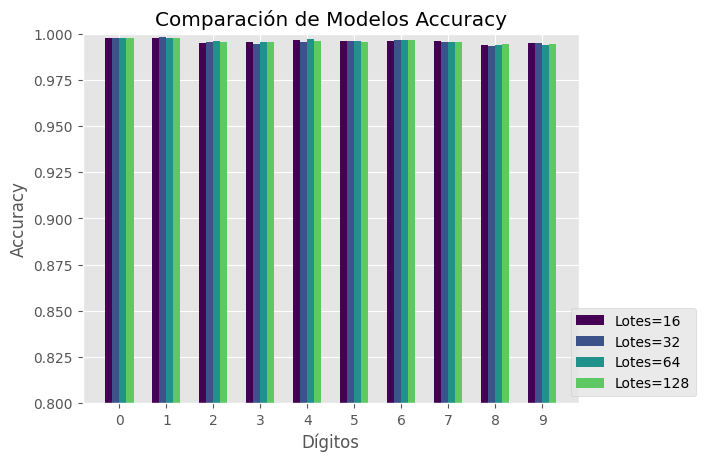

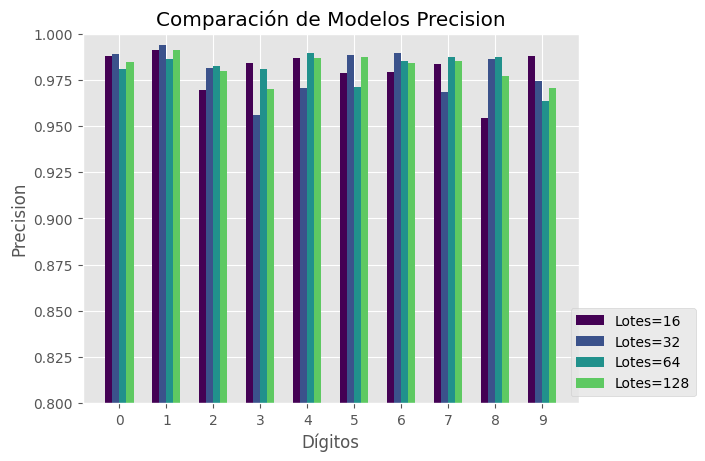

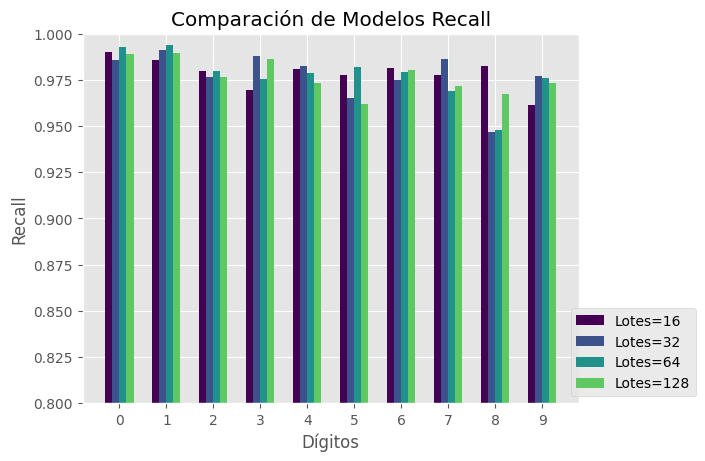

In [ ]:
metricas_por_clase(modelos_lotes, "Lotes")

313/313 [==============================] - 2s 6ms/step


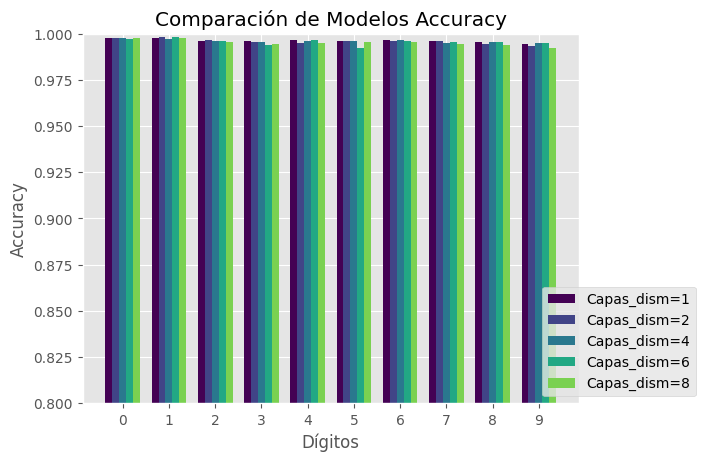

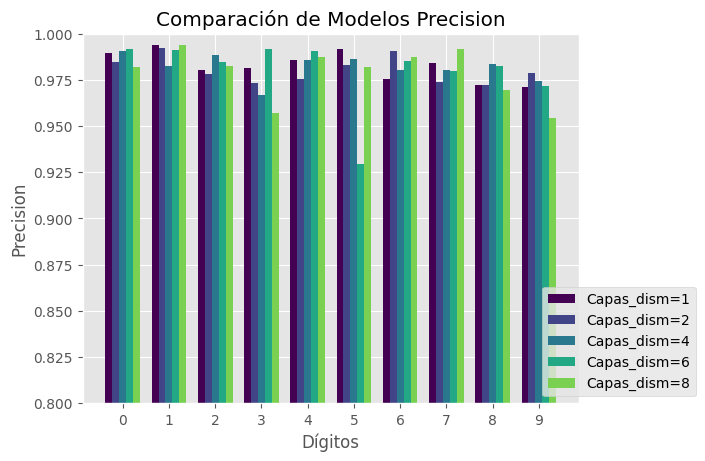

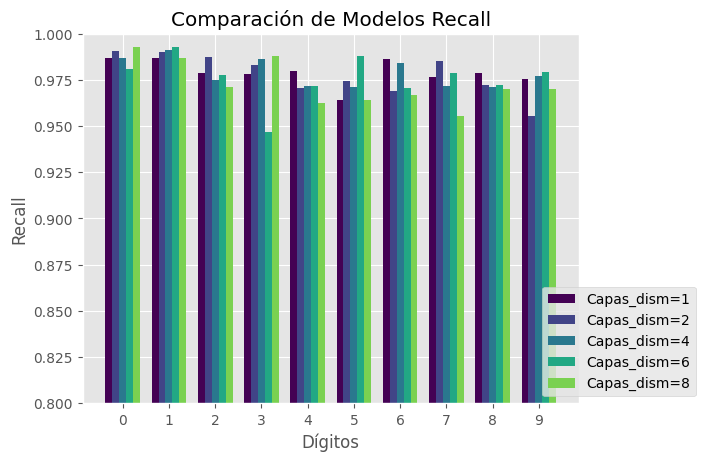

In [ ]:
metricas_por_clase(modelos_disminuye_capas, "Capas_dism")

313/313 [==============================] - 1s 4ms/step


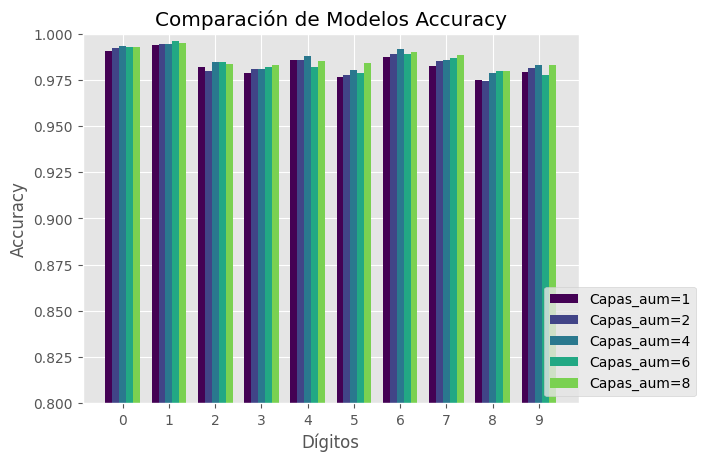

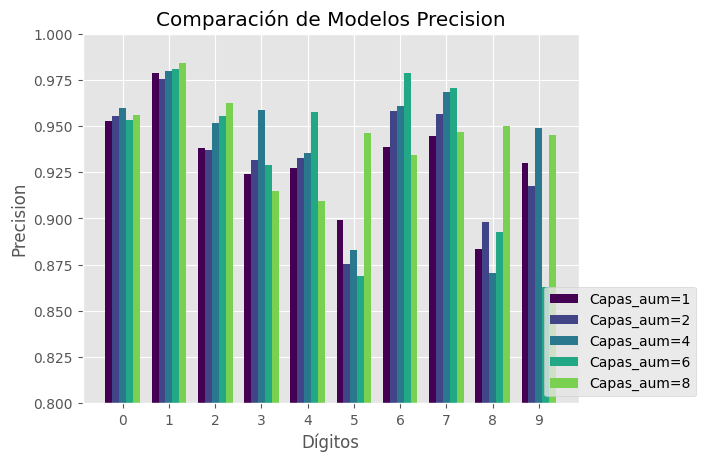

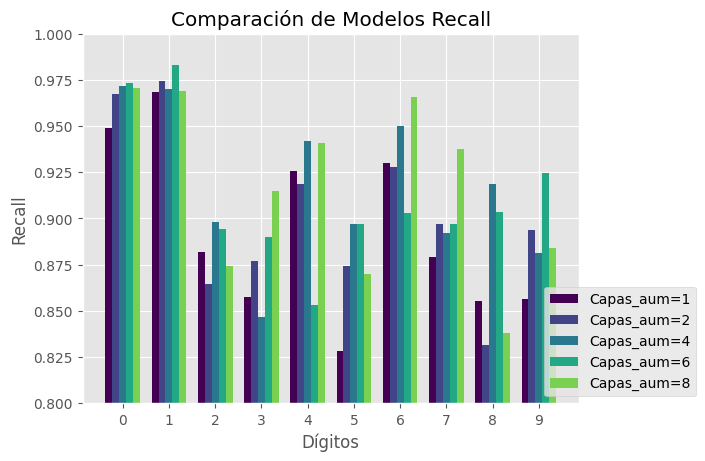

In [ ]:
metricas_por_clase(modelos_aumenta_capas, "Capas_aum")

313/313 [==============================] - 1s 3ms/step


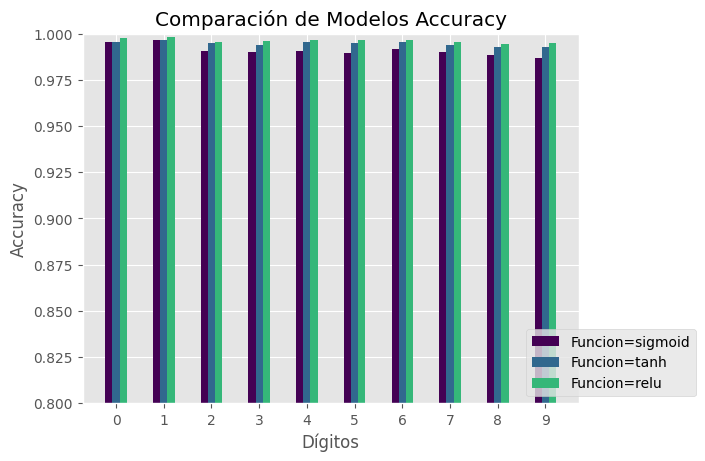

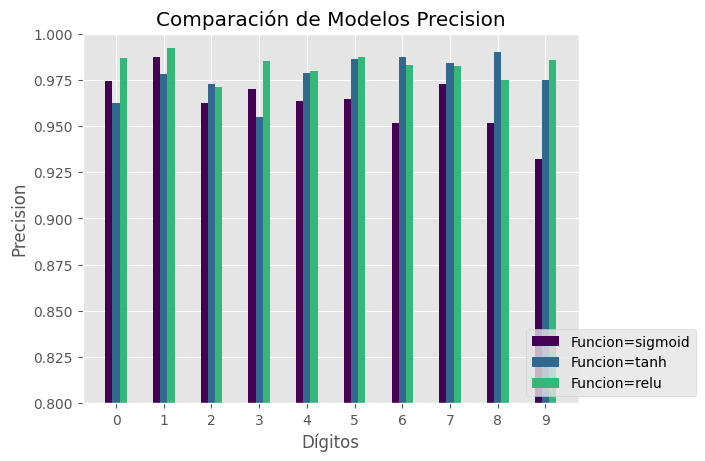

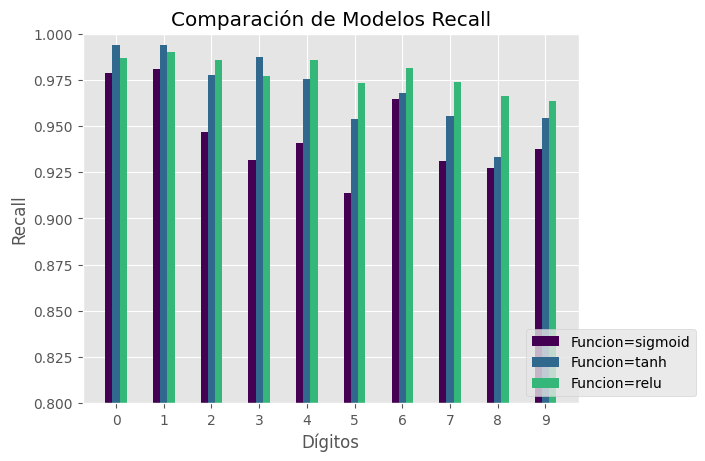

In [ ]:
metricas_por_clase(modelos_funciones, "Funcion")

313/313 [==============================] - 1s 3ms/step


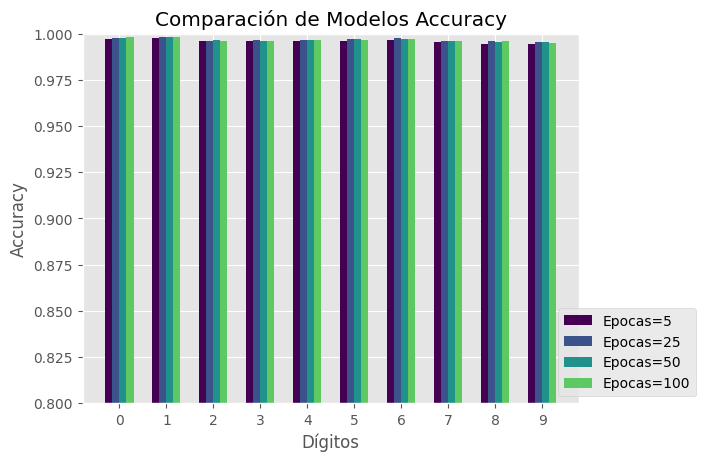

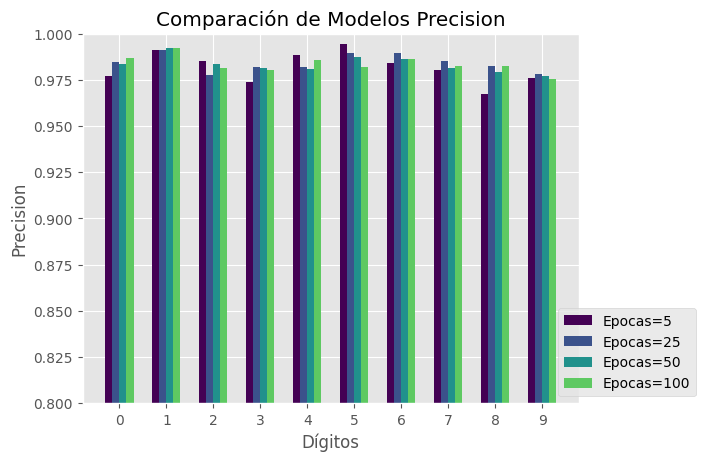

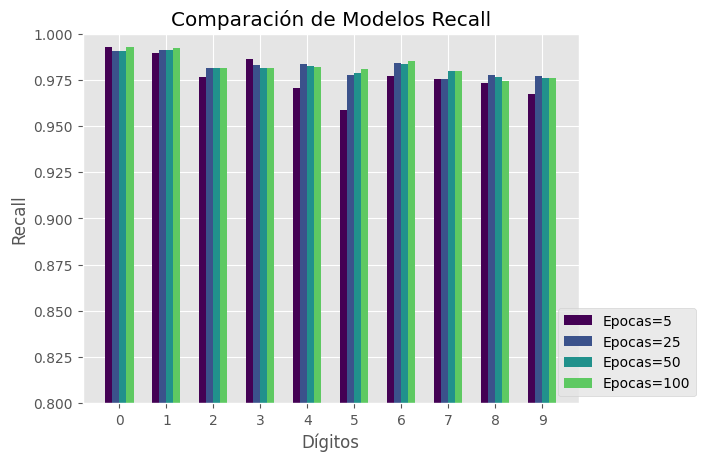

In [ ]:
metricas_por_clase(modelos_epocas, "Epocas")

#Mejor entre los mejores.

313/313 [==============================] - 1s 2ms/step


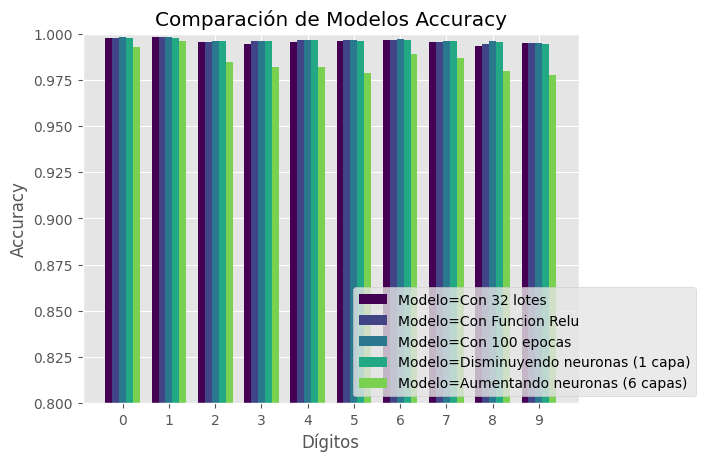

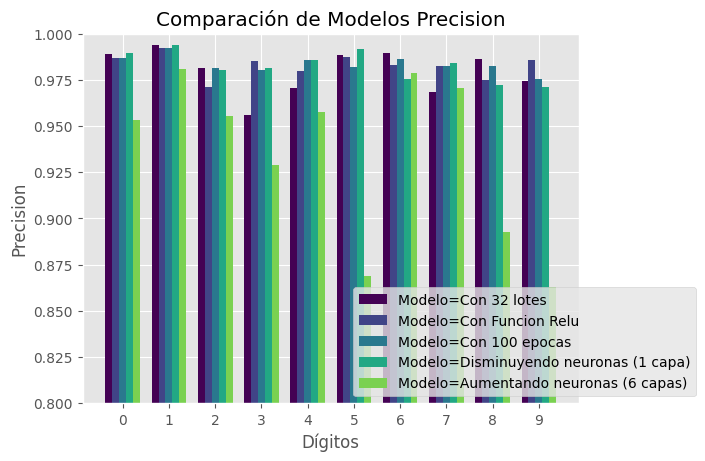

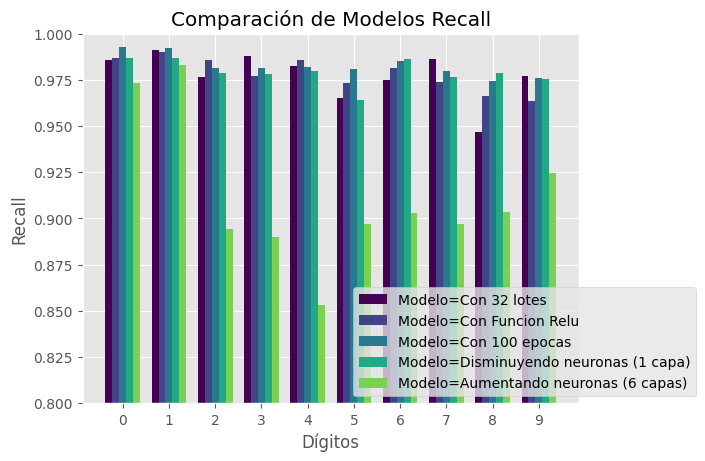

In [ ]:
modelos_mejores={"Con 32 lotes":modelos_lotes[32],
                 "Con Funcion Relu": modelos_funciones['relu'],
                 "Con 100 epocas": modelos_epocas[100],
                 "Disminuyendo neuronas (1 capa)":modelos_disminuye_capas[1],
                 "Aumentando neuronas (6 capas)":modelos_aumenta_capas[6]}
metricas_por_clase(modelos_mejores, "Modelo")